<a href="https://colab.research.google.com/github/pratap-vj/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    Appliance Energy Prediction- 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

The purpose of this research is to forecast the electricity consumption of a particular household in Belgium based on the temperature and humidity levels of various rooms in the facility and surrounding weather information over 4.5 months. The data set runs 4.5 months at 10 minutes. A ZigBee wireless sensor network is being used to monitor the home’s temperature and humidity levels. Around 3.3 minutes, each wireless node sent the temperature and humidity data. The wireless data was then averaged across intervals of 10 minutes. Every 10 minutes, m-bus energy meters collected the energy data. The experimental data sets were combined with the weather data from the closest airport weather station (Chievres Airport, Belgium), which was extracted from a public data set from Reliable Prognosis (rp5.ru). The data set has two random variables to test the regression models and exclude non-predictive characteristics (parameters).

# **GitHub Link -**

https://github.com/pratap-vj/Appliance-Energy-Prediction

# **Problem Statement**


We should predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning model using regression algorithms. Regression algorithms are used as data consist of continuous features and there are no identification of appliances in dataset.

**Business Objective-**

The increasing trend in energy consumption is becoming cause of concern for the entire world, as the energy consumption is increasing year after year so is the carbon and greenhouse gas emission, the majority portion of the electricity generated is consumed by industrial sector but a considerable amount is also consumed by residential sector.

It is important to study the energy consuming behaviour in the residential sector and predict the energy consumption by home appliances as it consume maximum amount of energy in the residence. This project focuses on predicting the energy consumption of home appliances based on humidity and temperature.

This project aims to predict the energy consumption of home appliances. With the advent of smart homes and the rising need for energy management, existing smart home systems can benefit from accurate prediction. If the energy usage can be predicted for every possible state of appliances, then device control can be optimized for energy savings as well. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_rel
from scipy import stats

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor


import xgboost as xgb
from sklearn import neighbors

import time
from math import sqrt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
!pip install shap
import shap


sns.set_style('darkgrid') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [2]:
# Connect with Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# reading Dataset

df = pd.read_csv('/content/drive/MyDrive/Copy of data_application_energy.csv')

### Dataset First View

In [4]:
# Dataset First Look

df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [5]:
df.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count

df.shape

(19735, 29)

### Dataset Information

In [7]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count

df[df.duplicated()]

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

[0 rows x 29 columns]

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count

df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<Axes: >

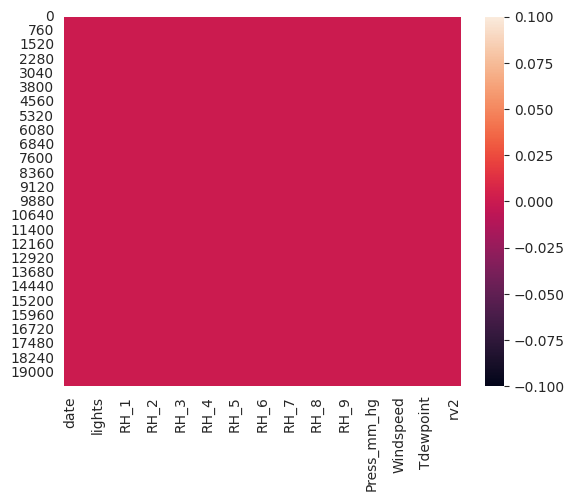

In [10]:
# Visualizing the missing values

sns.heatmap(df.isnull())

### What did you know about your dataset?

   The dataset was collected by sensors placed inside the house and outside readings came from the nearby weather station. The main attributes are temperature, humidity and pressure readings. Each observation measures electricity in a 10-minute interval. The temperatures and humidity have been averaged for 10-minute intervals.

The dataset have no duplicate value.

Number of missing values & null values = 0



## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns

df.columns.values

array(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'], dtype=object)

In [12]:
# Dataset 

df.describe(include = 'all')

date    Appliances        lights            T1  \
count                 19735  19735.000000  19735.000000  19735.000000   
unique                19735           NaN           NaN           NaN   
top     2016-01-11 17:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
mean                    NaN     97.694958      3.801875     21.686571   
std                     NaN    102.524891      7.935988      1.606066   
min                     NaN     10.000000      0.000000     16.790000   
25%                     NaN     50.000000      0.000000     20.760000   
50%                     NaN     60.000000      0.000000     21.600000   
75%                     NaN    100.000000      0.000000     22.600000   
max                     NaN   1080.000000     70.000000     26.260000   

                RH_1            T2          RH_2            T3          RH_3  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       40.259739     20.341219     40.420420     22.267611     39.242500   
std         3.979299      2.192974      4.069813      2.006111      3.254576   
min        27.023333     16.100000     20.463333     17.200000     28.766667   
25%        37.333333     18.790000     37.900000     20.790000     36.900000   
50%        39.656667     20.000000     40.500000     22.100000     38.530000   
75%        43.066667     21.500000     43.260000     23.290000     41.760000   
max        63.360000     29.856667     56.026667     29.236000     50.163333   

                  T4  ...            T9          RH_9         T_out  \
count   19735.000000  ...  19735.000000  19735.000000  19735.000000   
unique           NaN  ...           NaN           NaN           NaN   
top              NaN  ...           NaN           NaN           NaN   
freq             NaN  ...           NaN           NaN           NaN   
mean       20.855335  ...     19.485828     41.552401      7.411665   
std         2.042884  ...      2.014712      4.151497      5.317409   
min        15.100000  ...     14.890000     29.166667     -5.000000   
25%        19.530000  ...     18.000000     38.500000      3.666667   
50%        20.666667  ...     19.390000     40.900000      6.916667   
75%        22.100000  ...     20.600000     44.338095     10.408333   
max        26.200000  ...     24.500000     53.326667     26.100000   

         Press_mm_hg        RH_out     Windspeed    Visibility     Tdewpoint  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      755.522602     79.750418      4.039752     38.330834      3.760707   
std         7.399441     14.901088      2.451221     11.794719      4.194648   
min       729.300000     24.000000      0.000000      1.000000     -6.600000   
25%       750.933333     70.333333      2.000000     29.000000      0.900000   
50%       756.100000     83.666667      3.666667     40.000000      3.433333   
75%       760.933333     91.666667      5.500000     40.000000      6.566667   
max       772.300000    100.000000     14.000000     66.000000     15.500000   

                 rv1           rv2  
count   19735.000000  19735.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean       24.988033     24.988033  
std        14.496634     14.496634  
min         0.005322      0.005322  
25%        12.497889     12.497889  
50%        24.897653     24.897653  
7

### Variables Description 



There are 29 features to describe appliances energy use :

1. date : time year-month-day hour:minute:second

2. lights : energy use of light fixtures in the house in Wh

3. T1 : Temperature in kitchen area, in Celsius

4. T2 : Temperature in living room area, in Celsius

5. T3 : Temperature in laundry room area

6. T4 : Temperature in office room, in Celsius

7. T5 : Temperature in bathroom, in Celsius

8. T6 : Temperature outside the building (north side), in Celsius

9. T7 : Temperature in ironing room, in Celsius

10. T8 : Temperature in teenager room 2, in Celsius

11. T9 : Temperature in parents’ room, in Celsius

12. T_out : Temperature outside (from Chievres weather station), in Celsius

13. Tdewpoint : (from Chievres weather station), Â°C

14. RH_1 : Humidity in kitchen area, in %

15. RH_2 : Humidity in living room area, in %

16. RH_3 : Humidity in laundry room area, in %

17. RH_4 : Humidity in office room, in %

18. RH_5 : Humidity in bathroom, in %

19. RH_6 : Humidity outside the building (north side), in %

20. RH_7 : Humidity in ironing room, in %

21. RH_8 : Humidity in teenager room 2, in %

22. RH_9 : Humidity in parents’ room, in %

23. RH_out :Humidity outside (from Chievres weather station), in %

24. Pressure : (from Chievres weather station), in mm Hg

25. Wind speed: (from Chievres weather station), in m/s

26. Visibility :(from Chievres weather station), in km

27. Rv1 :Random variable 1, non-dimensional

28. Rv2 :Random variable 2, non-dimensional

29. Appliances : Total energy used by appliances, in Wh

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df_2 = df.copy()

In [15]:


# Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [16]:
df_2[col_temp].head()

T1    T2     T3         T4         T5        T6         T7    T8  \
0  19.89  19.2  19.79  19.000000  17.166667  7.026667  17.200000  18.2   
1  19.89  19.2  19.79  19.000000  17.166667  6.833333  17.200000  18.2   
2  19.89  19.2  19.79  18.926667  17.166667  6.560000  17.200000  18.2   
3  19.89  19.2  19.79  18.890000  17.166667  6.433333  17.133333  18.1   
4  19.89  19.2  19.79  18.890000  17.200000  6.366667  17.200000  18.1   

          T9  
0  17.033333  
1  17.066667  
2  17.000000  
3  17.000000  
4  17.000000

In [17]:
df_2[col_hum].head()

RH_1       RH_2       RH_3       RH_4   RH_5       RH_6       RH_7  \
0  47.596667  44.790000  44.730000  45.566667  55.20  84.256667  41.626667   
1  46.693333  44.722500  44.790000  45.992500  55.20  84.063333  41.560000   
2  46.300000  44.626667  44.933333  45.890000  55.09  83.156667  41.433333   
3  46.066667  44.590000  45.000000  45.723333  55.09  83.423333  41.290000   
4  46.333333  44.530000  45.000000  45.530000  55.09  84.893333  41.230000   

        RH_8   RH_9  
0  48.900000  45.53  
1  48.863333  45.56  
2  48.730000  45.50  
3  48.590000  45.40  
4  48.590000  45.40

In [18]:
df_2[col_weather].head()

T_out  Tdewpoint  RH_out  Press_mm_hg  Windspeed  Visibility
0  6.600000        5.3    92.0        733.5   7.000000   63.000000
1  6.483333        5.2    92.0        733.6   6.666667   59.166667
2  6.366667        5.1    92.0        733.7   6.333333   55.333333
3  6.250000        5.0    92.0        733.8   6.000000   51.500000
4  6.133333        4.9    92.0        733.9   5.666667   47.666667

In [19]:
df_2[col_light].head()

lights
0      30
1      30
2      30
3      40
4      40

In [20]:
df_2[col_randoms].head()

rv1        rv2
0  13.275433  13.275433
1  18.606195  18.606195
2  28.642668  28.642668
3  45.410389  45.410389
4  10.084097  10.084097

In [21]:
df_2[col_target].head()

Appliances
0          60
1          60
2          50
3          50
4          60

In [22]:
# Seperate dependent and independent variables 

feature_vars = df_2[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = df_2[col_target]

In [23]:
# Checking columns in present feature_vars
feature_vars.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'RH_1', 'RH_2',
       'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out',
       'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility',
       'lights', 'rv1', 'rv2'],
      dtype='object')

In [24]:
# Describing feature_vars 
feature_vars.describe()

T1            T2            T3            T4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9          RH_1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.910939     20.267106     22.029107     19.485828     40.259739   
std        6.090347      2.109993      1.956162      2.014712      3.979299   
min       -6.065000     15.390000     16.306667     14.890000     27.023333   
25%        3.626667     18.700000     20.790000     18.000000     37.333333   
50%        7.300000     20.033333     22.100000     19.390000     39.656667   
75%       11.256000     21.600000     23.390000     20.600000     43.066667   
max       28.290000     26.000000     27.230000     24.500000     63.360000   

       ...          RH_9         T_out     Tdewpoint        RH_out  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     41.552401      7.411665      3.760707     79.750418   
std    ...      4.151497      5.317409      4.194648     14.901088   
min    ...     29.166667     -5.000000     -6.600000     24.000000   
25%    ...     38.500000      3.666667      0.900000     70.333333   
50%    ...     40.900000      6.916667      3.433333     83.666667   
75%    ...     44.338095     10.408333      6.566667     91.666667   
max    ...     53.326667     26.100000     15.500000    100.000000   

        Press_mm_hg     Windspeed    Visibility        lights           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean     755.522602      4.039752     38.330834      3.801875     24.988033   
std        7.399441      2.451221     11.794719      7.935988     14.496634   
min      729.300000      0.000000      1.000000      0.000000      0.005322   
25%      750.933333      2.000000     29.000000      0.000000     12.497889   
50%      756.100000      3.666667     40.000000      0.000000     24.897653   
75%      760.933333      5.500000     40.000000      0.000000     37.583769   
max      772.300000     14.000000     66.000000     70.000000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 27 columns]

In [25]:
# Describing target_vars
target_vars.describe()

Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

In [26]:
# Checking feature_vars dataset
feature_vars.head(2)

T1    T2     T3    T4         T5        T6    T7    T8         T9  \
0  19.89  19.2  19.79  19.0  17.166667  7.026667  17.2  18.2  17.033333   
1  19.89  19.2  19.79  19.0  17.166667  6.833333  17.2  18.2  17.066667   

        RH_1  ...   RH_9     T_out  Tdewpoint  RH_out  Press_mm_hg  Windspeed  \
0  47.596667  ...  45.53  6.600000        5.3    92.0        733.5   7.000000   
1  46.693333  ...  45.56  6.483333        5.2    92.0        733.6   6.666667   

   Visibility  lights        rv1        rv2  
0   63.000000      30  13.275433  13.275433  
1   59.166667      30  18.606195  18.606195  

[2 rows x 27 columns]

### What all manipulations have you done and insights you found?

) Since, this is not a timeseries problem and we will focus on predicting the appliance consumption , we can ignore Date column.


**Independent variables :** 27(11 temperature, 10 humidity, 1 pressure, 2 randoms)

**Dependent variable :** 1 (Appliances)

**Observations-**


**Temperature columns -** Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperature outside (T6) varies between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house.

**Humidiy columns -** Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

**Appliances -** 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.

**Lights column -** Intially I believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model . I believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence, we will drop it during feature selection.

**Feature ranges-**

1. Temperature : -6 to 30 deg

2. Humidity : 1 to 100 %

3. Windspeed : 0 to 14 m/s

4. Visibility : 1 to 66 km

5. Pressure : 729 to 772 mm Hg

6. Appliance Energy Usage : 10 to 1080 Wh

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 column wise histogram and box plot(univariate)-

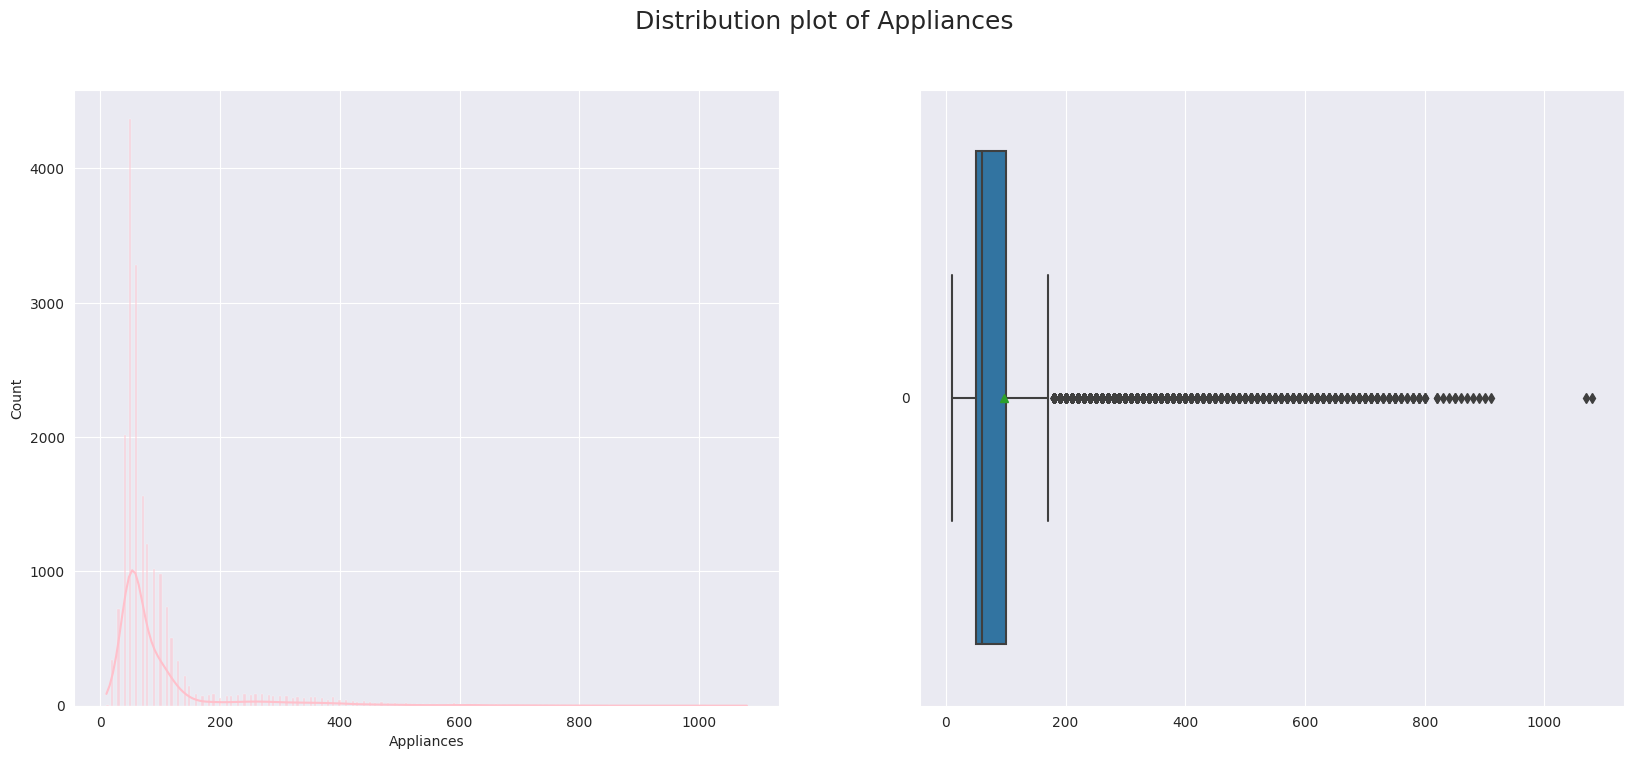

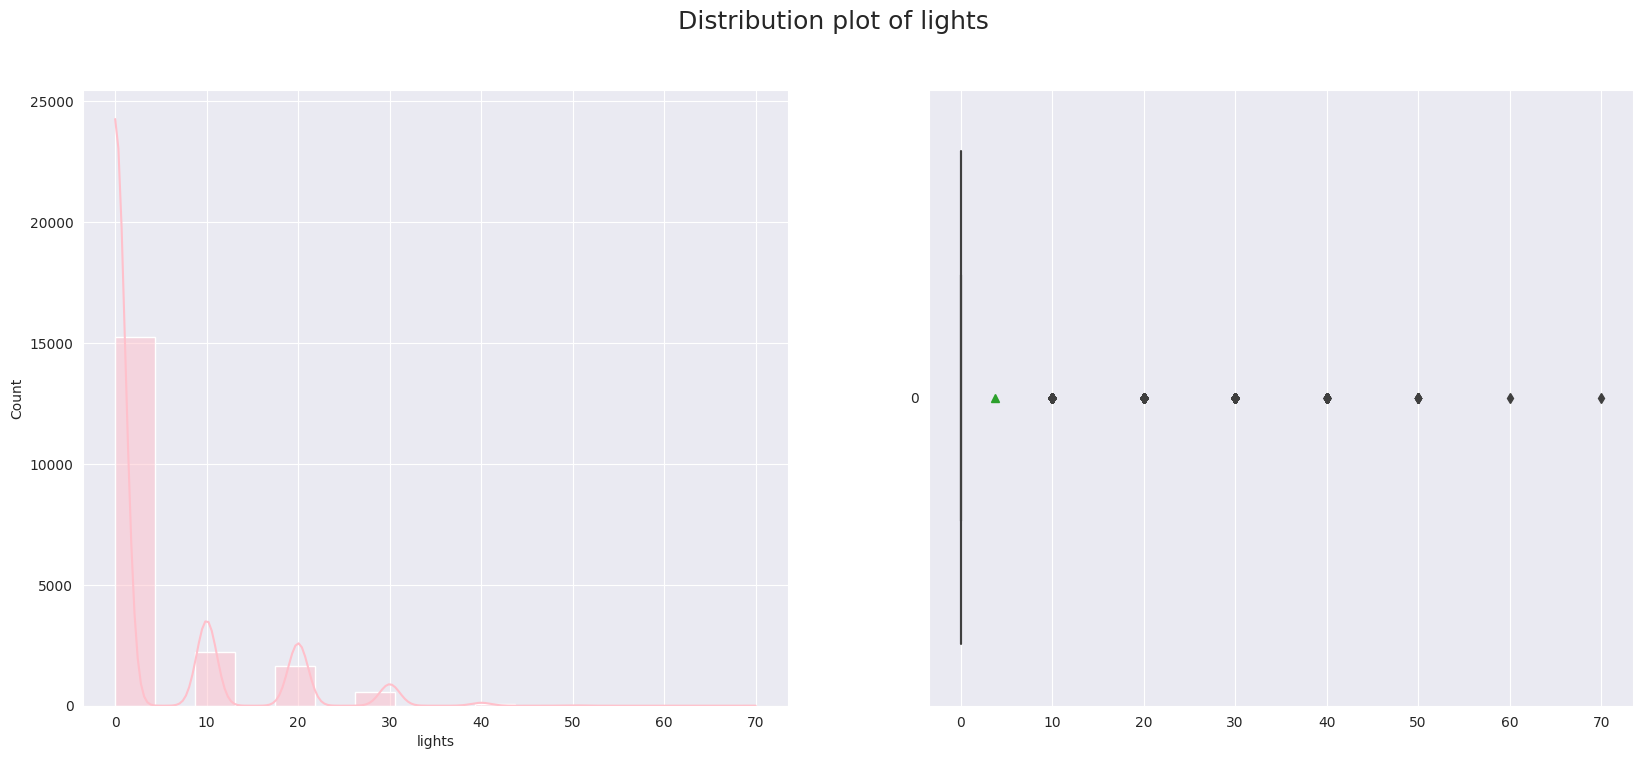

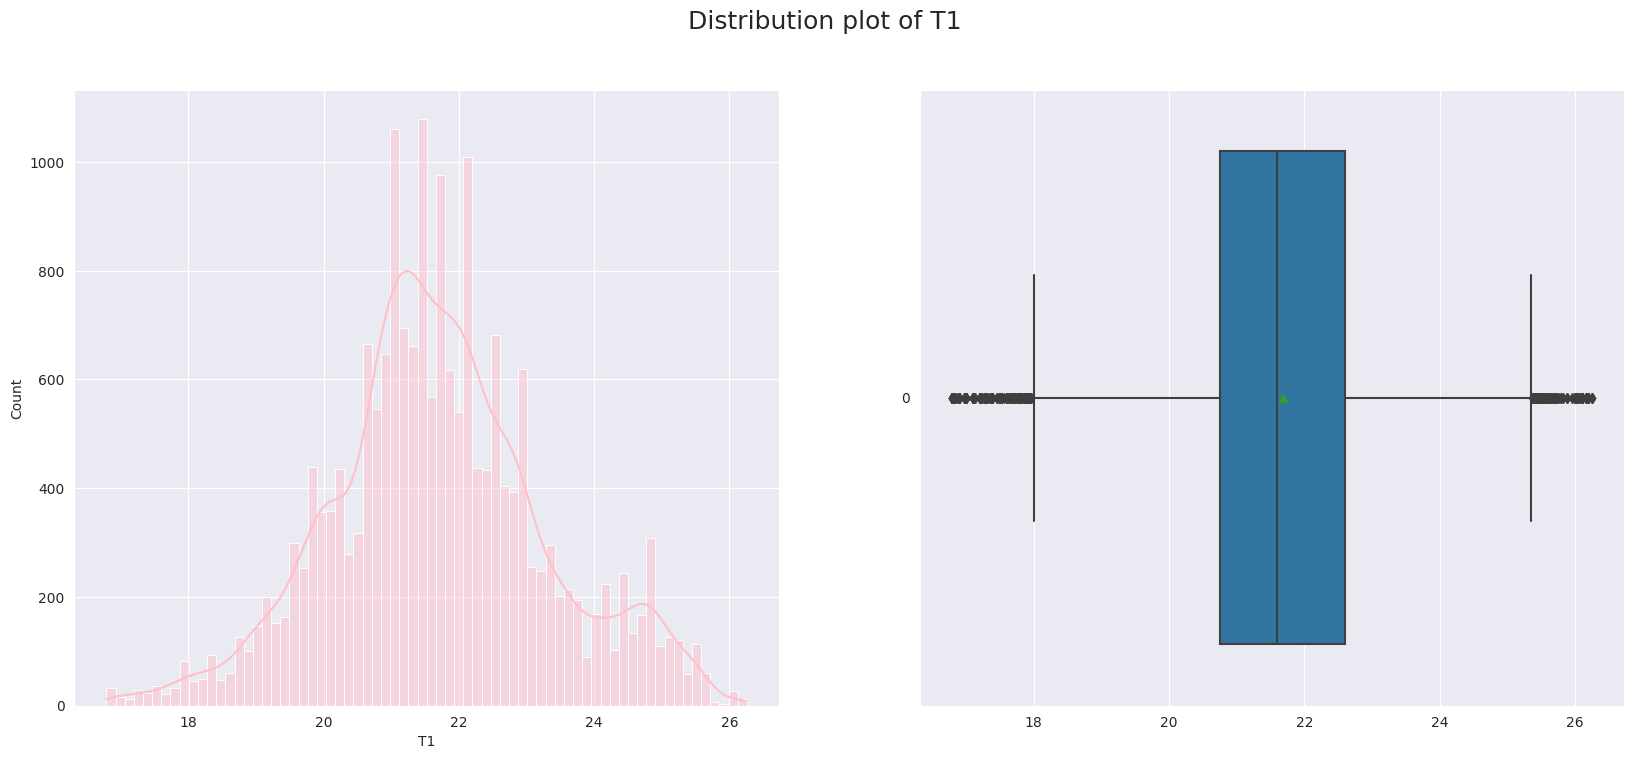

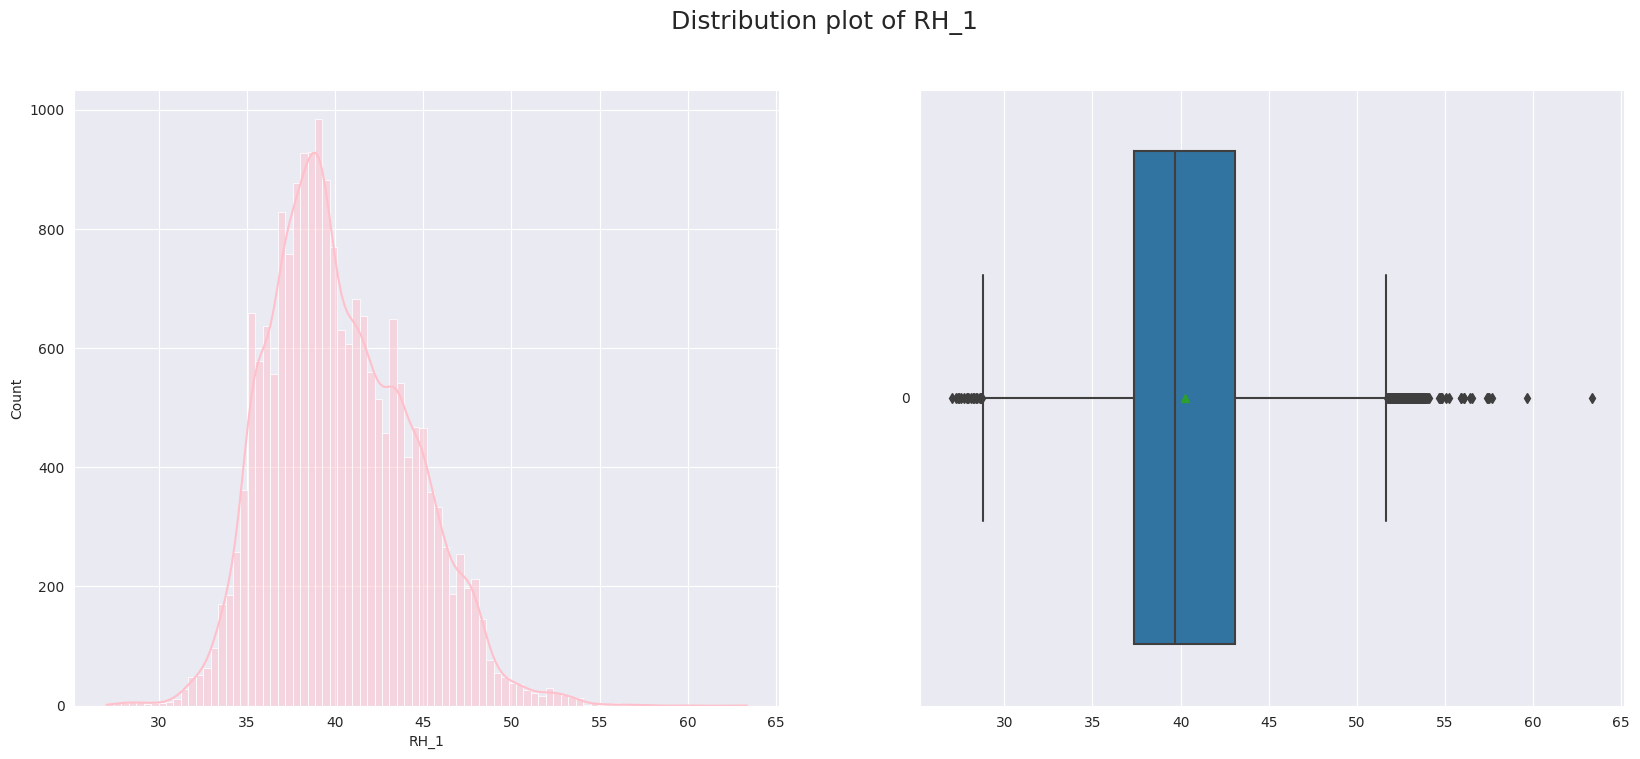

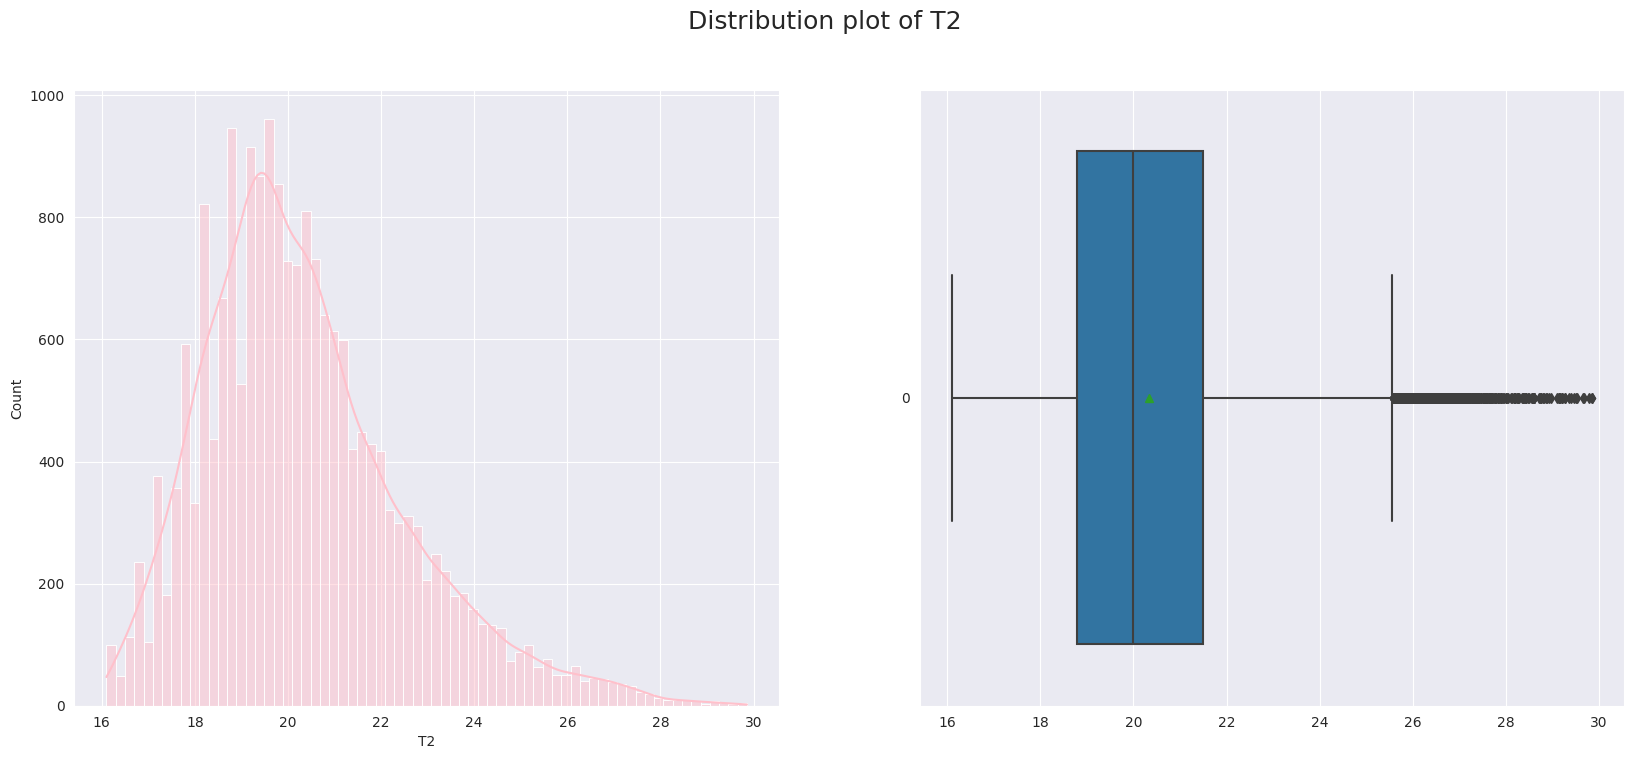

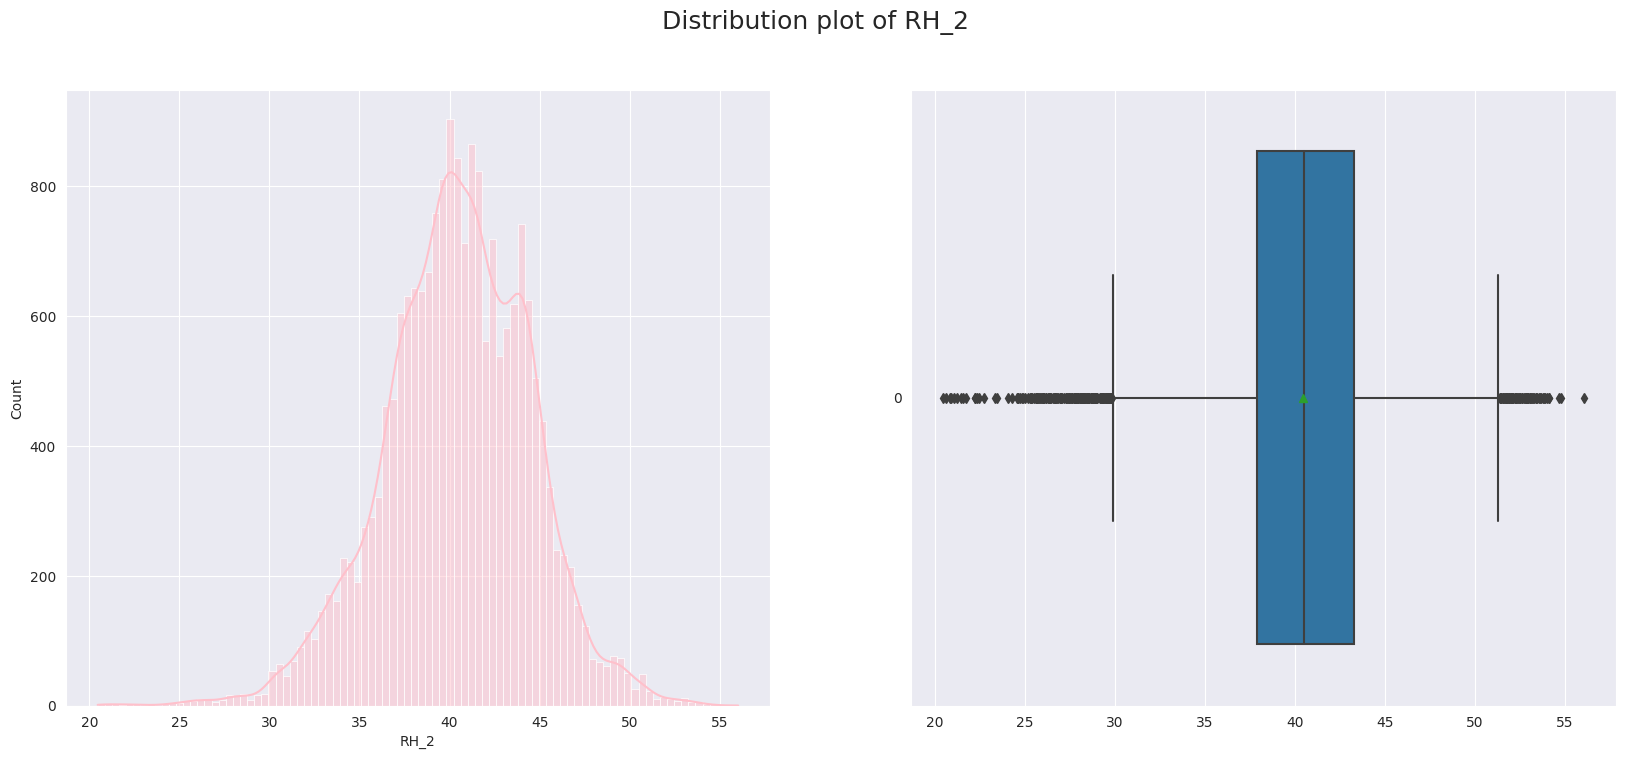

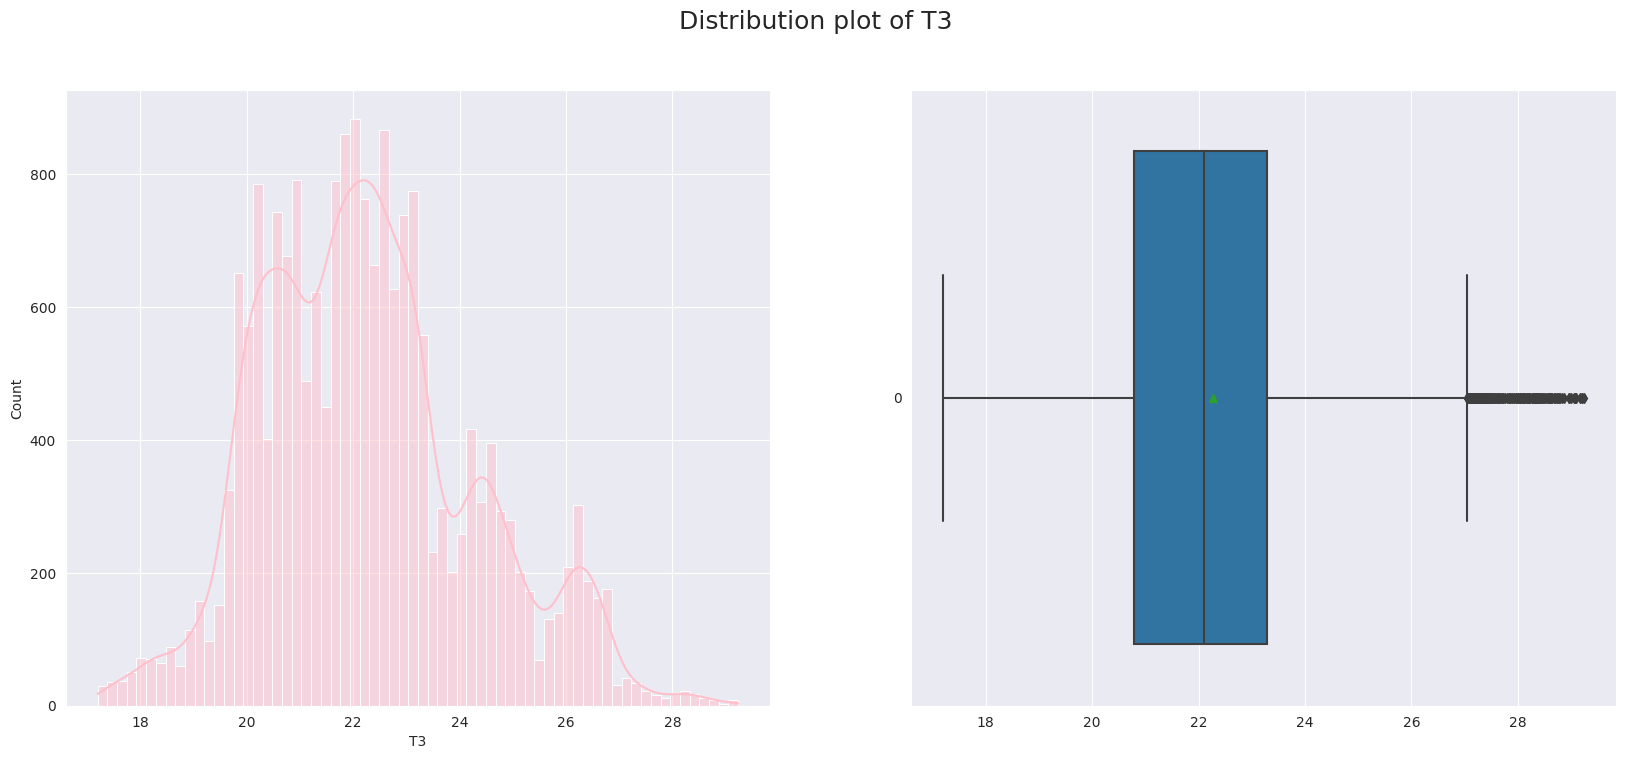

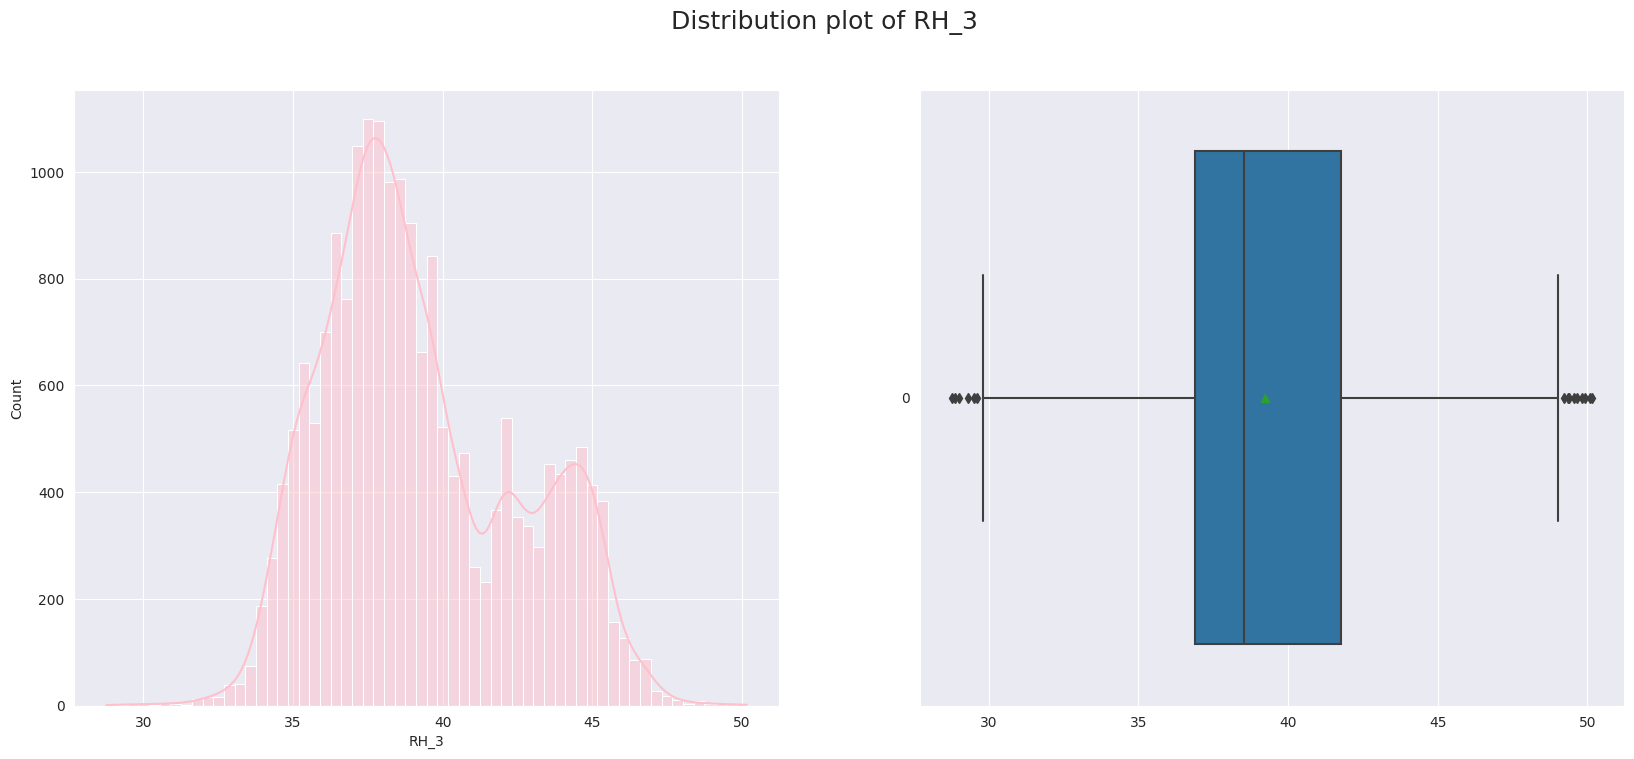

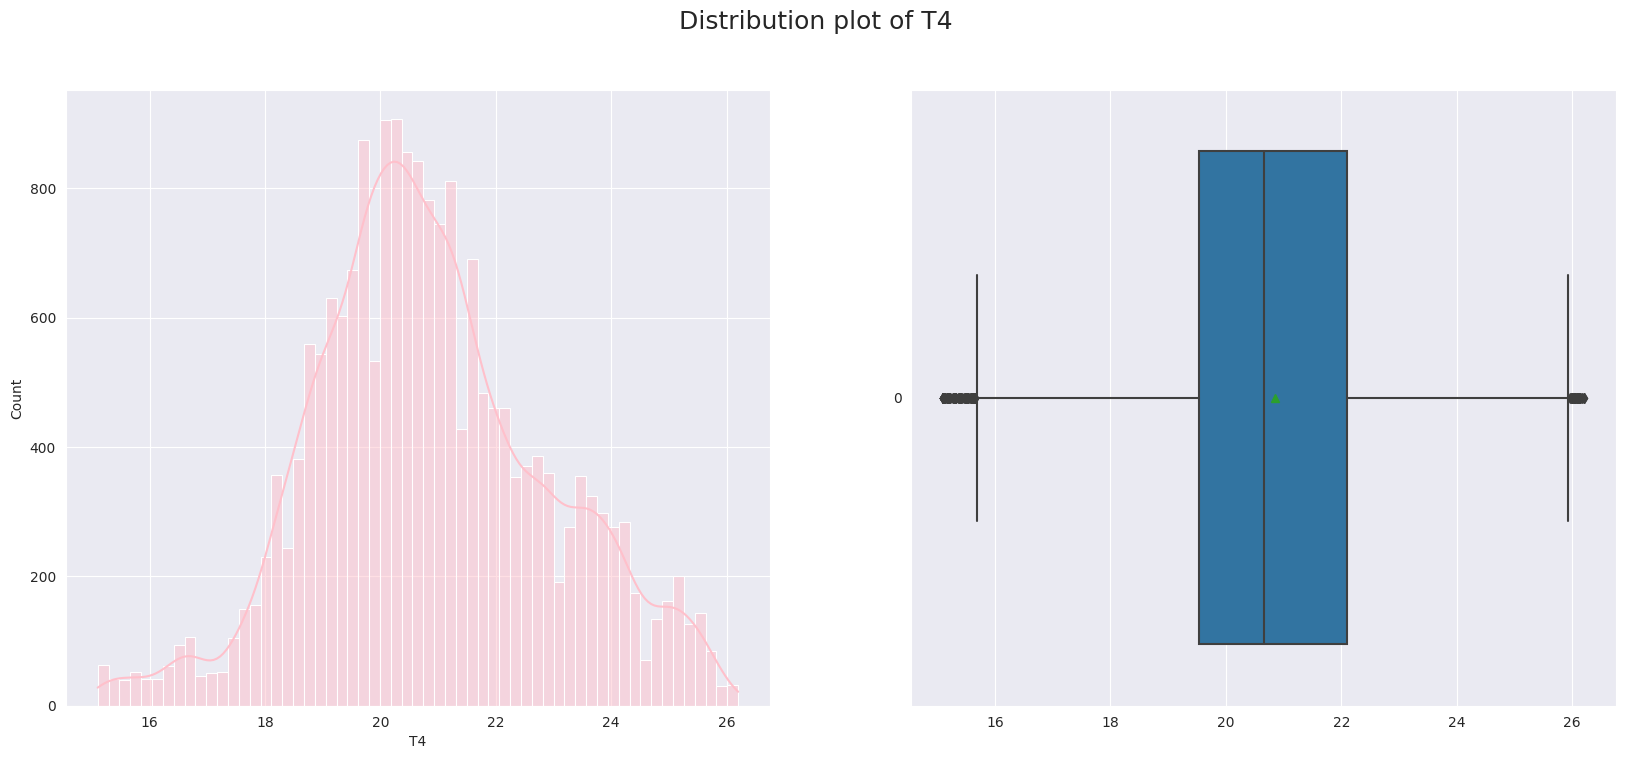

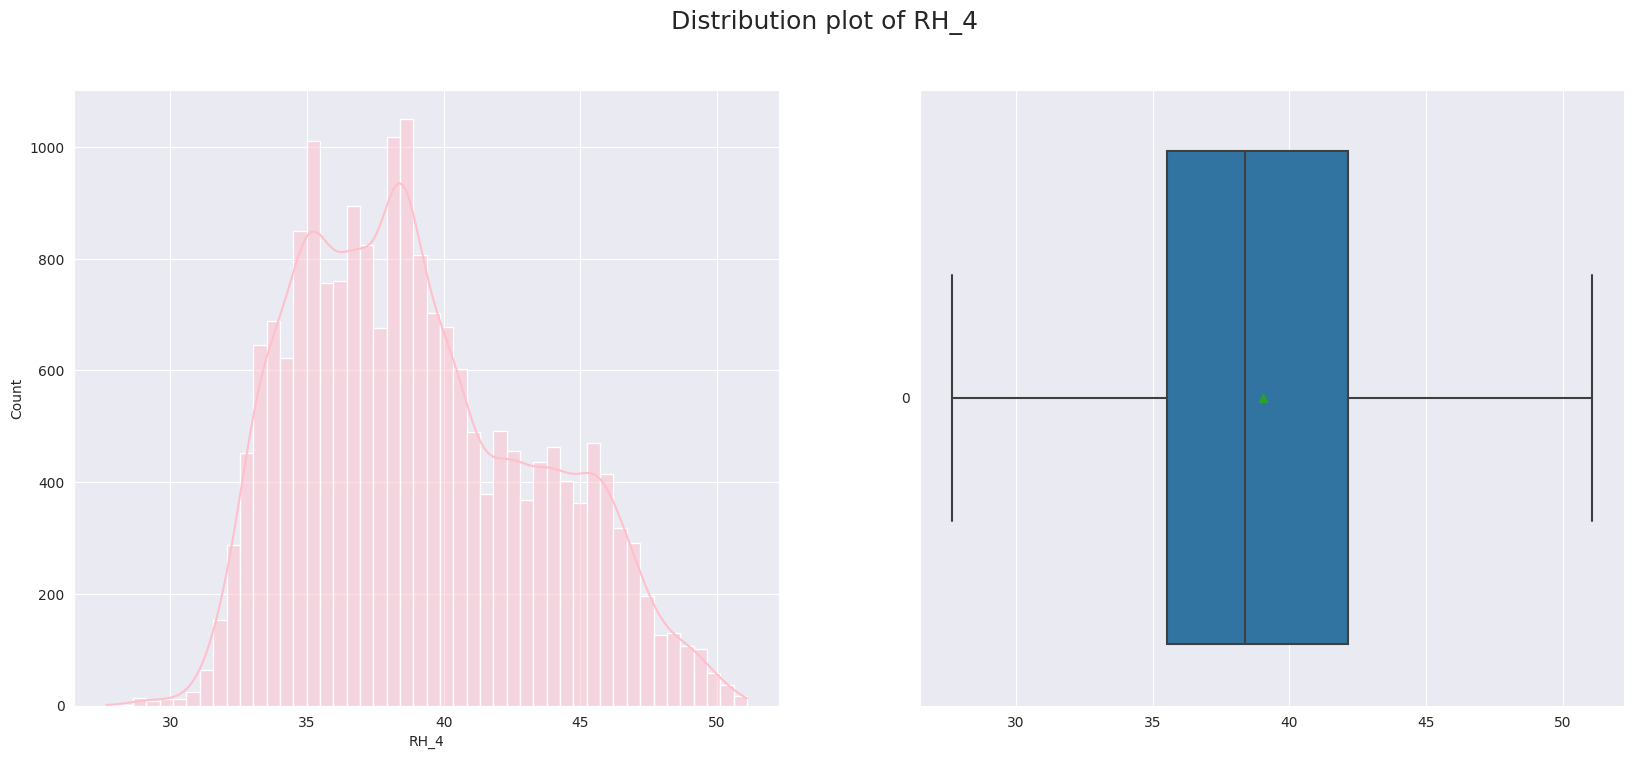

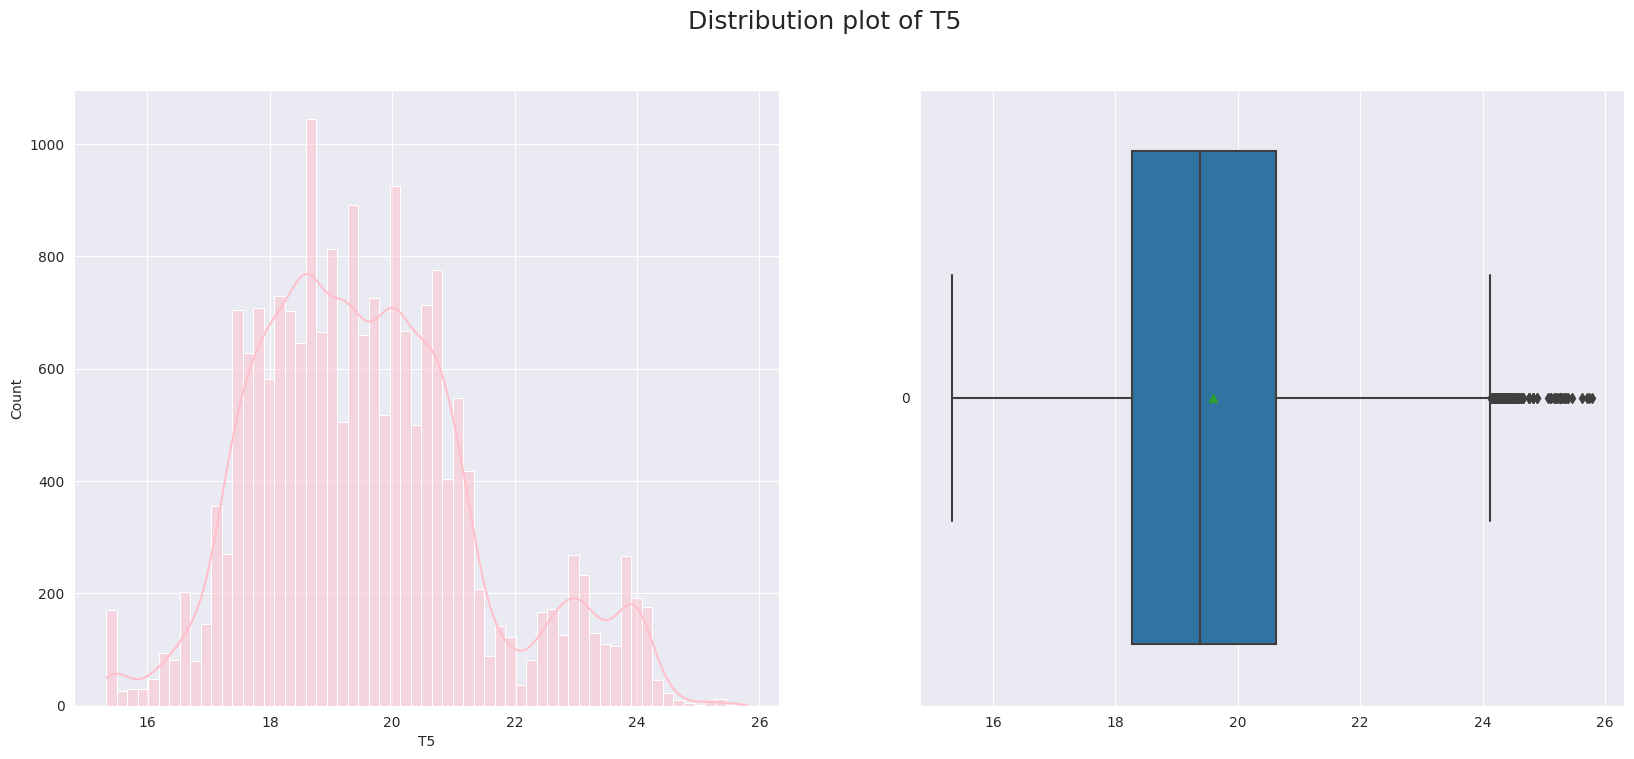

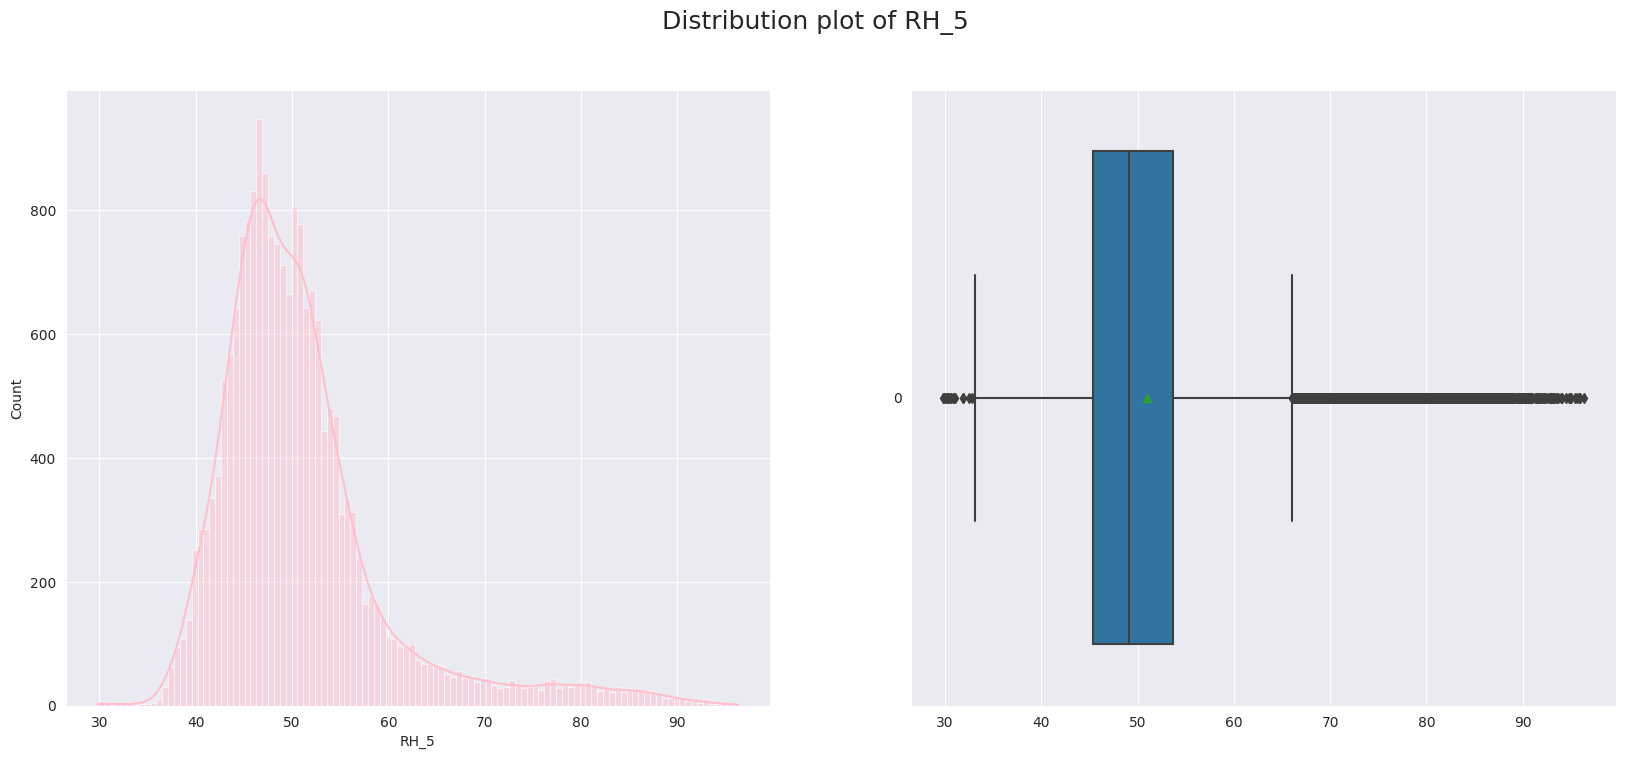

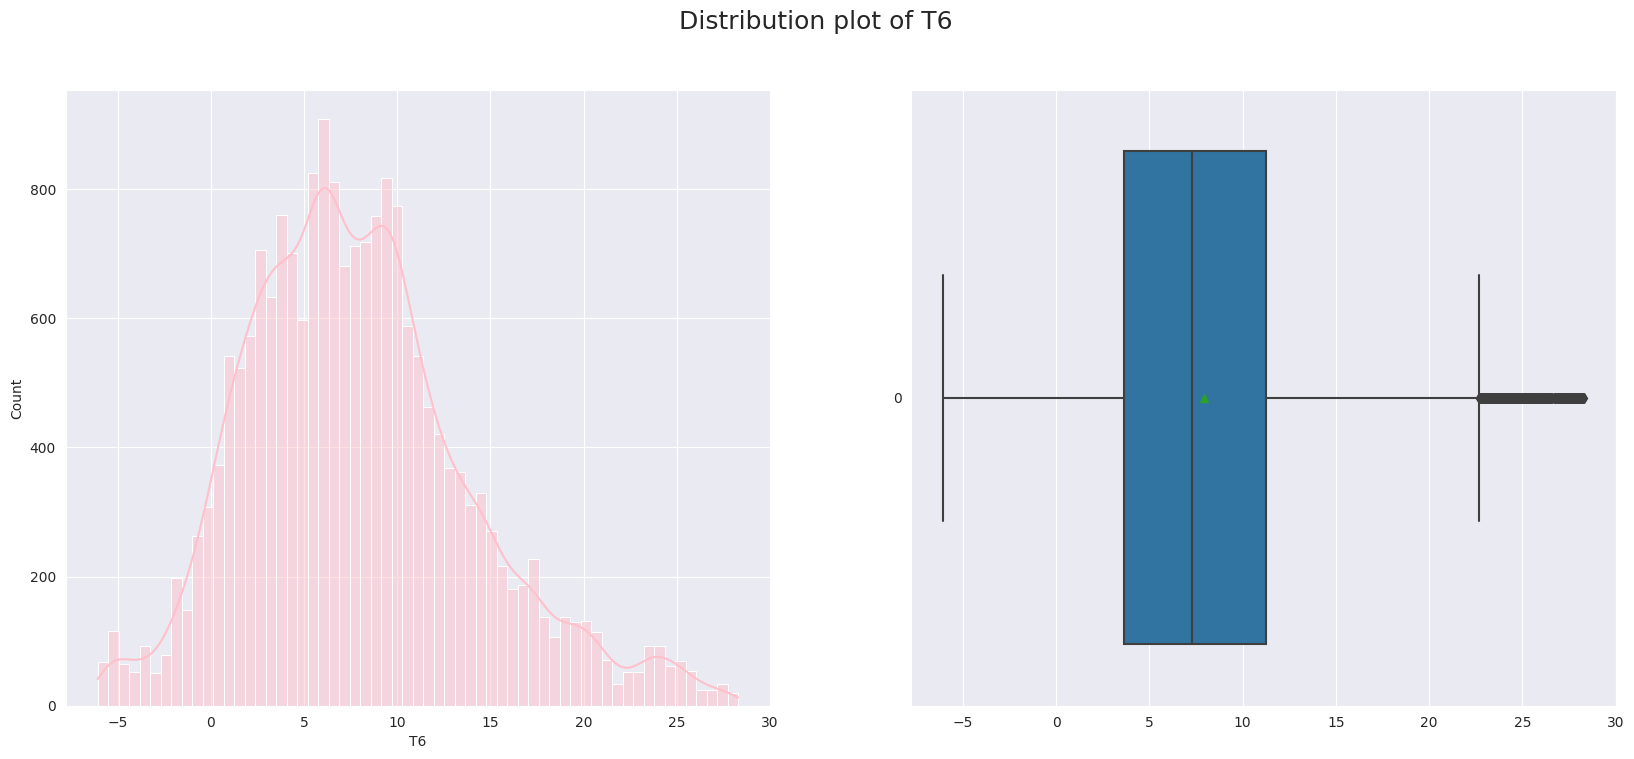

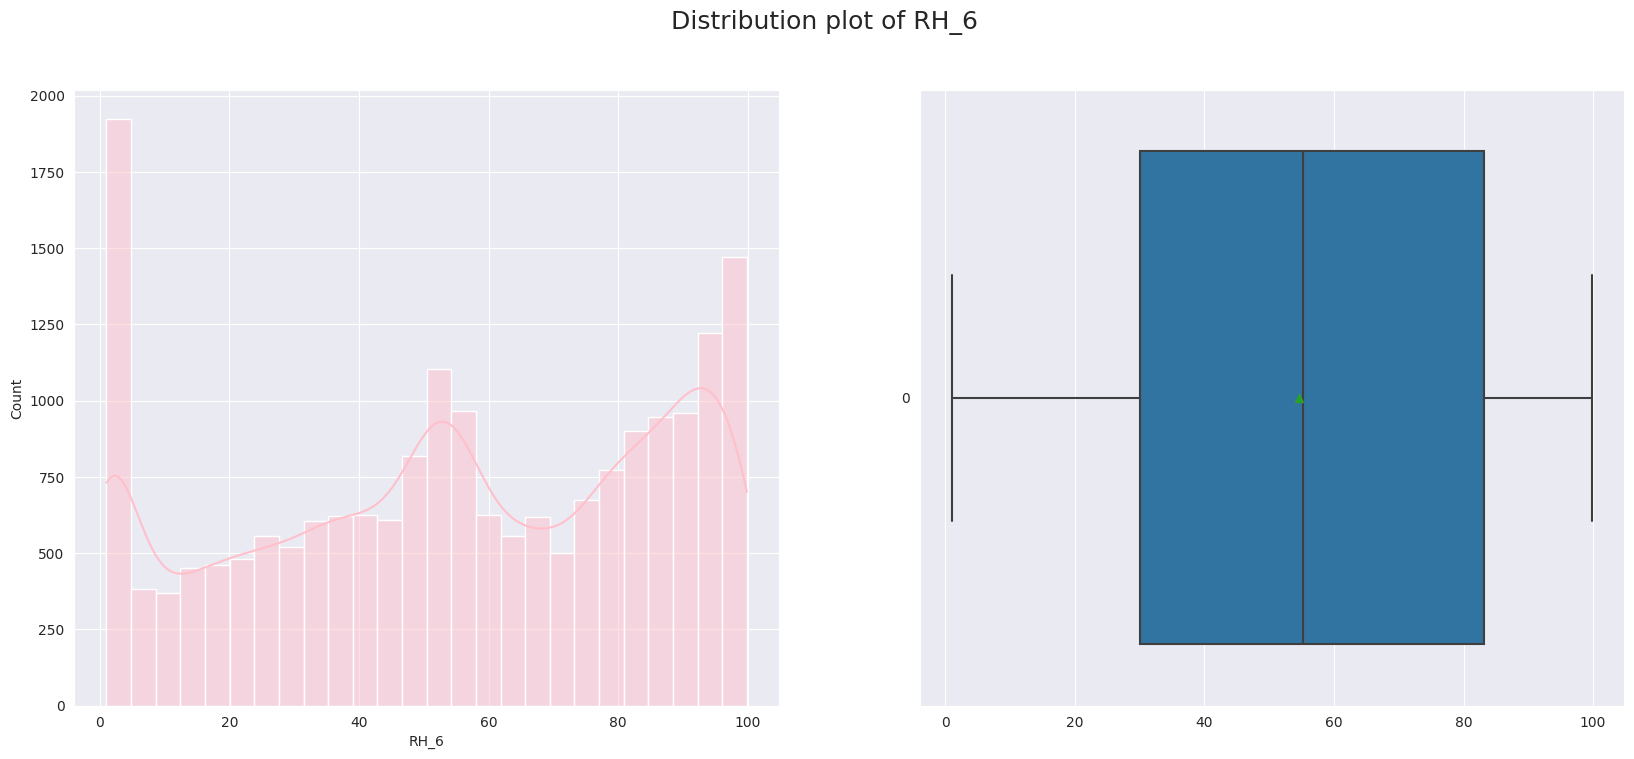

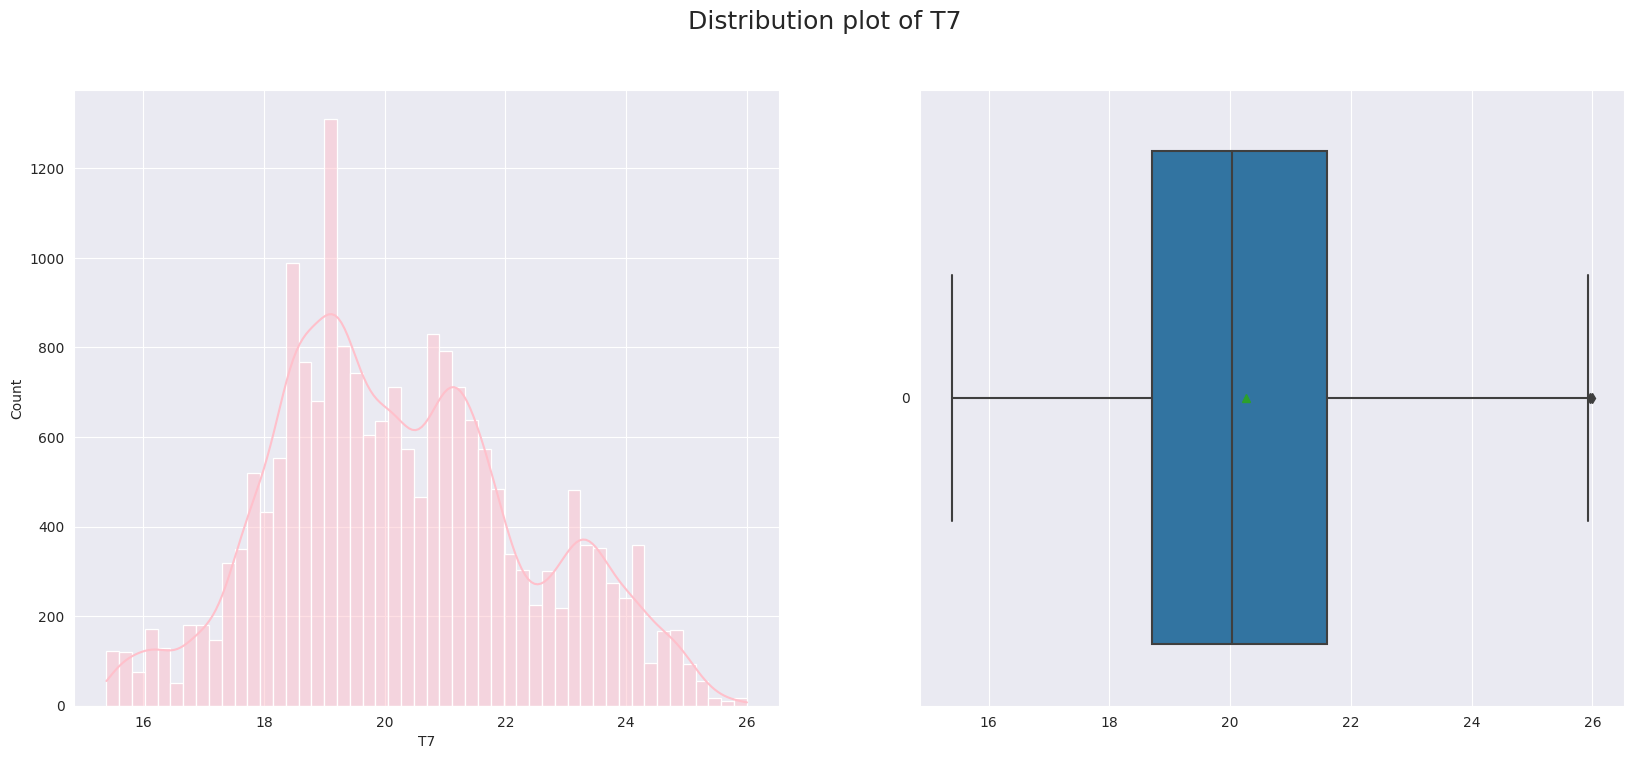

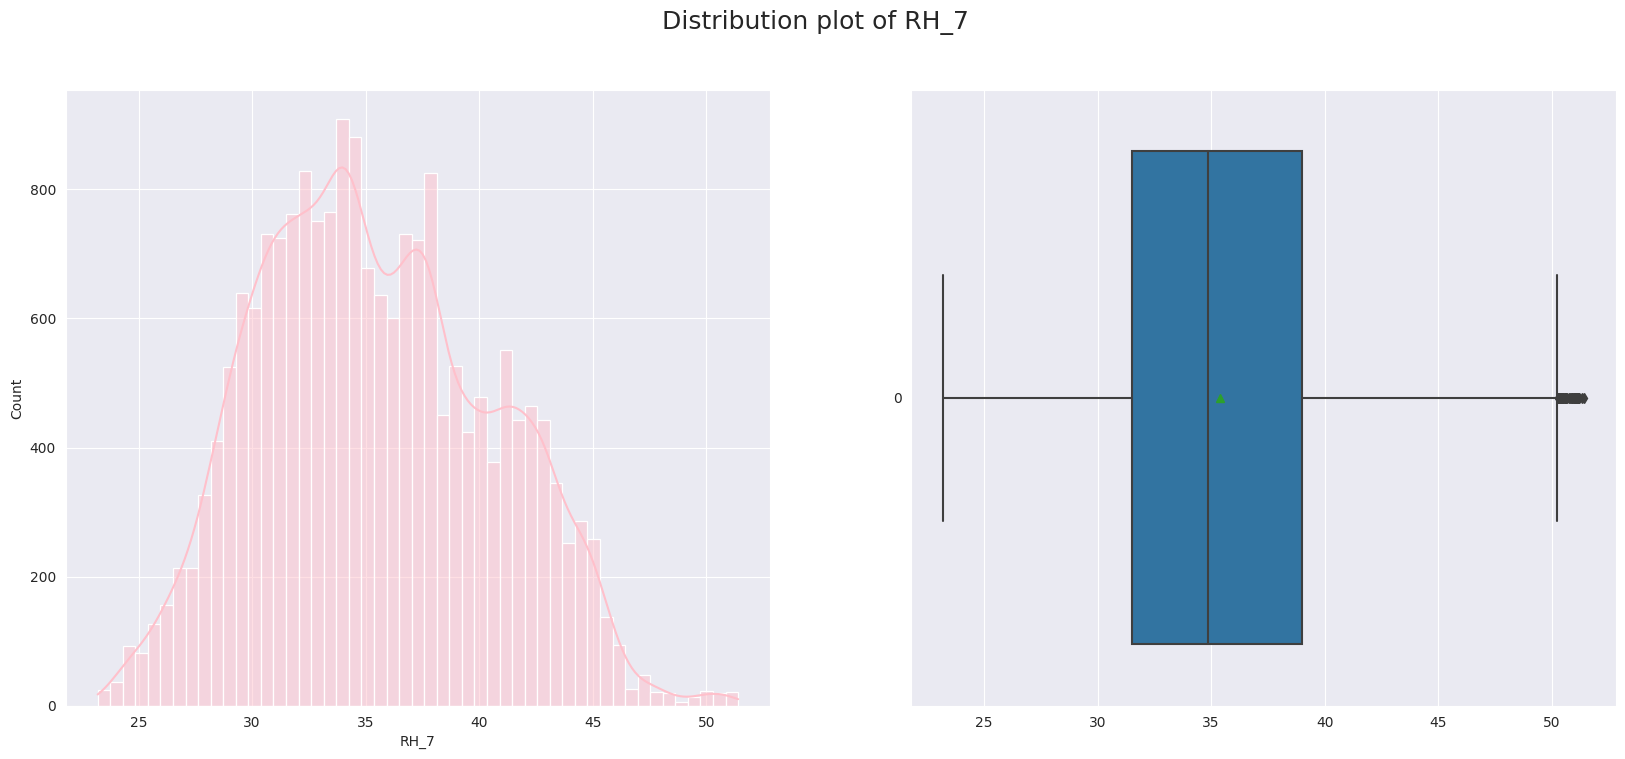

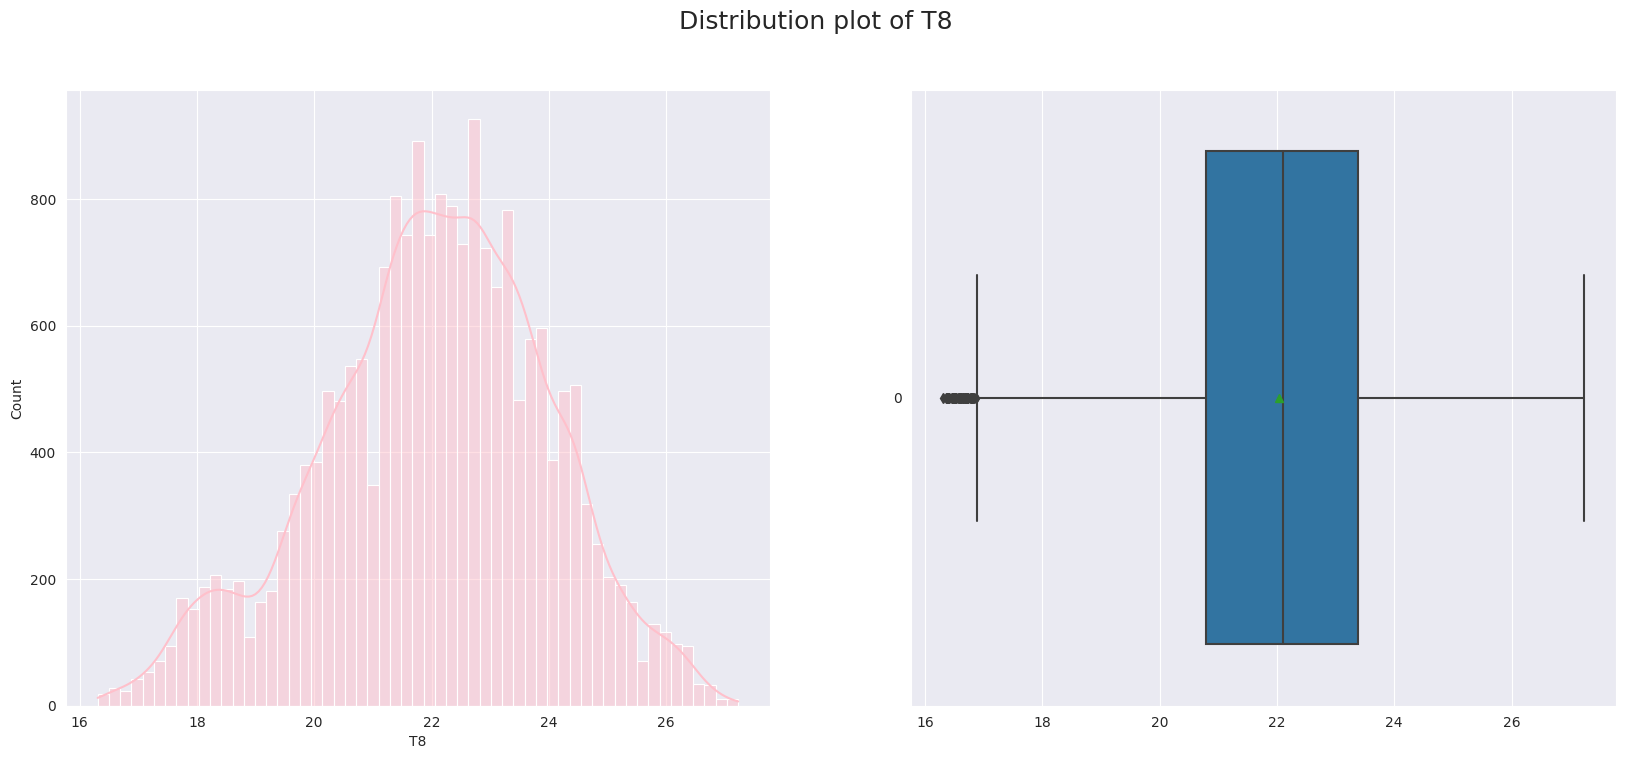

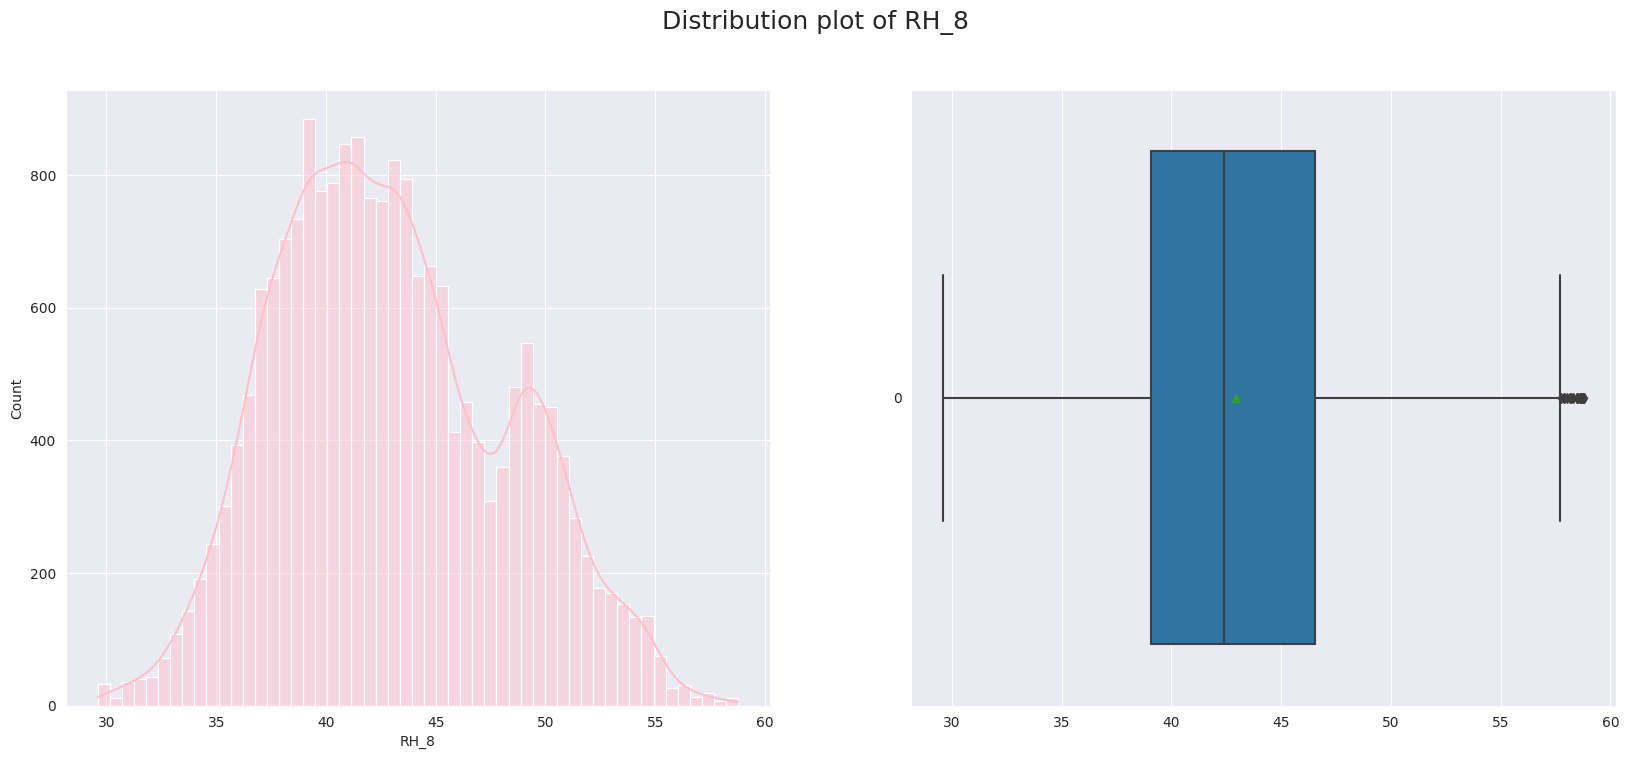

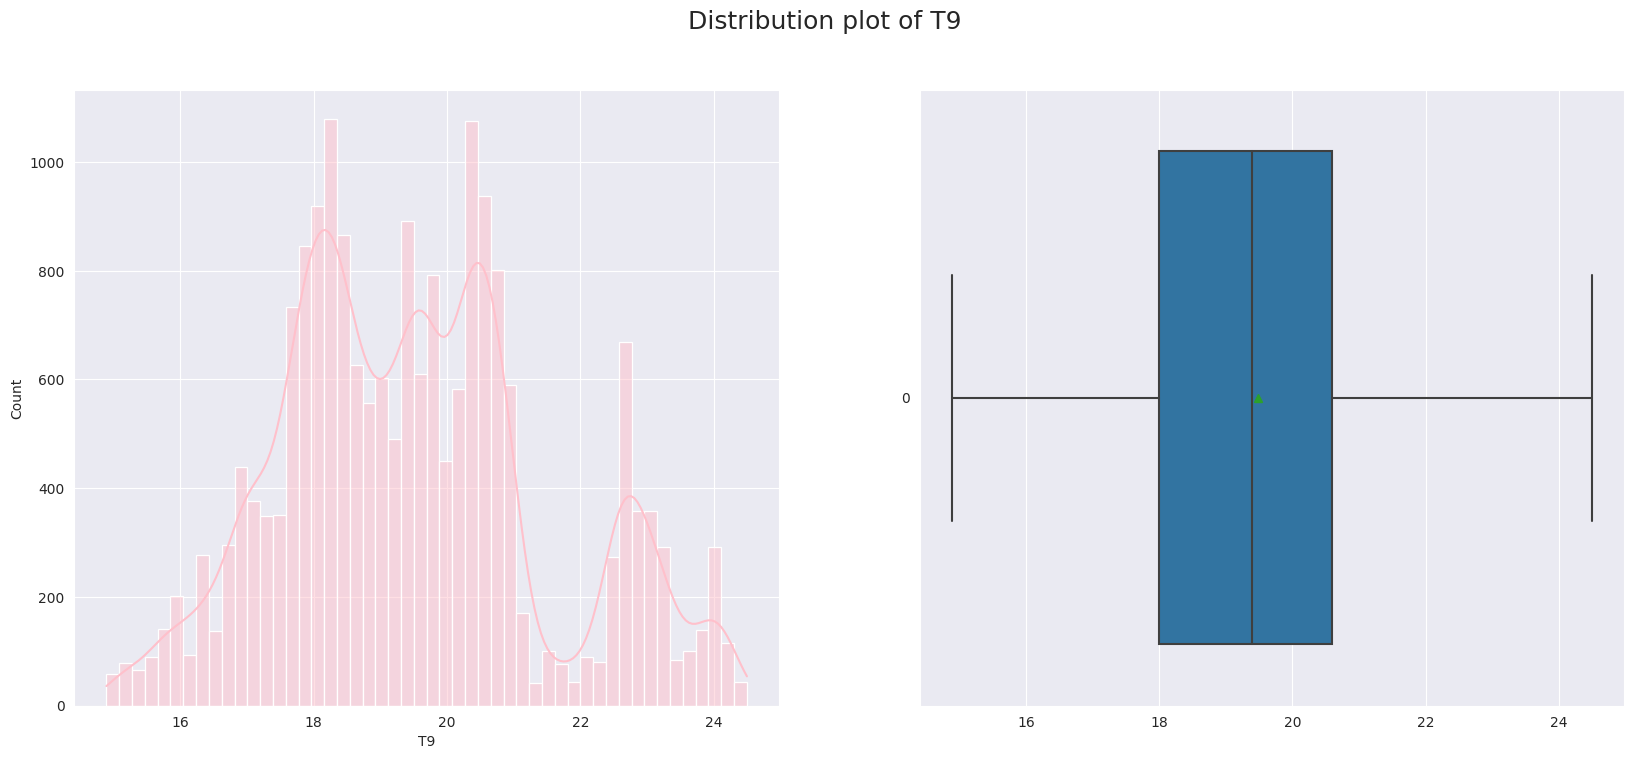

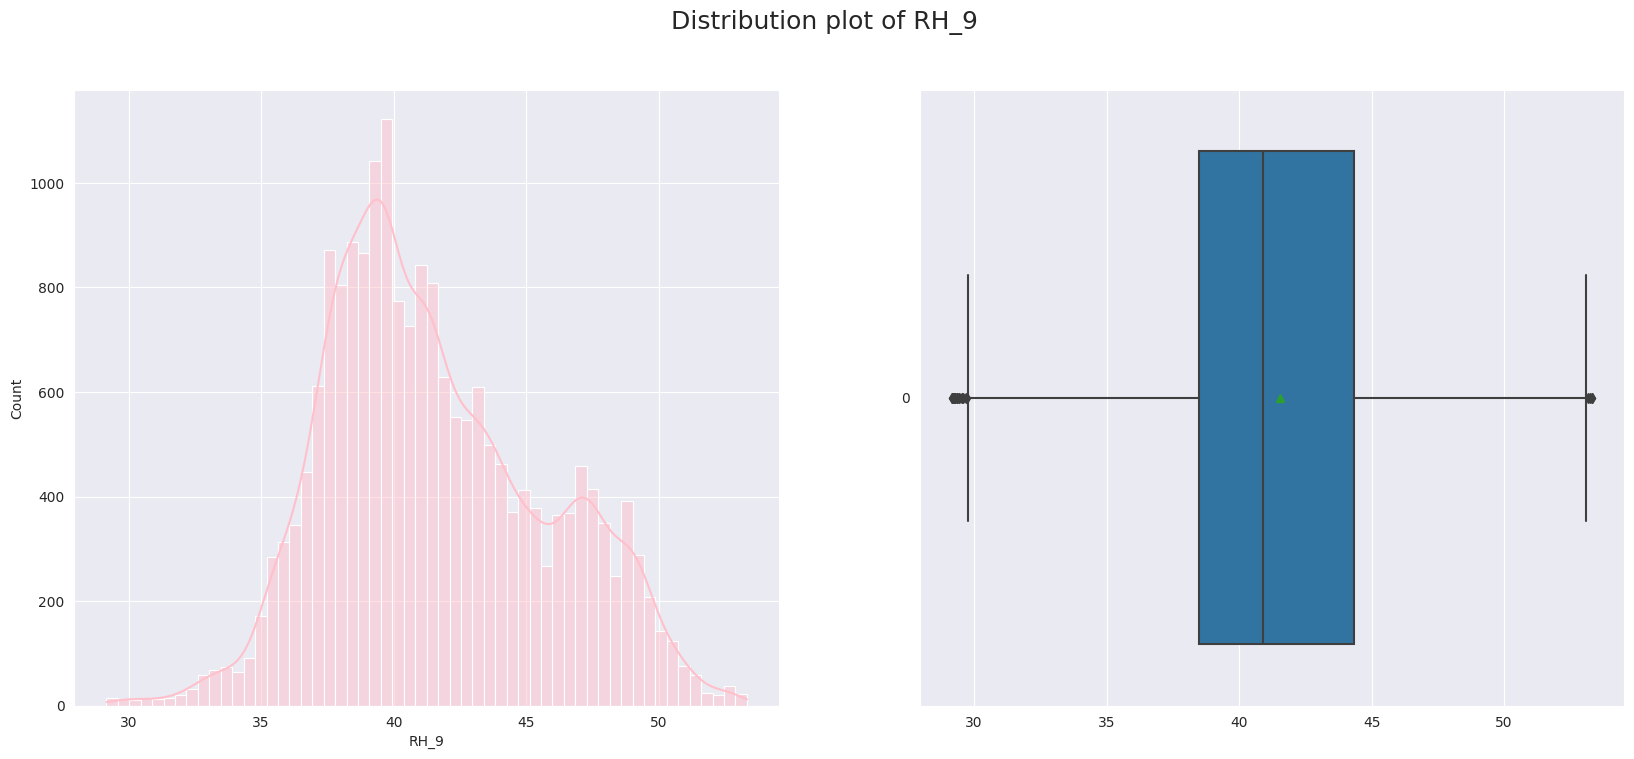

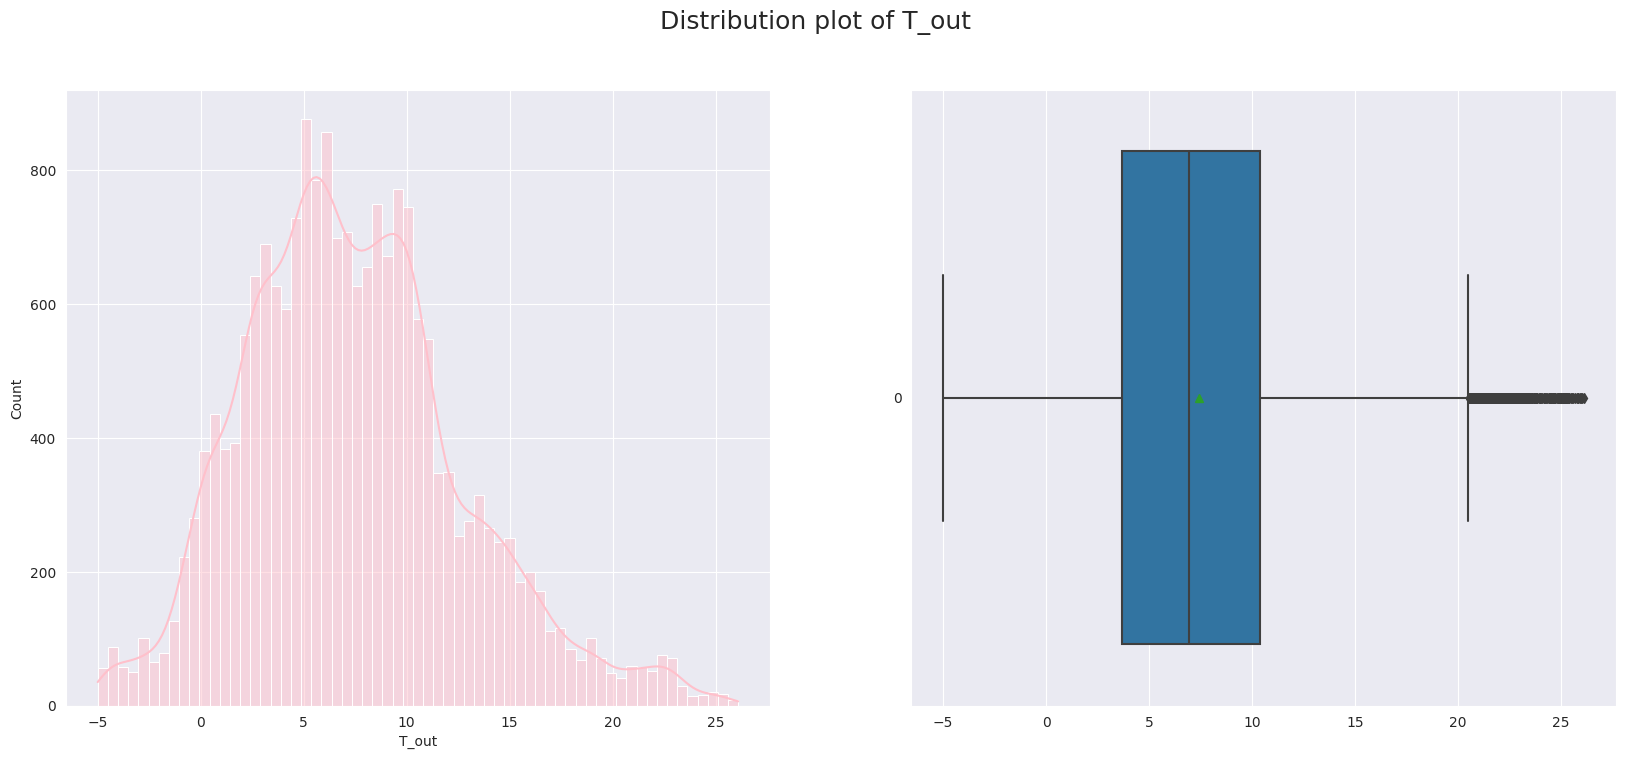

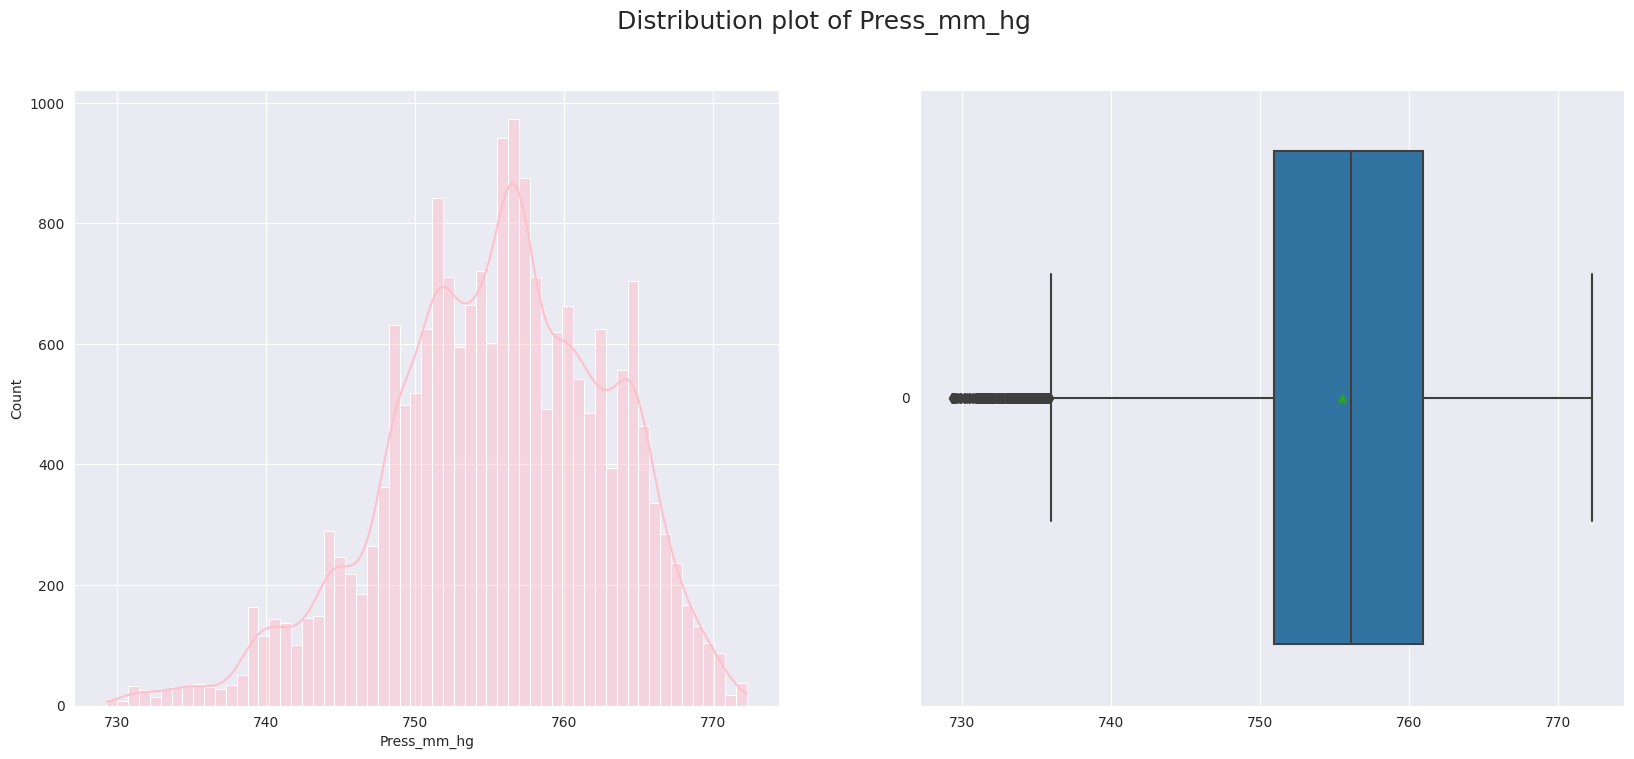

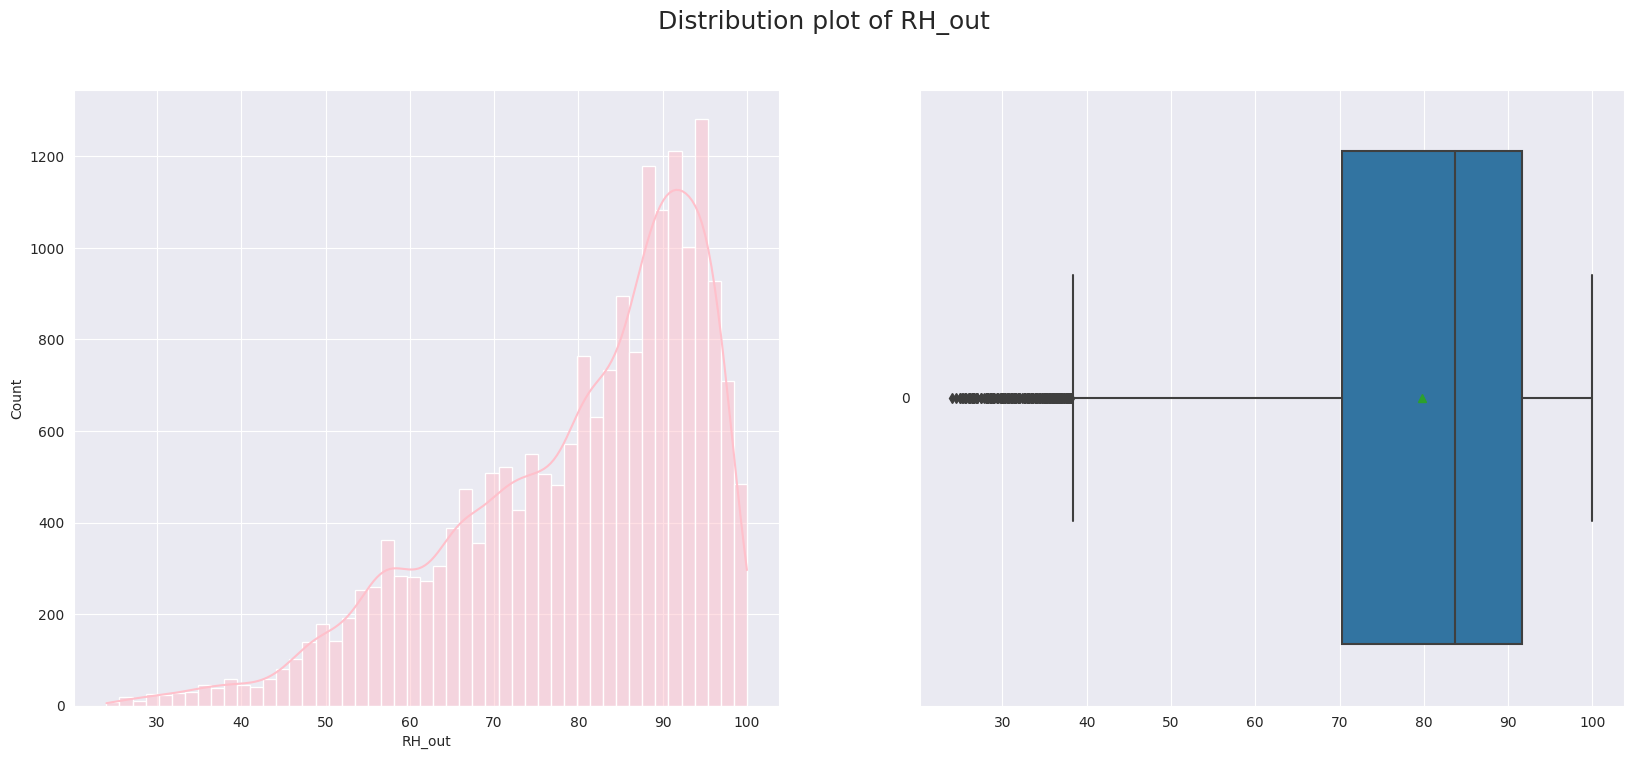

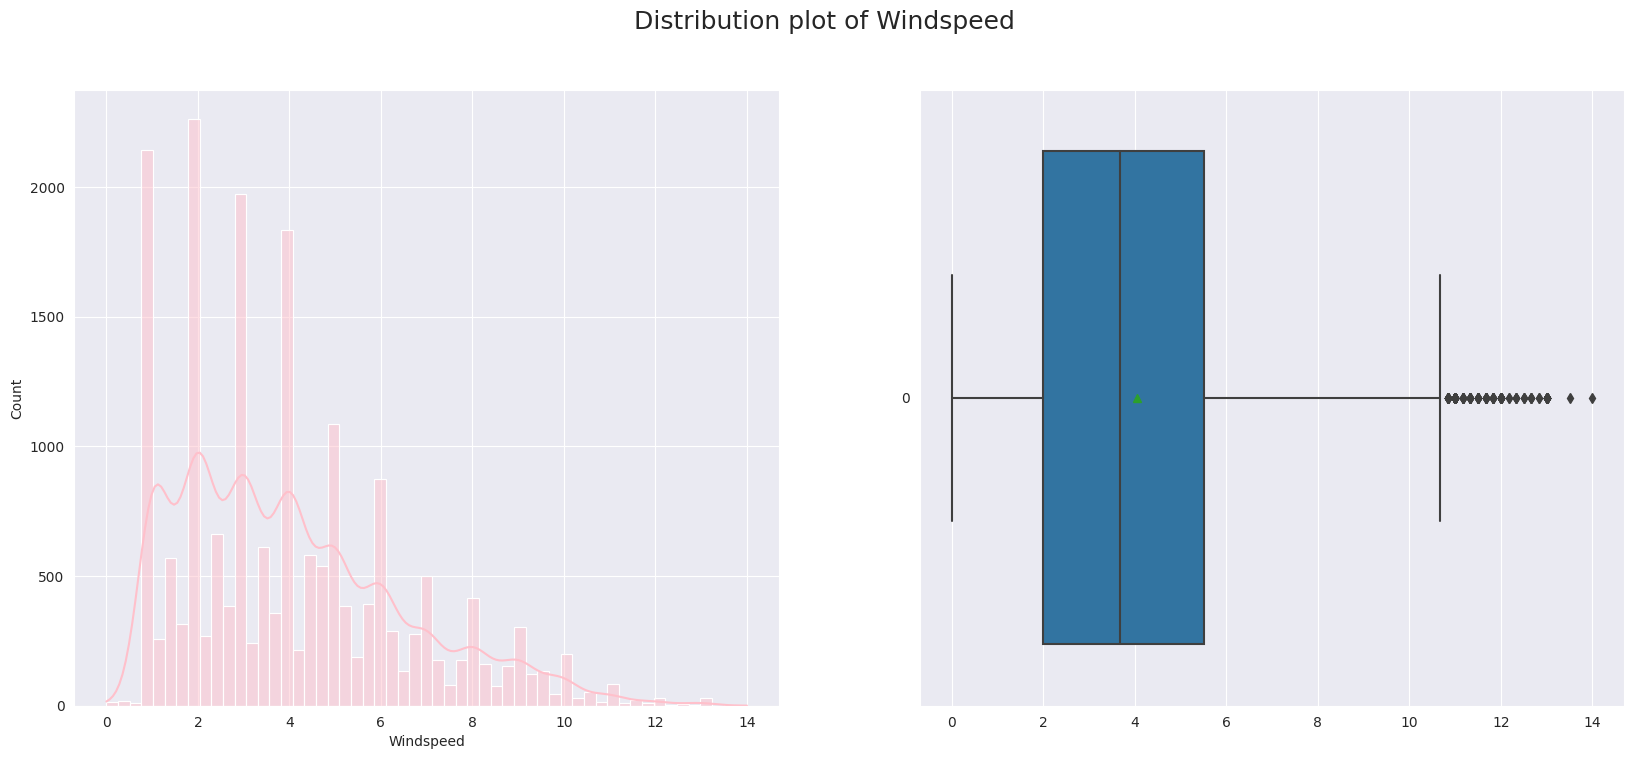

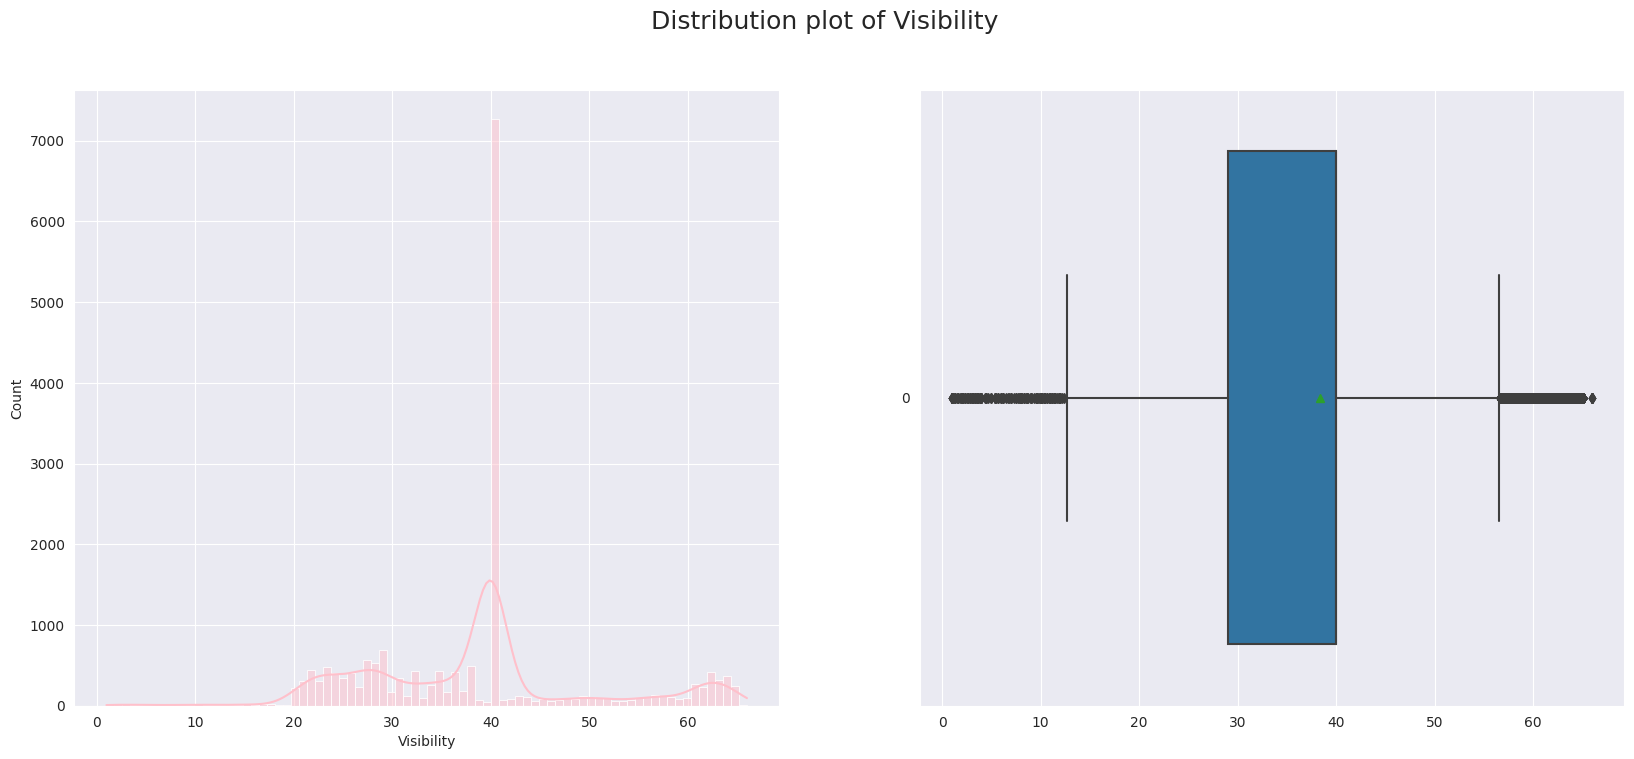

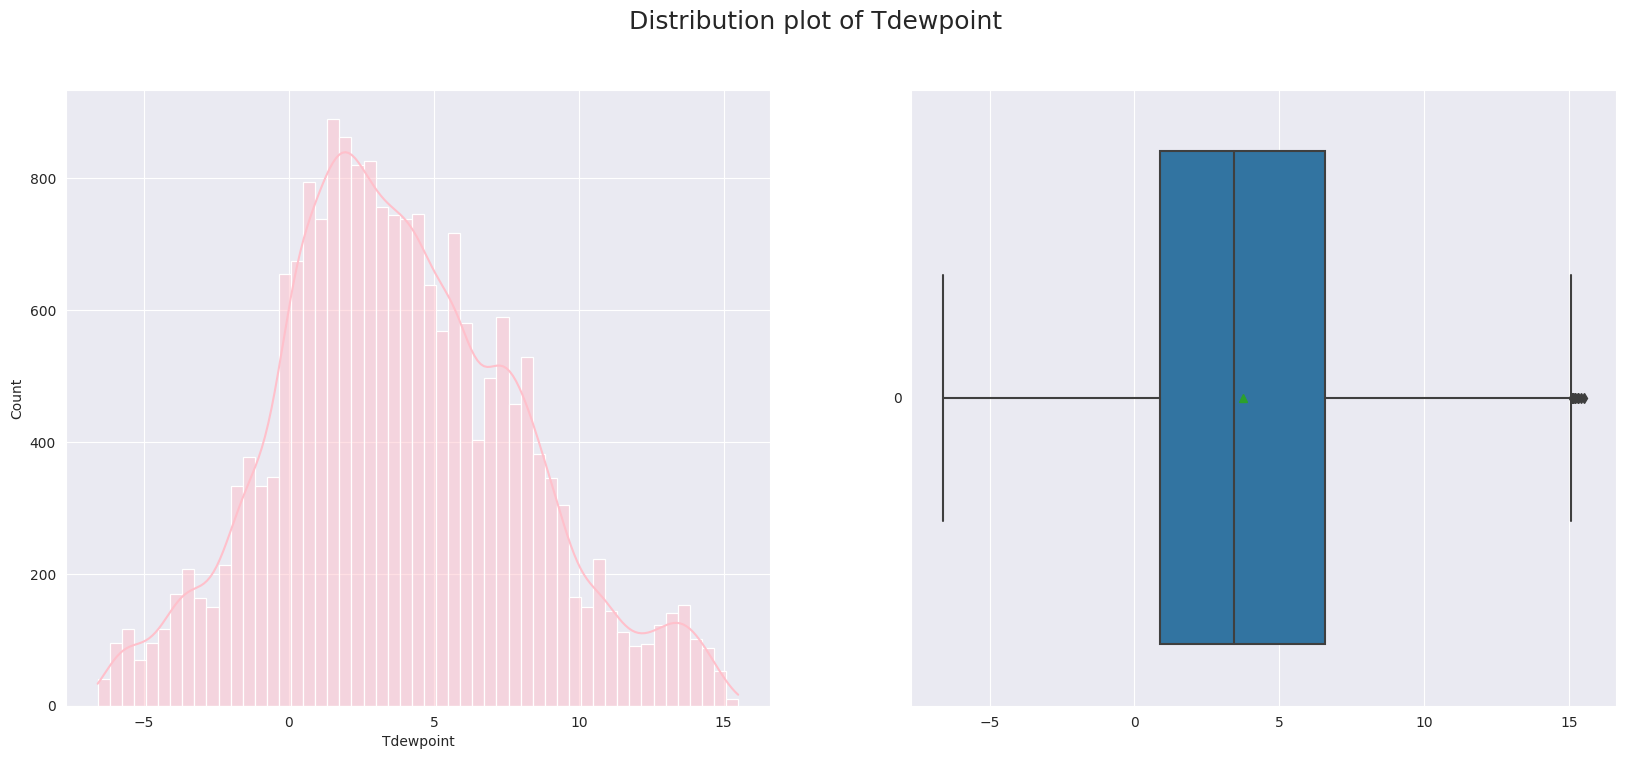

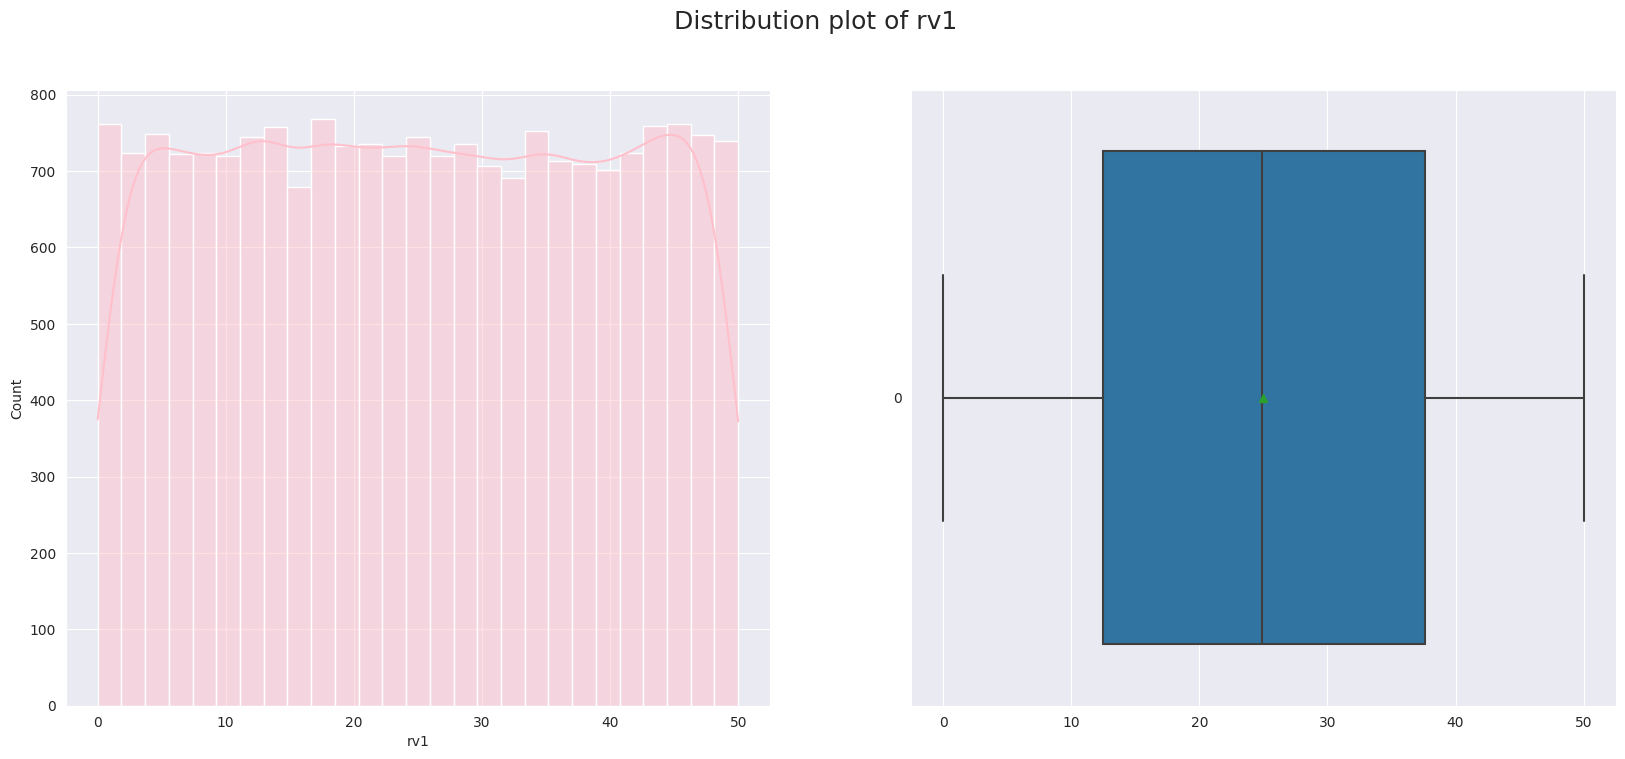

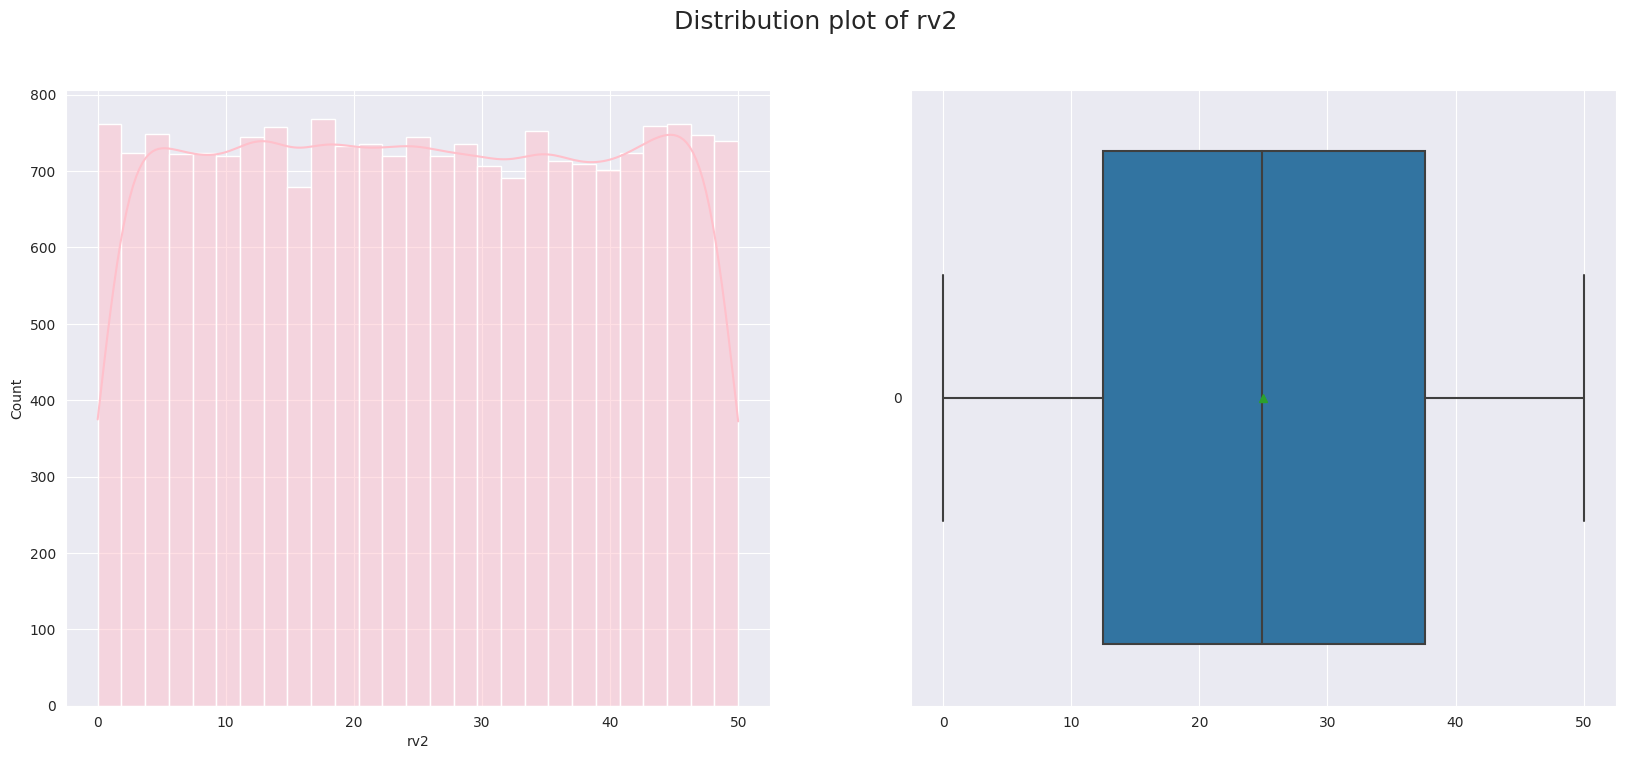

In [27]:
# Visualizing code of histogram and boxplot for each columns to know the data distribution- 
for col in df_2.describe().columns:
  fig,axes = plt.subplots(1,2,figsize=(20,8))
  sns.histplot(df_2[col],ax = axes[0],kde = True,color= 'pink')
  sns.boxplot(df_2[col],ax = axes[1],orient ='h',showmeans = True)
  fig.suptitle("Distribution plot of "+ col,fontsize = 18)
  plt.show()

##### 1. Why did you pick the specific chart?

Histograms are commonly used in statistics to demonstrate how many of a certain type of variable occur within a specific range.

Box plots give a good graphical image of the concentration of the data. They also show how far the extreme values are from most of the data. A box plot is constructed from five values: the minimum value, the first quartile, the median, the third quartile, and the maximum value. We use these values to compare how close other data values are to them.

Thus, for every numeric value in our data set, I used histogram and box plot to analyse frequency, outliers and interquartile range including mean, median, min and max values.

##### 2. What is/are the insight(s) found from the chart?

From above charts we observe that all columns are distributed symmetrically and mean is nearly same as median for all numerical columns.

**Observations--**

**Temperature -** All the columns follow normal distribution except T9.

**Humidity -** All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house.

**Appliance -** This column is postively skewed , most the values are around mean 100 Wh . There are outliers in this column.

**Visibilty -** This column is negatively skewed.

**Windspeed -** This column is postively skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from the observations can help create a positive business impact. Here are some potential implications of the findings:

**Temperature analysis:** Understanding the normal distribution of temperature readings, except for T9, can assist businesses in monitoring and managing indoor temperature conditions. It enables them to identify any deviations from the expected distribution and take appropriate actions to maintain optimal temperature levels for comfort, energy efficiency, and occupant satisfaction.

**Humidity analysis:** The normal distribution of humidity readings, except for RH_6 and RH_out, provides insights into indoor humidity levels. This information can be valuable for HVAC system control and humidity regulation. Monitoring and adjusting humidity levels based on the normal distribution can contribute to occupant comfort, reduce moisture-related issues, and enhance indoor air quality.

**Appliance energy consumption:** Understanding the positive skewness in the Appliance column, along with the presence of outliers, can help businesses identify high-energy consumption cases and potential energy-saving opportunities. By analyzing the distribution and identifying outliers, businesses can target energy-efficient practices, optimize appliance usage, and develop strategies to reduce energy consumption and associated costs.

**Visibility and windspeed analysis:** The negative skewness in the Visibility column and positive skewness in the Windspeed column can provide insights into environmental conditions. These insights can be useful for energy management, outdoor activities planning, and understanding the impact of weather conditions on business operations.

**By leveraging the gained insights, businesses can take several actions to create a positive impact, including:**

1) Optimizing HVAC system control and energy management based on temperature and humidity distributions.

2) Implementing energy-efficient practices and identifying opportunities for reducing appliance energy consumption.

3) Incorporating weather conditions into business planning and operations.

4) Developing targeted marketing strategies or services based on environmental conditions.

#### Chart - 2 Histogram for features-

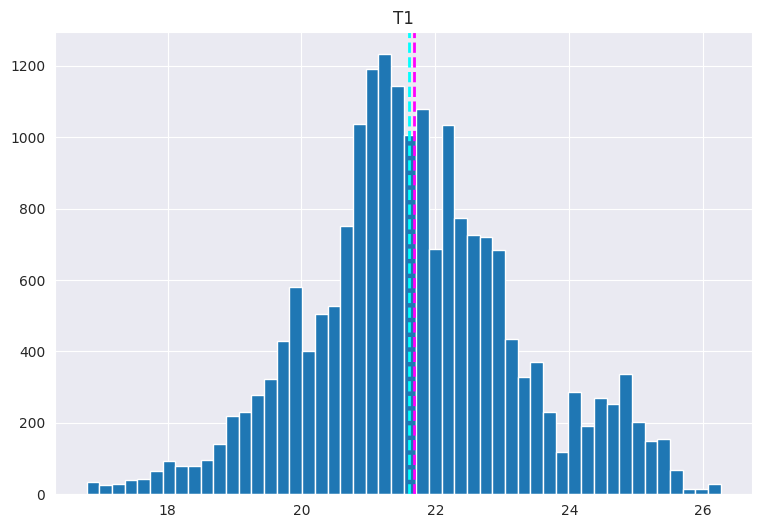

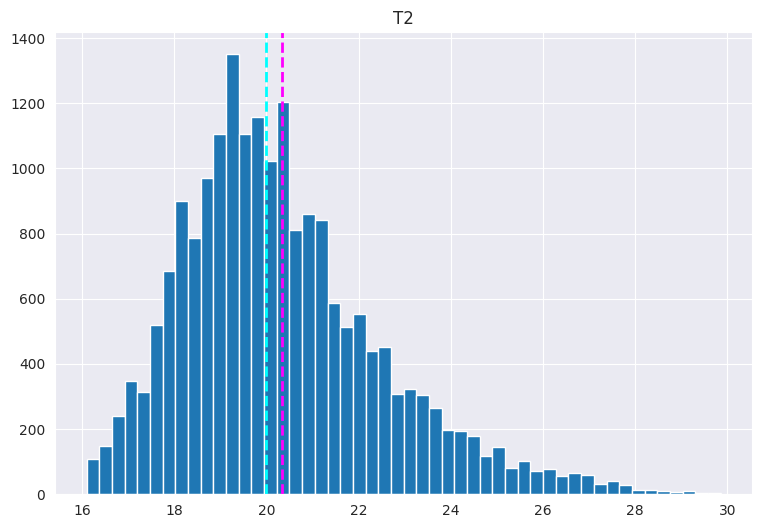

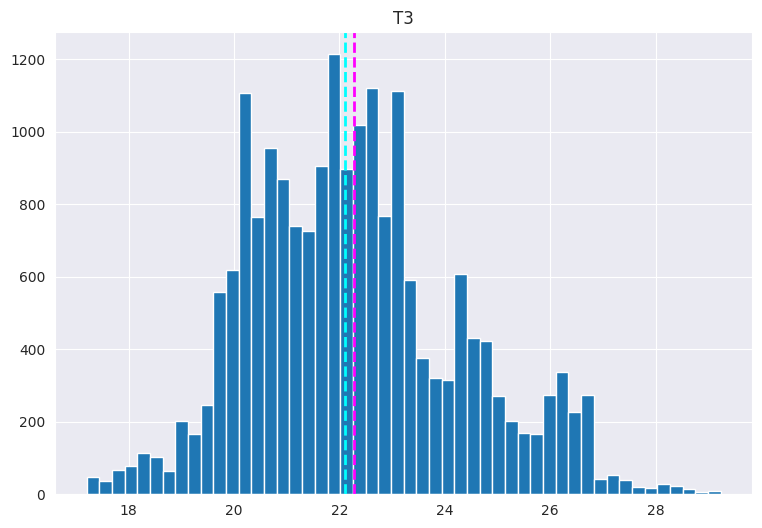

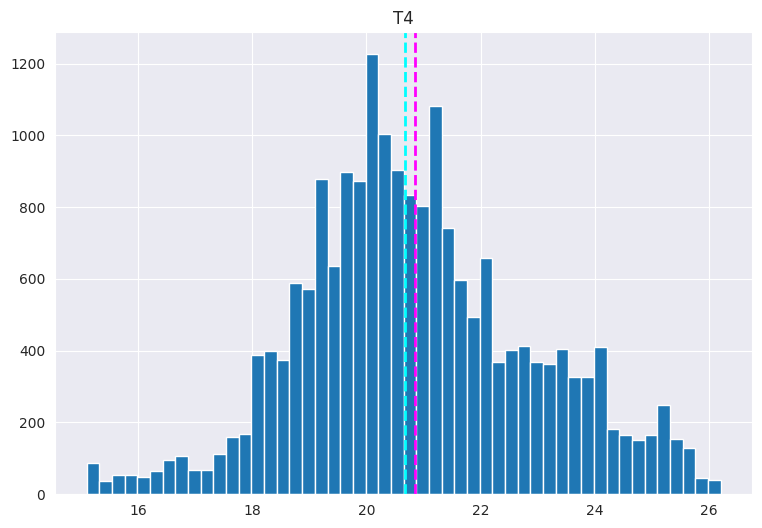

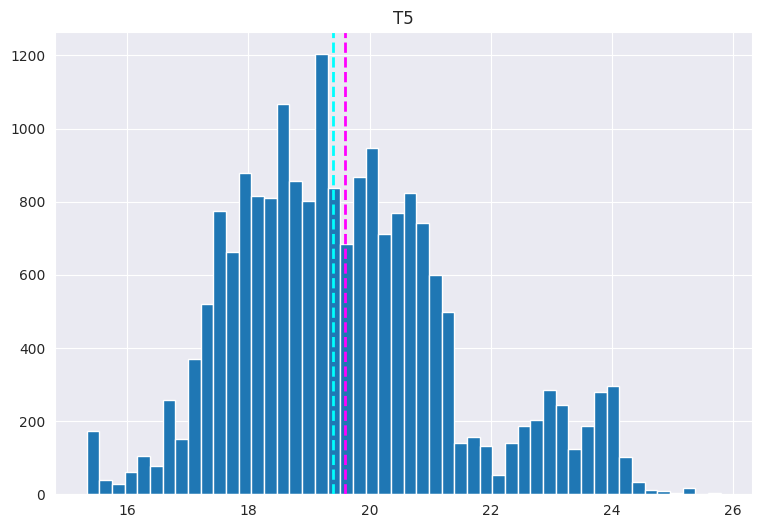

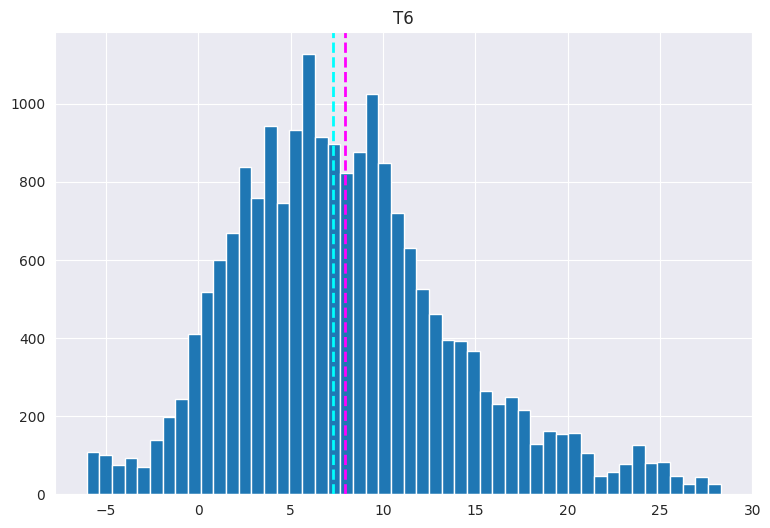

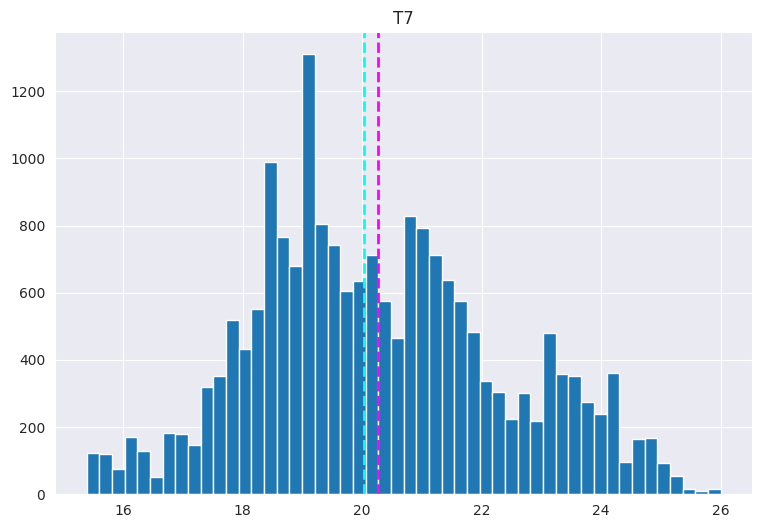

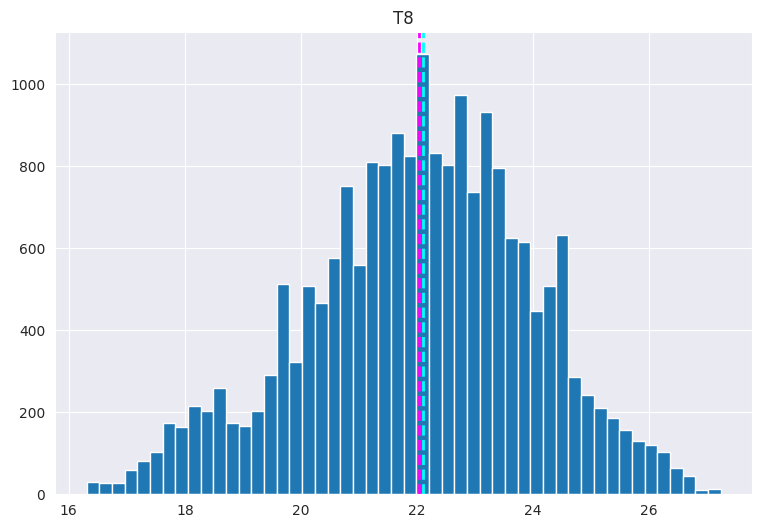

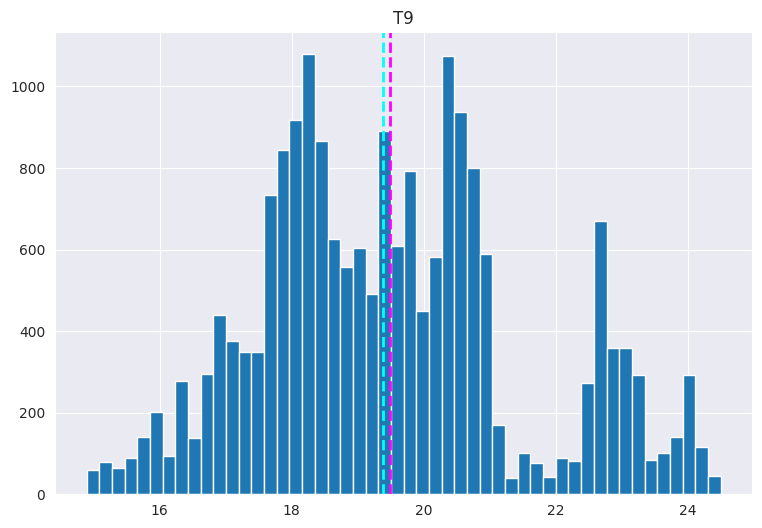

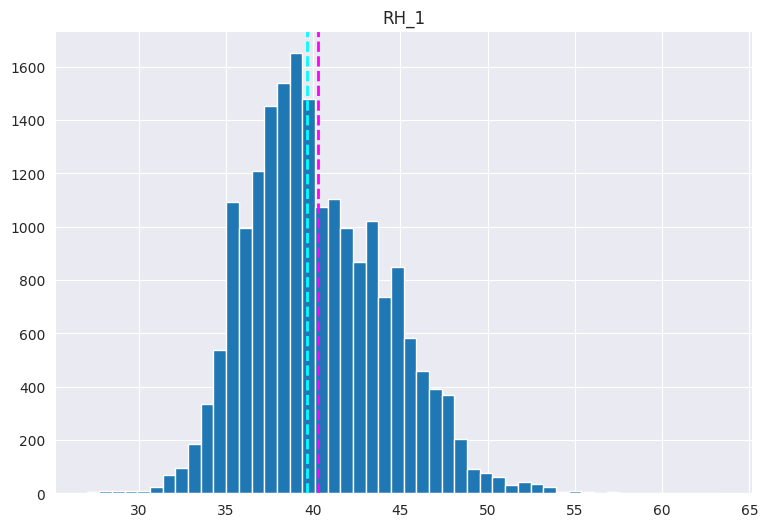

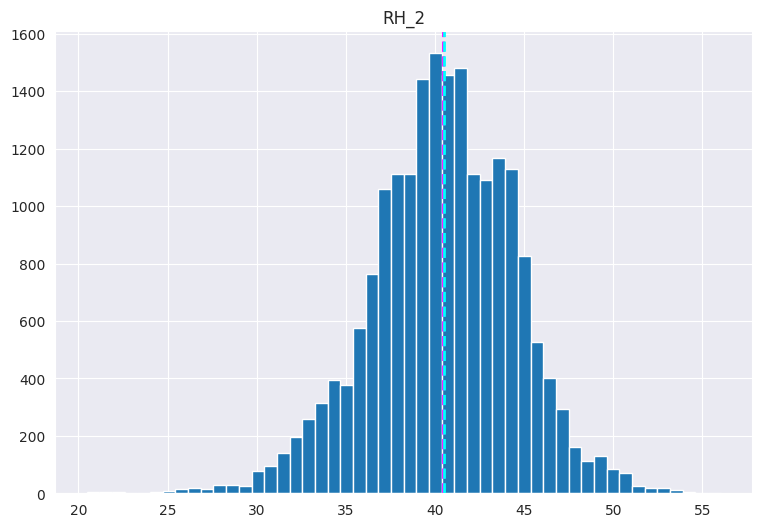

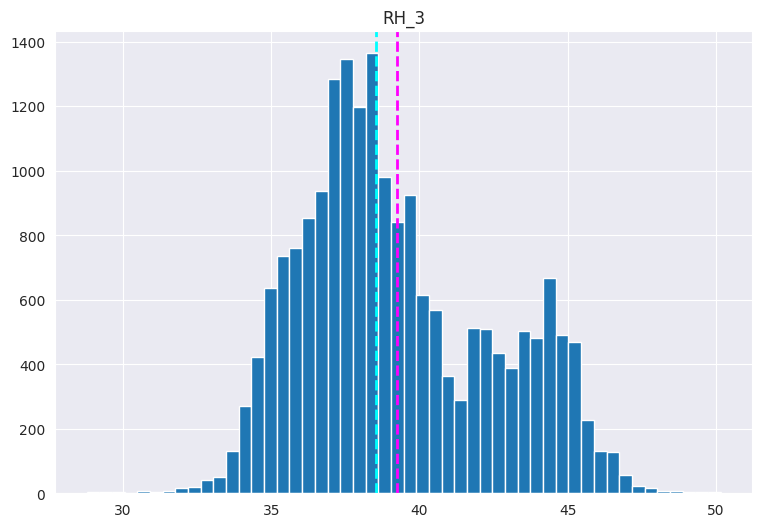

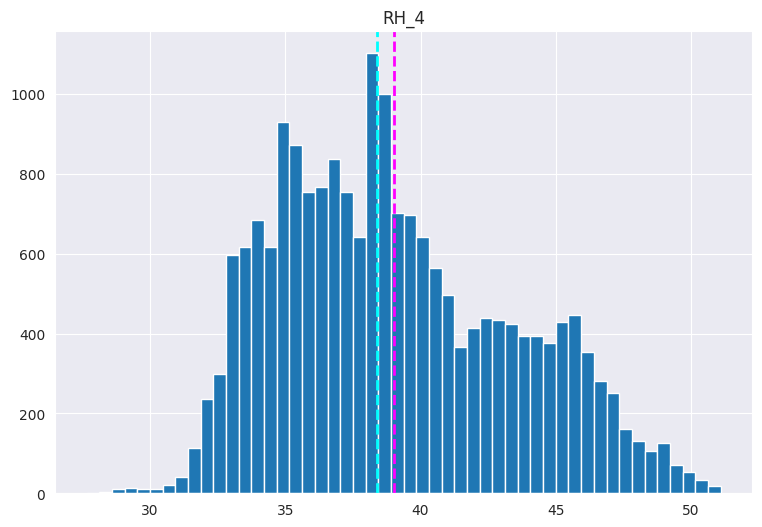

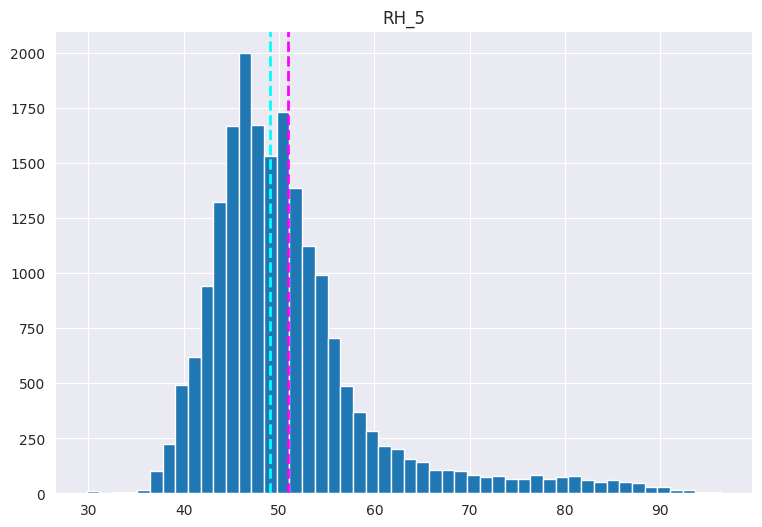

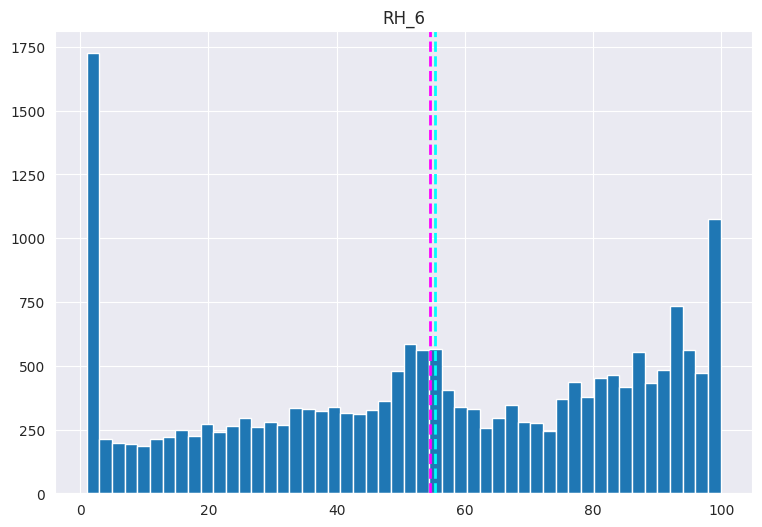

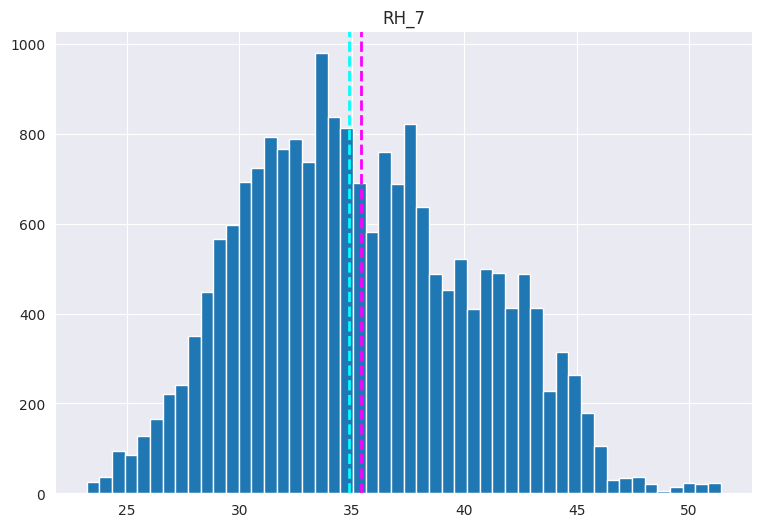

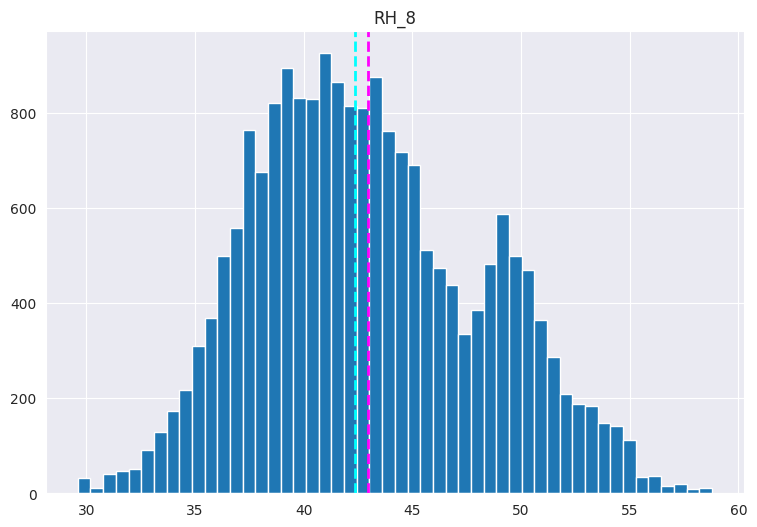

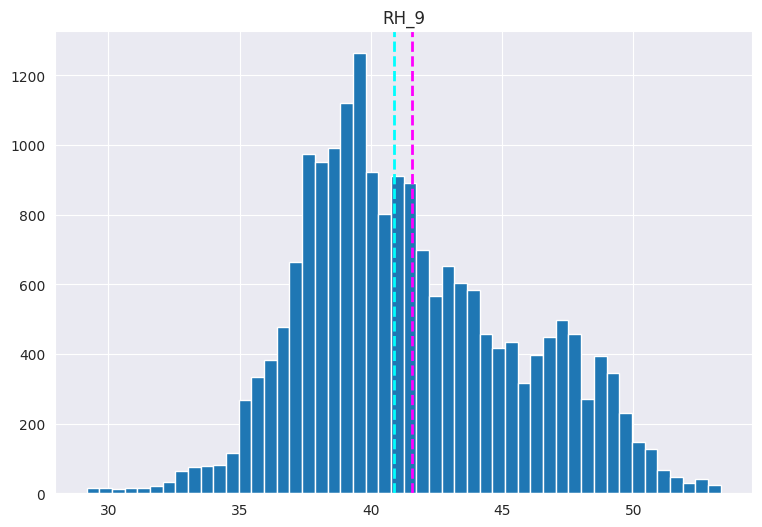

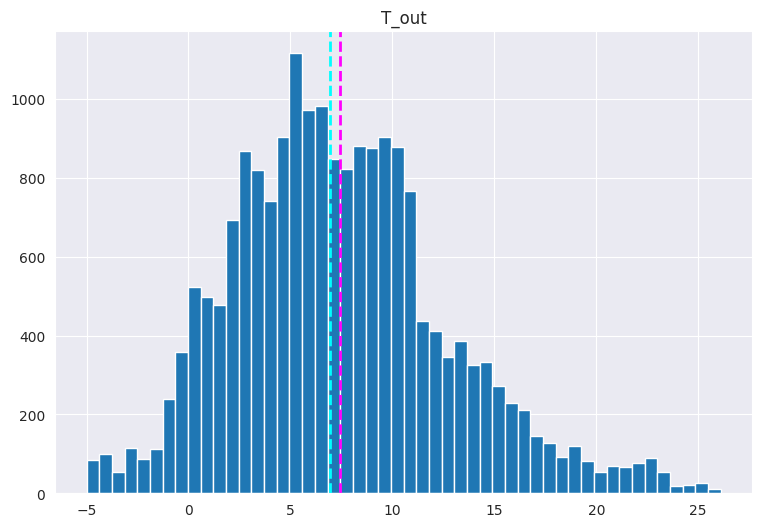

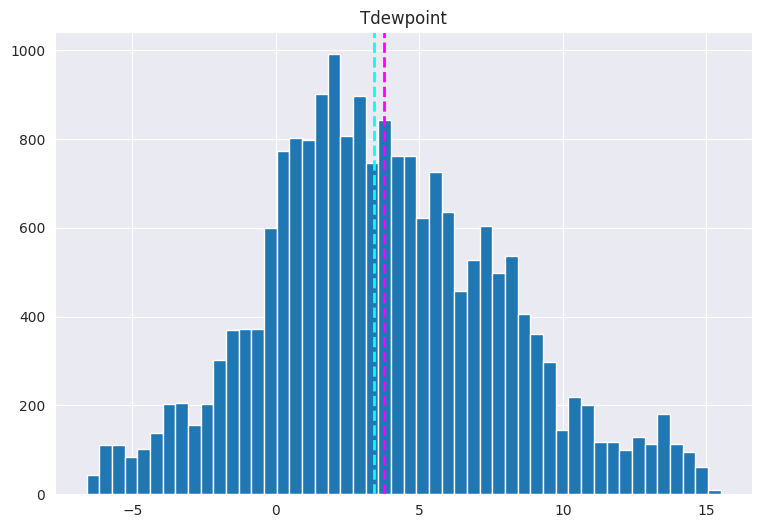

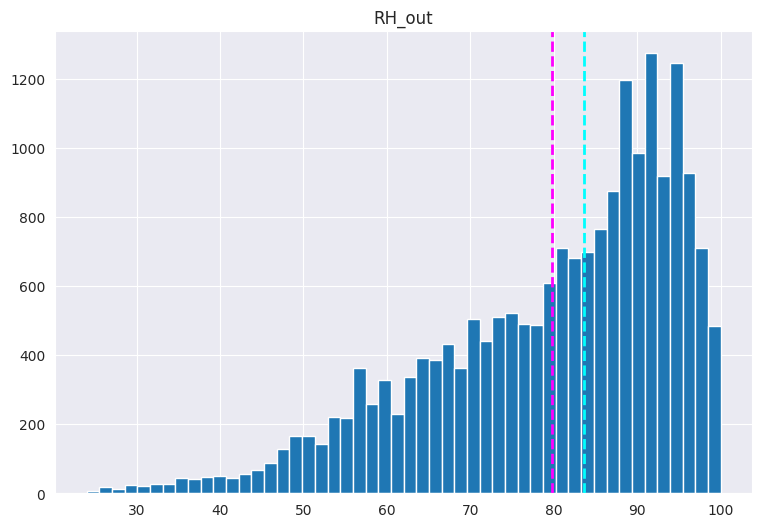

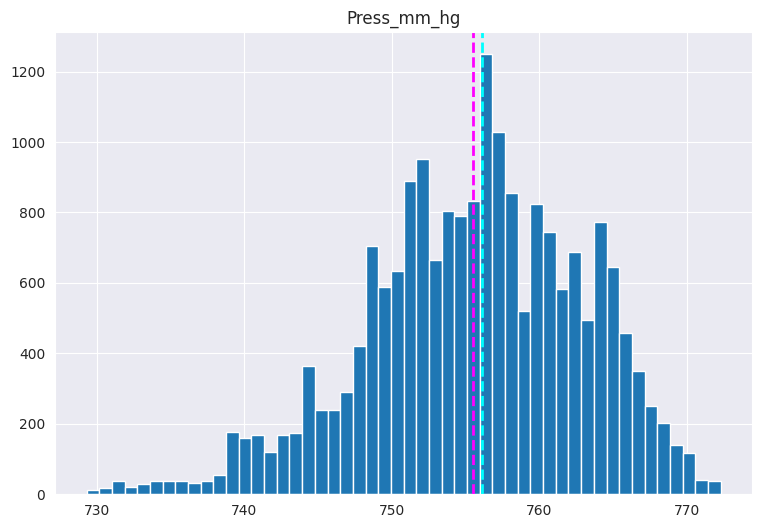

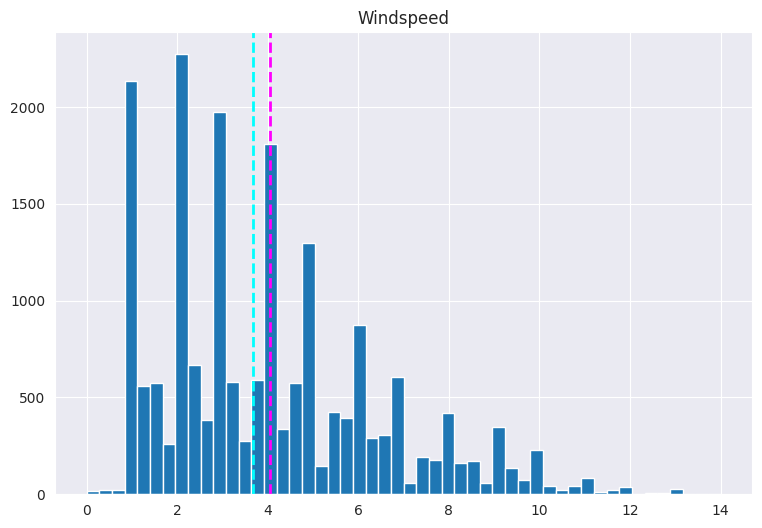

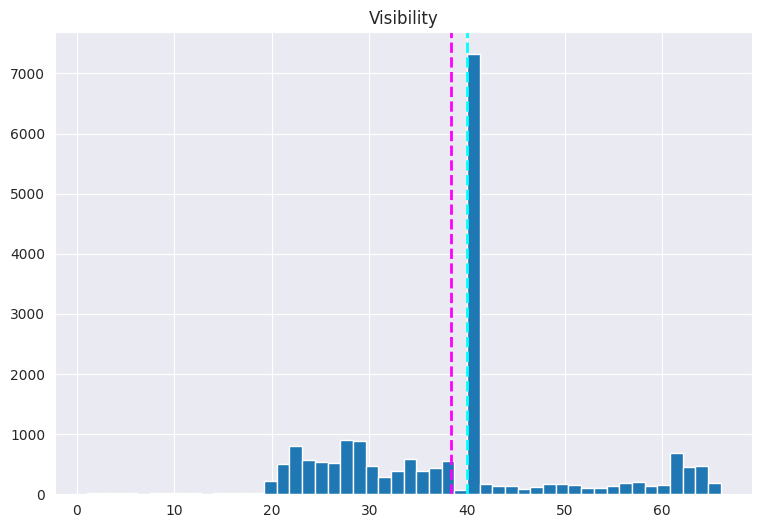

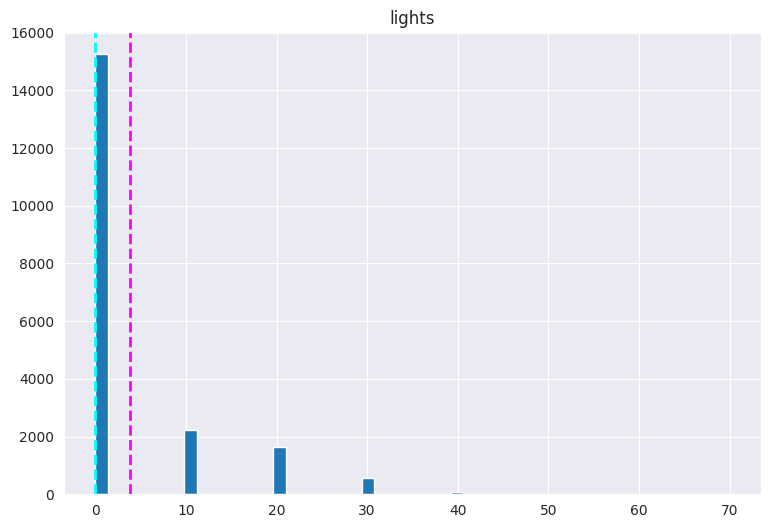

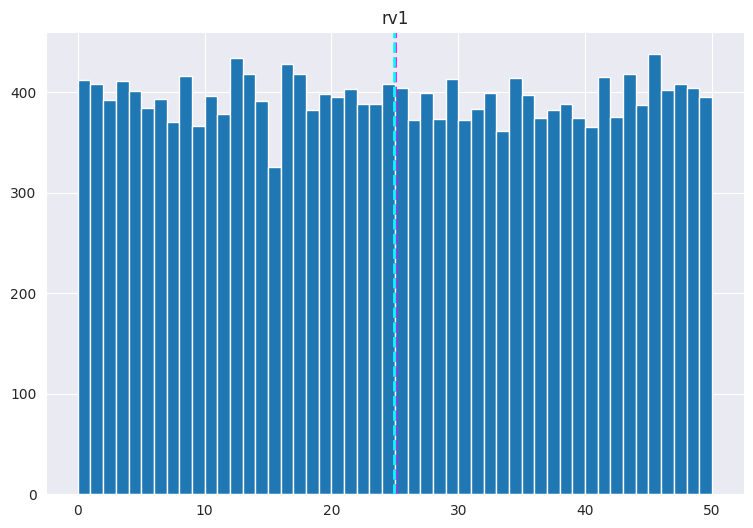

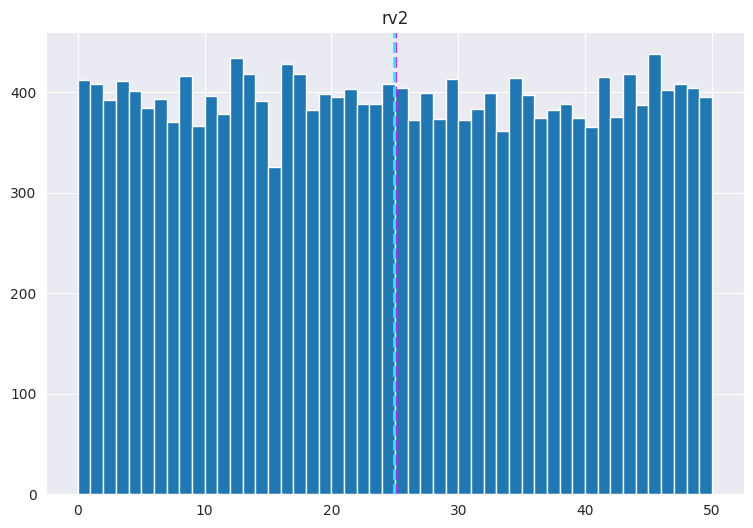

In [28]:
# visualization code for histogram of features.
for col in feature_vars:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_2[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are commonly used in statistics to demonstrate how many of a certain type of variable occur within a specific range.

##### 2. What is/are the insight(s) found from the chart?


1. All humidity values except RH_6 and RH_out follow a Normal distribution, i.e., all the readings from sensors inside the home are from a Normal distribution.

2. Similarly, all temperature readings follow a Normal distribution except for T9.

3. Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.

4. The random variables rv1 and rv2 have more or less the same values for all the recordings.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

While the presence of skewed variables and the distributional characteristics of certain columns may pose some challenges, the gained insights can still be valuable in improving equipment performance, optimizing energy usage, understanding customer behavior, and guiding data-driven decision-making. By leveraging these insights and applying appropriate data analysis techniques, businesses can strive to create a positive impact on operational efficiency, energy management, customer satisfaction, and overall business outcomes..

#### Chart -3 Distribution of values in Applainces column-

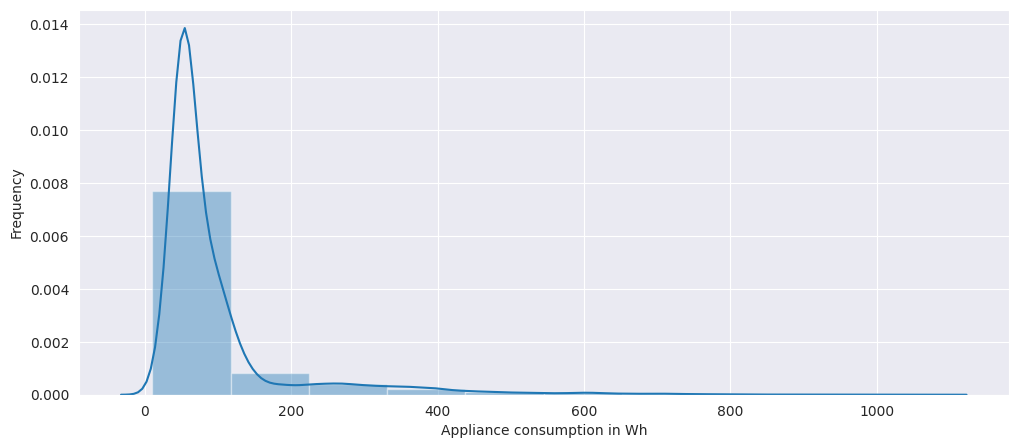

In [29]:

# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

##### 1. Why did you pick the specific chart?

Distribution plots are of crucial importance for exploratory data analysis. They help us detect outliers and skewness, or get an overview of the measures of central tendency (mean, median, and mode).

##### 2. What is/are the insight(s) found from the chart?

1. The output variable Appliances has most values less than 200Wh, showing that high energy consumption cases are very low.

2. No column has a distribution like the target variable Appliances.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 it indicates that high energy consumption cases are rare or infrequent in the dataset.The insights gained from analyzing the dataset may provide valuable information for creating a positive business impact.

  By focusing on energy efficiency, demand-side management, targeted marketing, and energy conservation initiatives, businesses can optimize their operations, reduce costs, enhance customer satisfaction, and contribute to sustainability goals.

#### Chart - 4 Correlation plot between Independent and dependent variable-

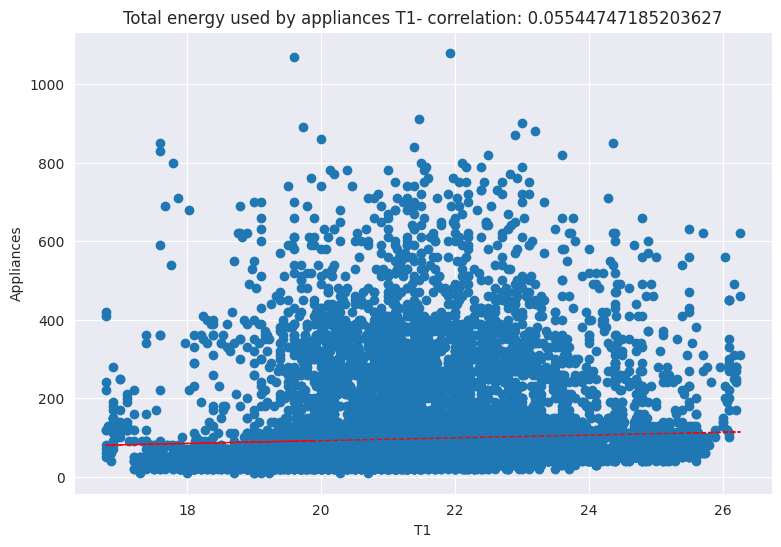

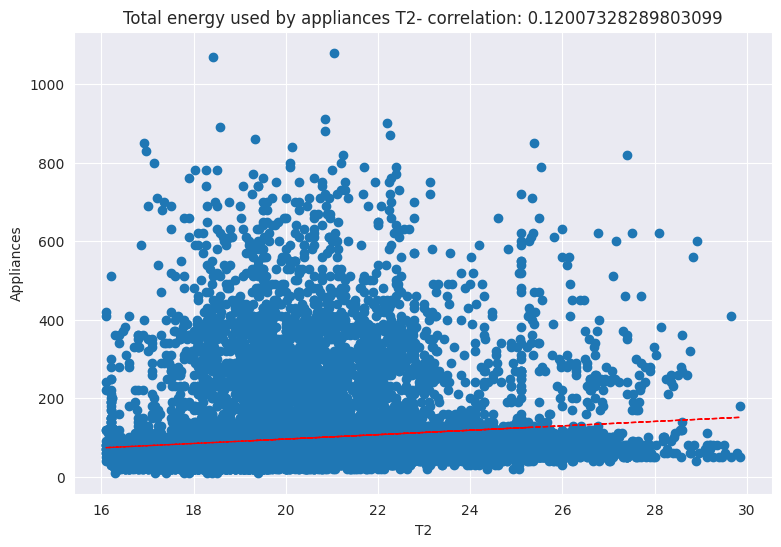

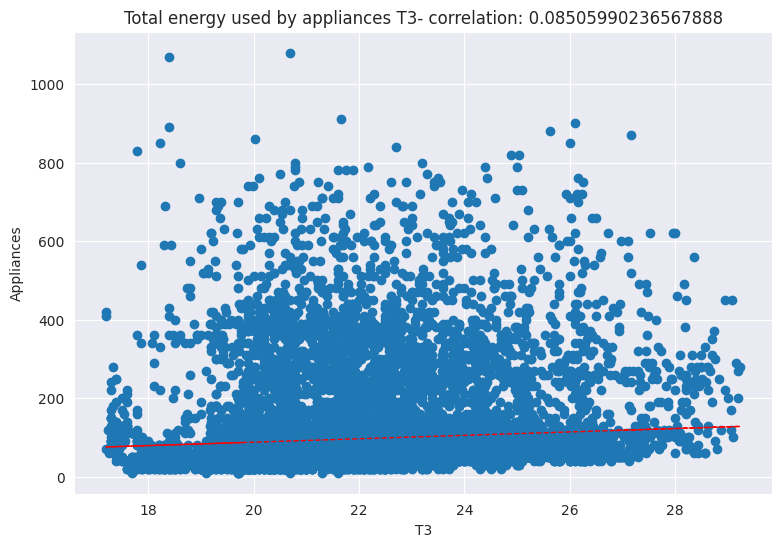

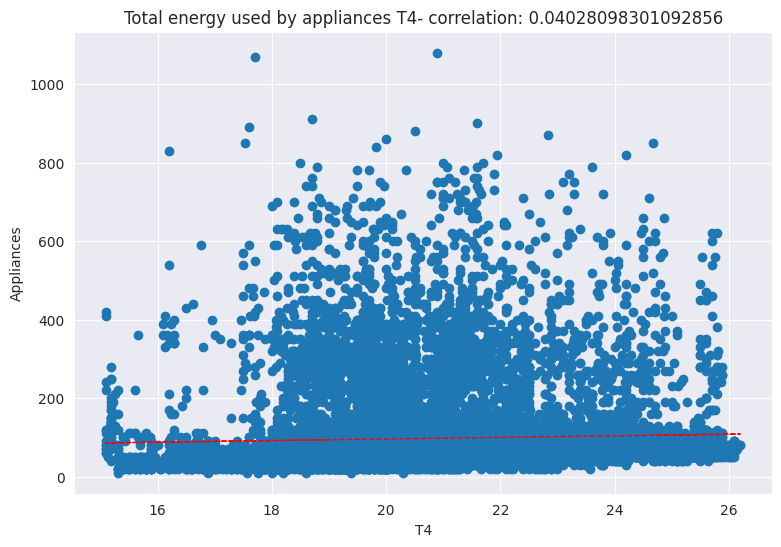

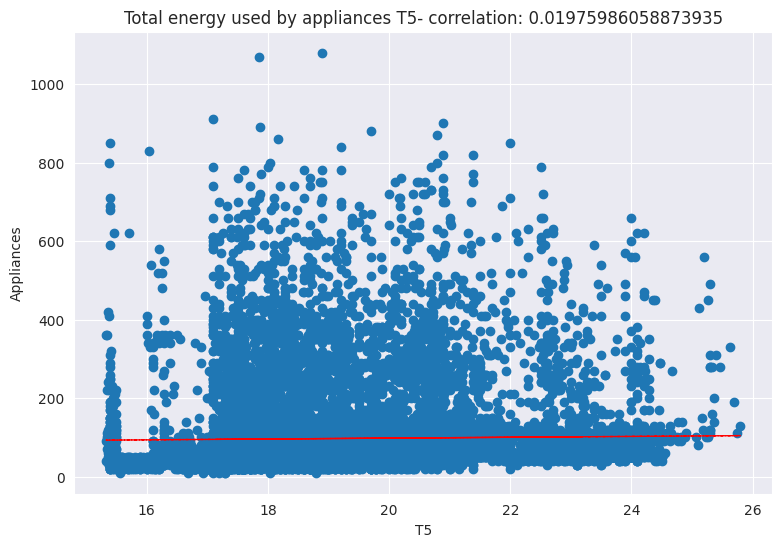

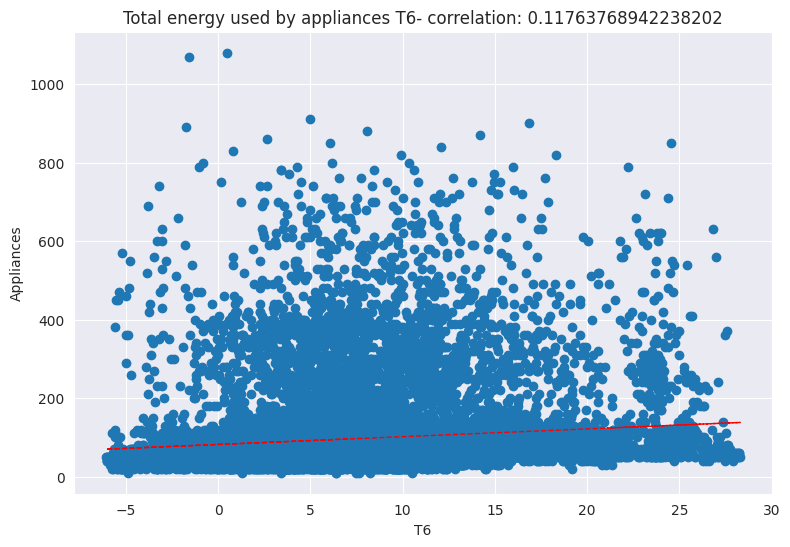

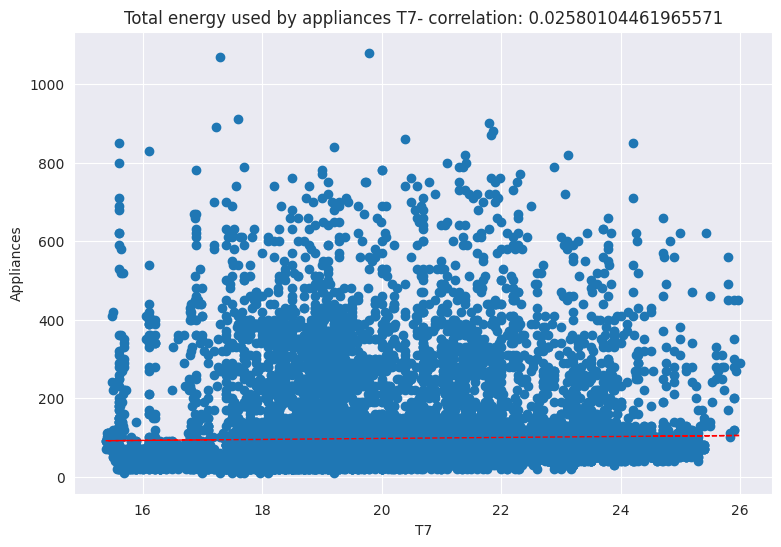

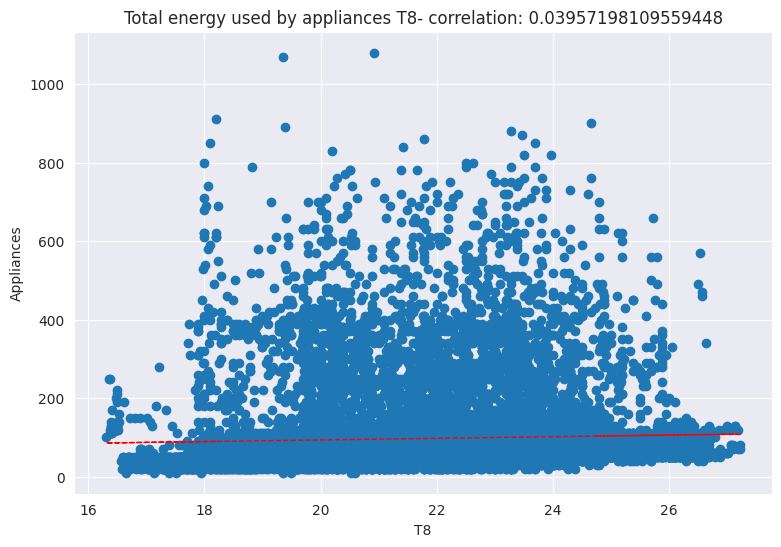

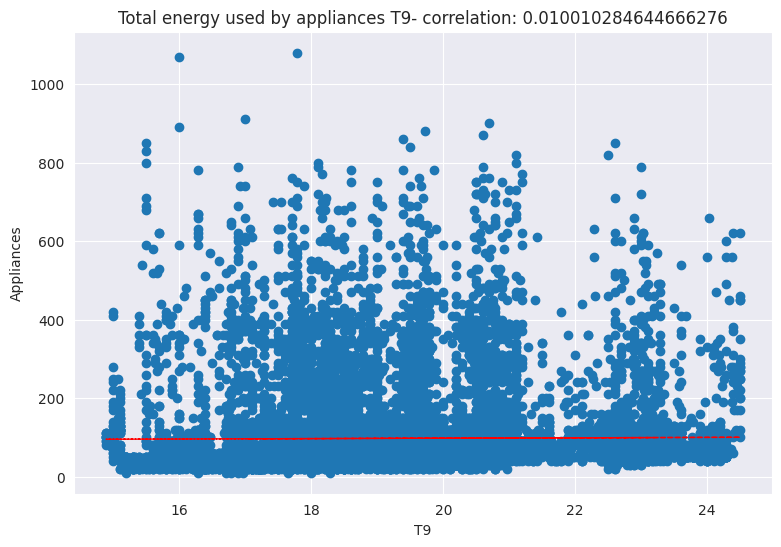

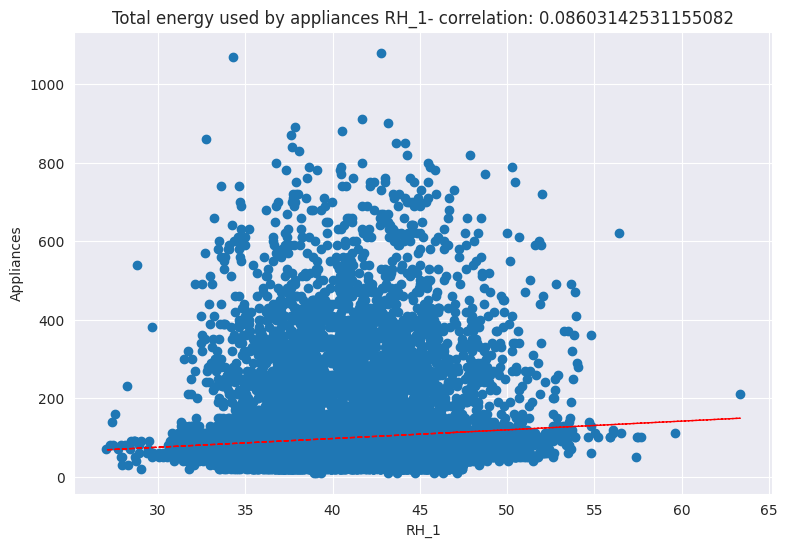

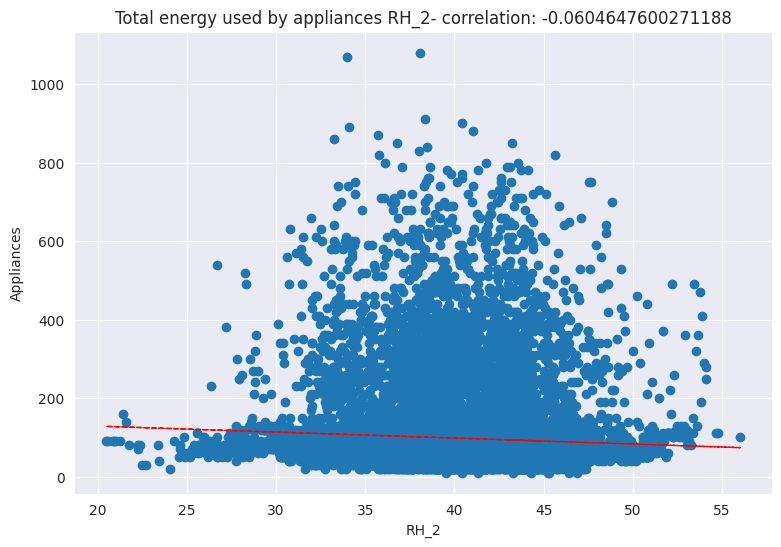

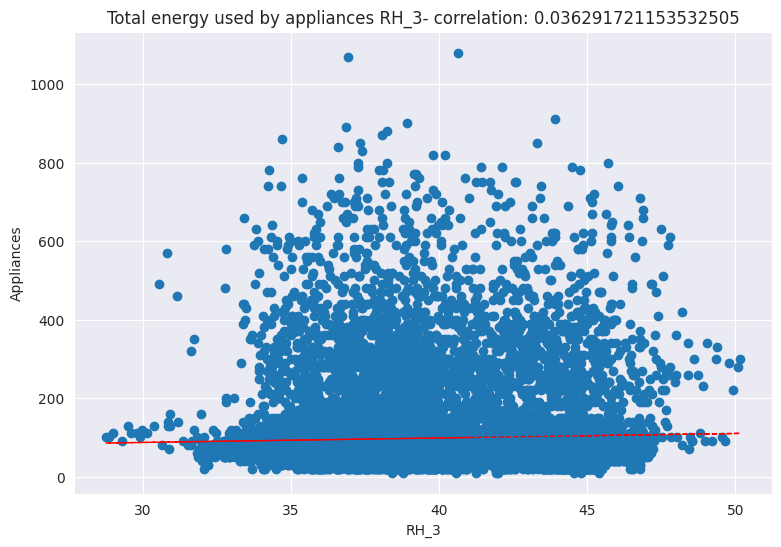

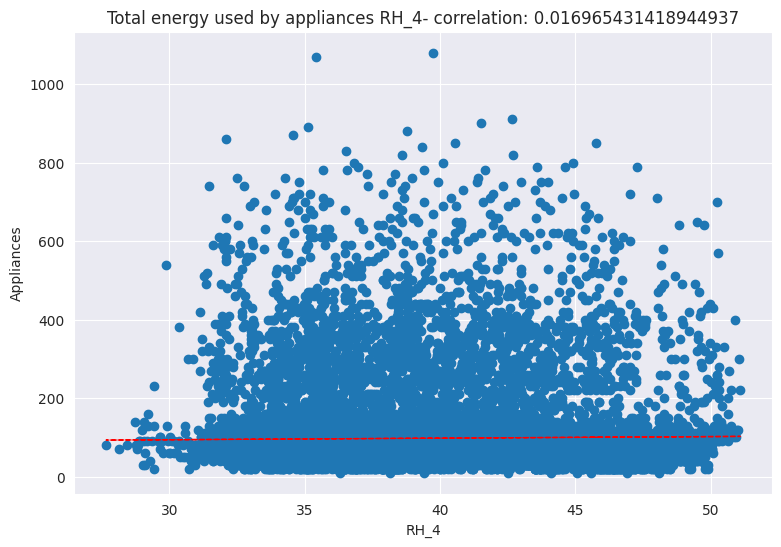

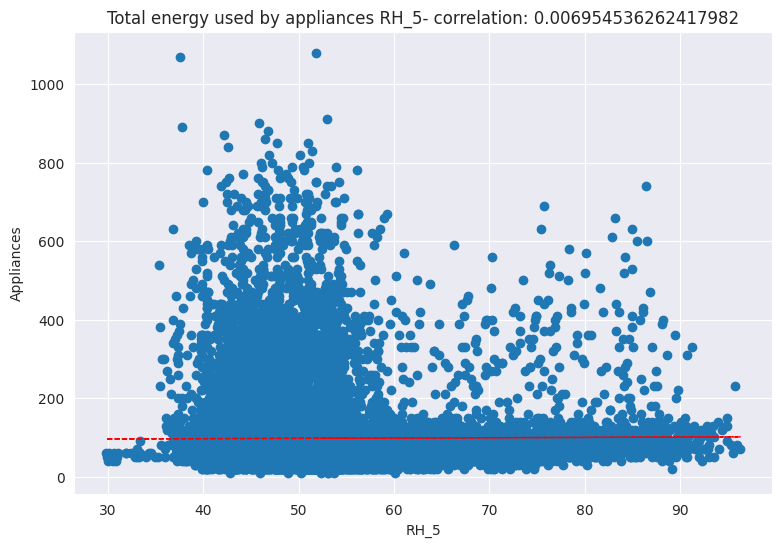

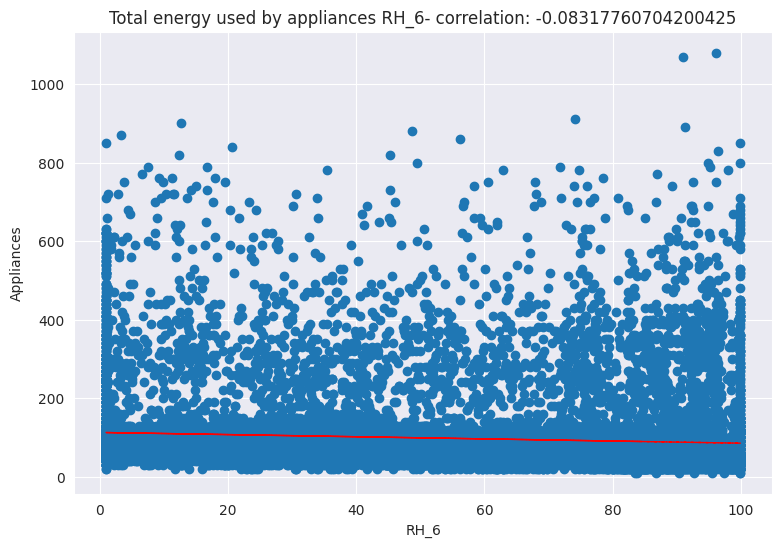

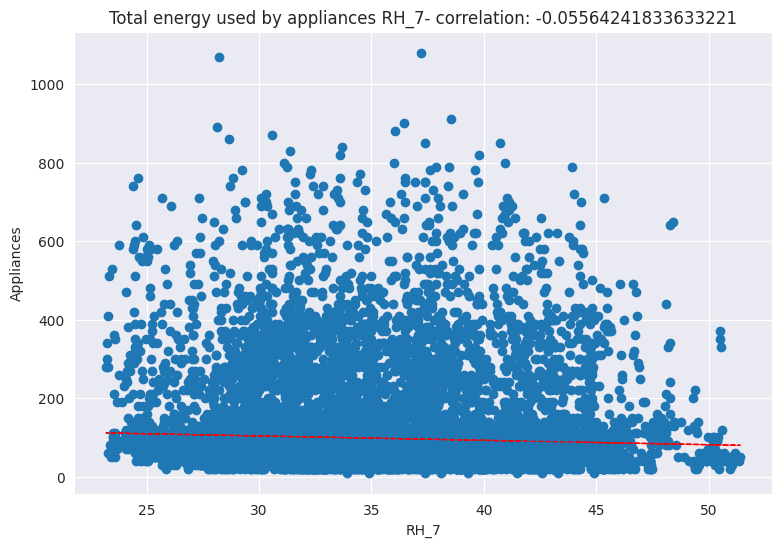

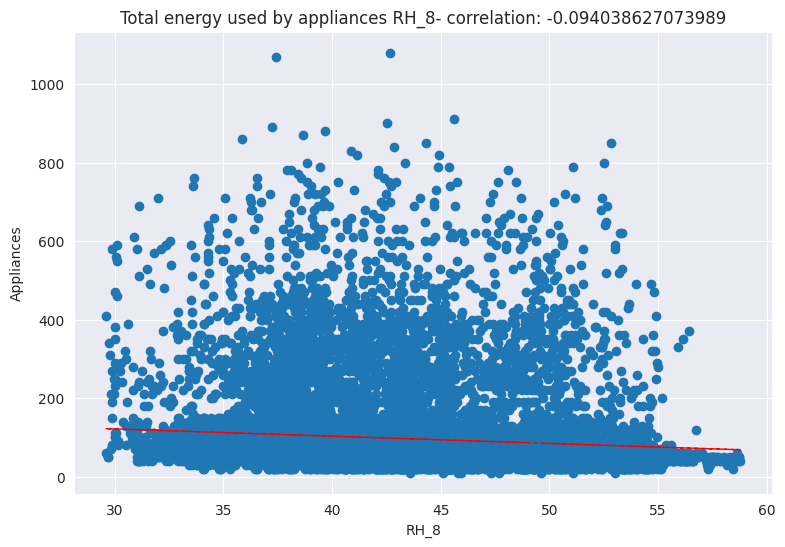

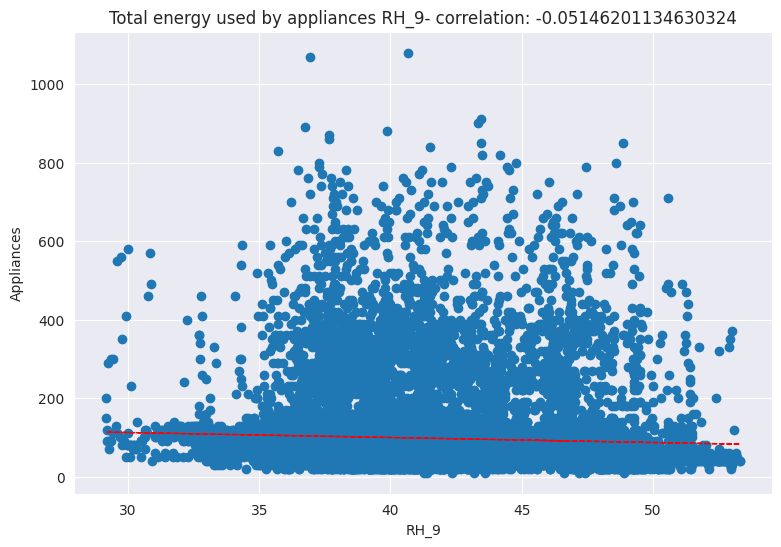

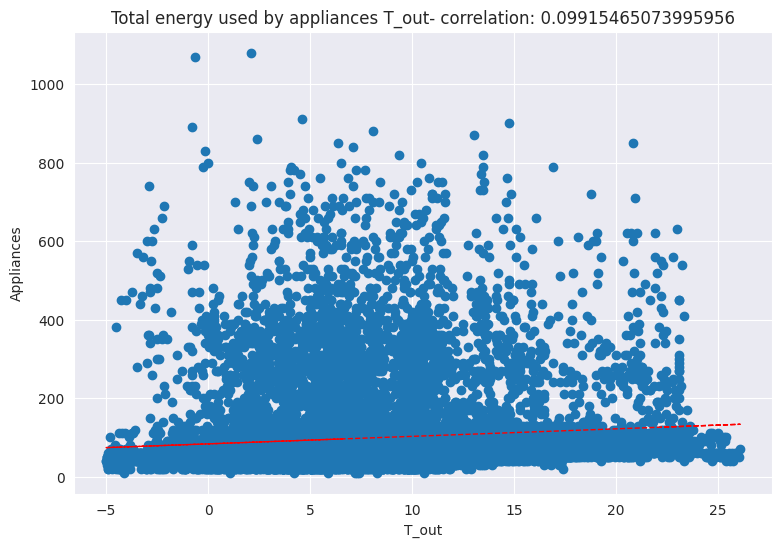

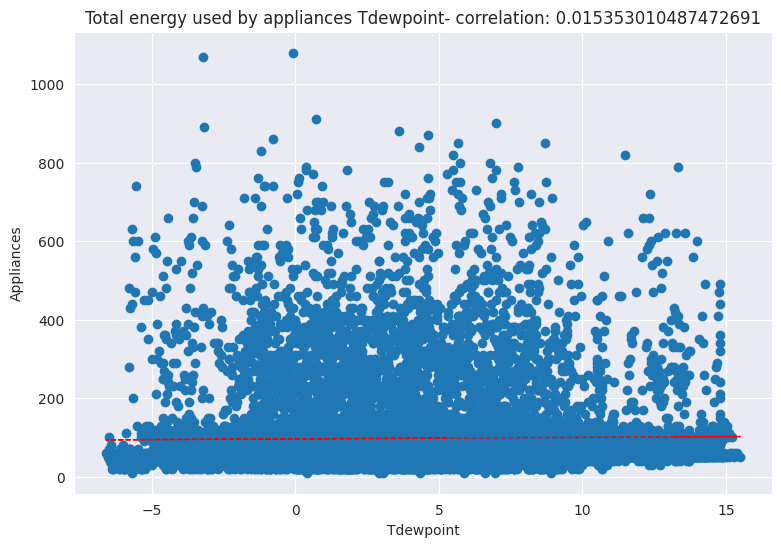

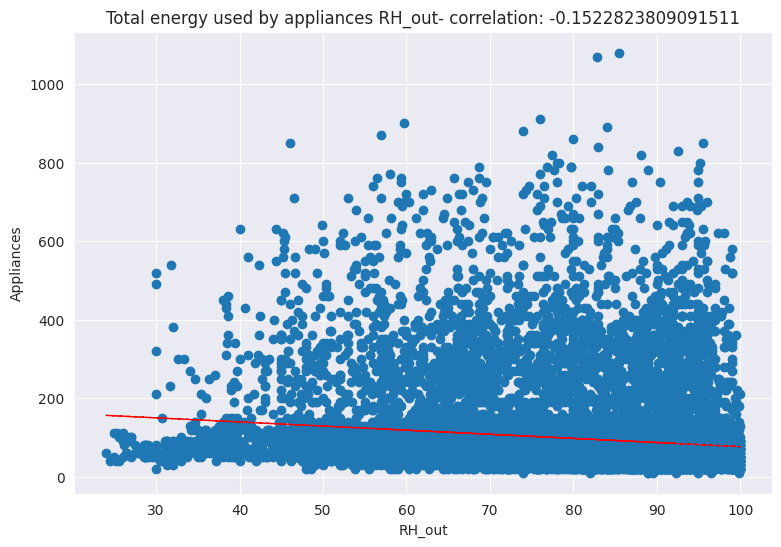

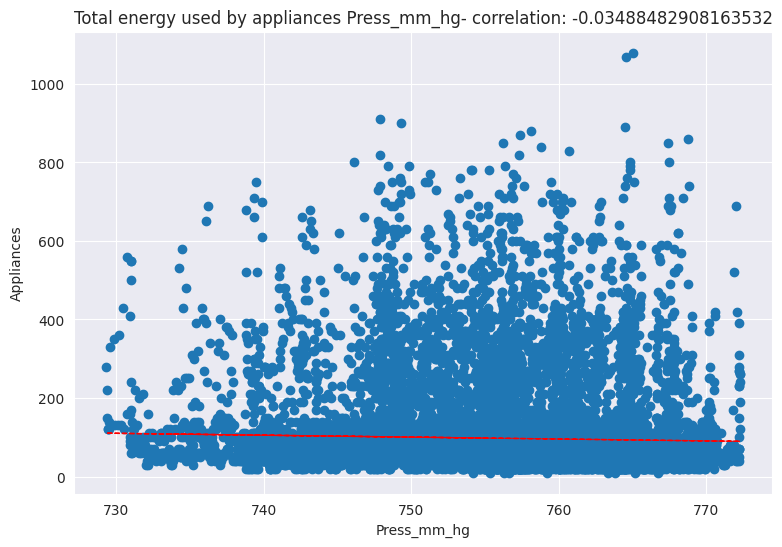

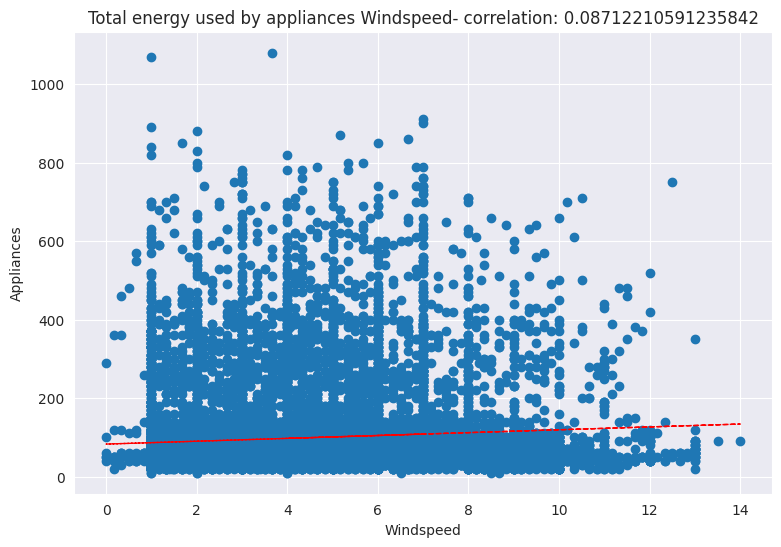

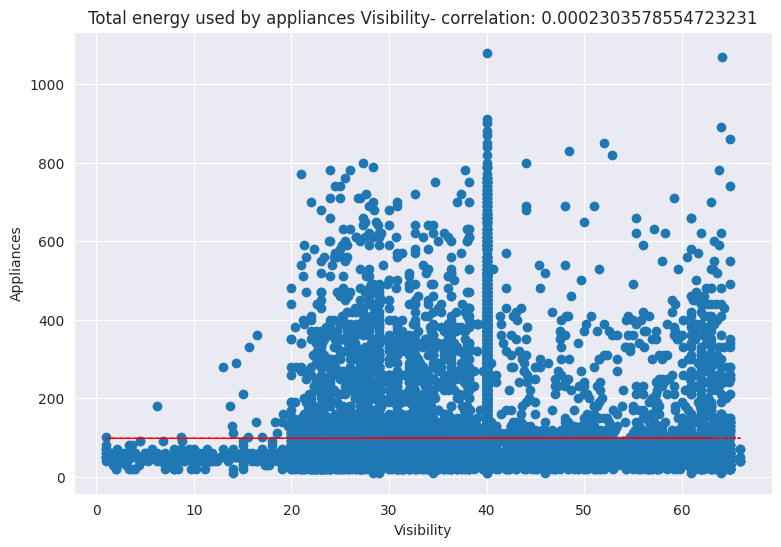

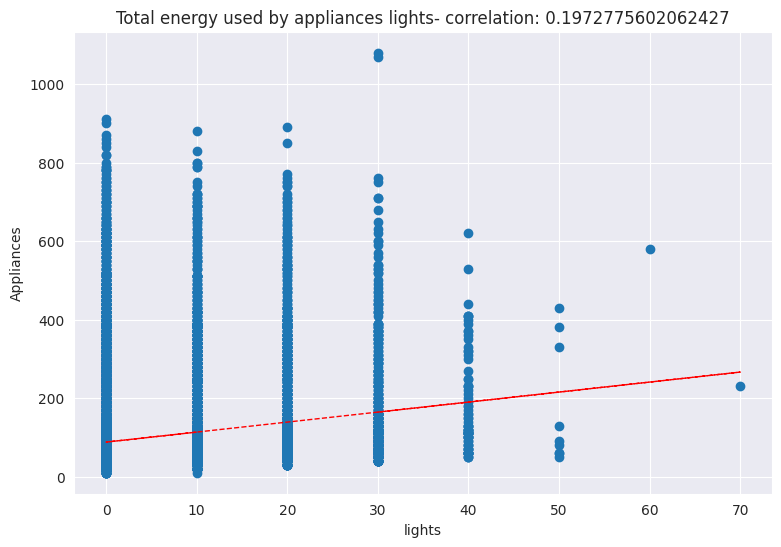

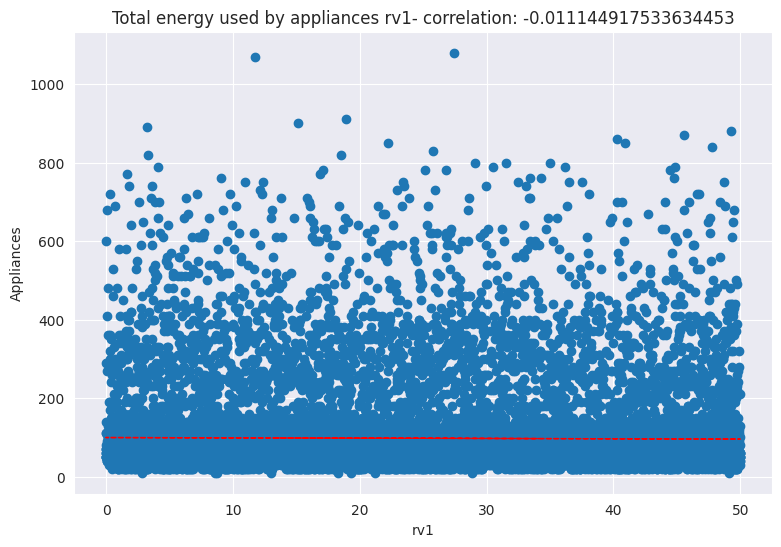

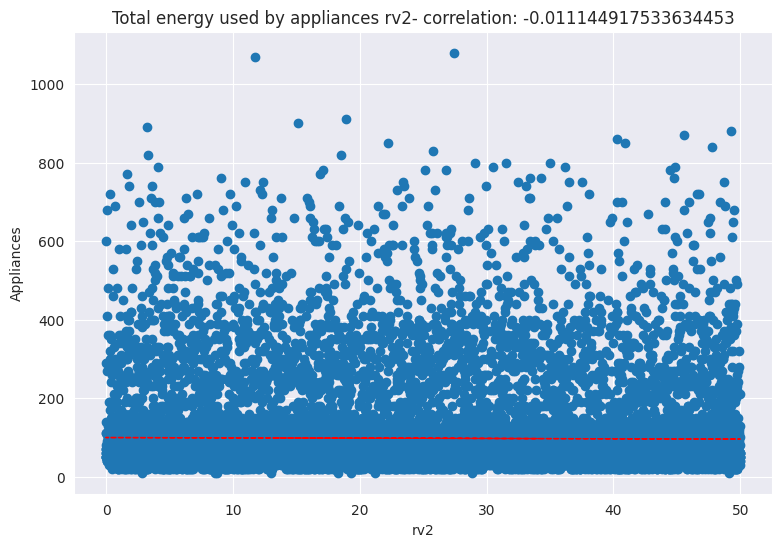

In [30]:
# Correlation plot between Independent and dependent variable-

for col in feature_vars:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df_2[col]
   label = df_2['Appliances']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Appliances')
   ax.set_title('Total energy used by appliances ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df_2[col], df_2['Appliances'], 1)
   y_hat = np.poly1d(z)(df_2[col])
 
   plt.plot(df_2[col], y_hat, "r--", lw=1)
 
plt.show()

##### 1. Why did you pick the specific chart?

A scatterplot displays the strength, direction, and form of the relationship between two quantitative variables.

 A correlation coefficient measures the strength of that relationship. 

##### 2. What is/are the insight(s) found from the chart?

There is no independent feature with a linear relationship with the target.If there is no independent feature with a linear relationship with the target variable, it means that there is no significant linear association between the predictor variable and the target.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 In this case, the insights gained from the analysis may not directly help in creating a positive business impact based on linear relationships.

#### Chart - 5 Correlation Heatmap-

             Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights         0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1             0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1           0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2             0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2          -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3             0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3           0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4             0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4           0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5             0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5           0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   

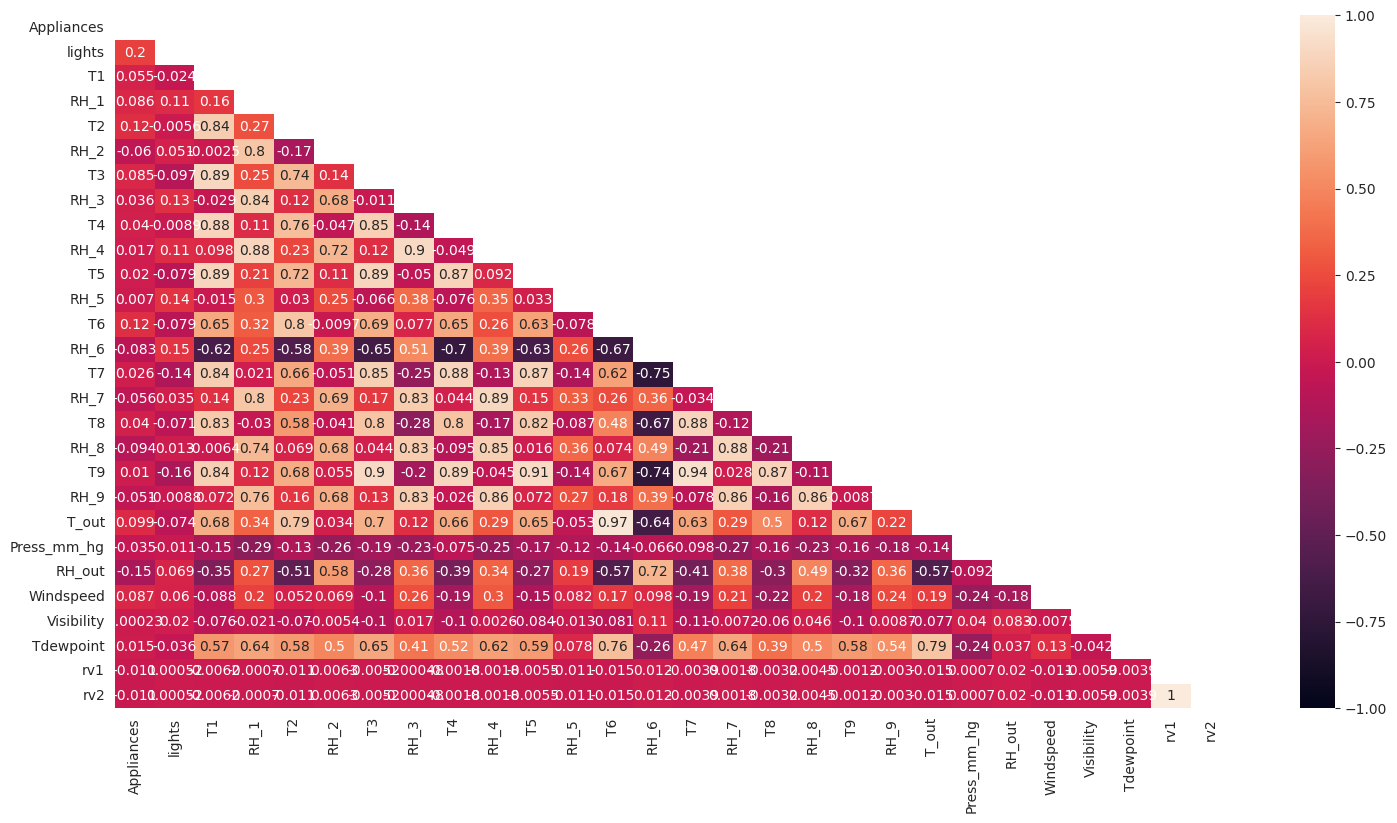

In [31]:
# Correlation Heatmap visualization code

corr = df_2.corr()
print(corr)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(18,9))
  ax = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot= True)

##### 1. Why did you pick the specific chart?

Heatmaps visualise data through variations in colouring. When applied to a tabular format, Heatmaps are useful for cross-examining multivariate data, through placing variables in the rows and columns and colouring the cells within the table. Heatmaps are good for showing variance across multiple variables, revealing any patterns, displaying whether any variables are similar to each other, and for detecting if any correlations exist.

Thus to know the correlation between all the variables along with tha correlation coeficients, we used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

1. Temperature — All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air temperature differences between rooms. Four columns have a high degree of correlation with T9 — T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

2. Weather attributes — Visibility, Tdewpoint, Press_mm_hg have low correlation values

3. Humidity — There are no significantly high correlation cases (> 0.9) for humidity sensors.

4. Random variables have no role to play

5. The random variables rv1, rv2 and Visibility, Tdewpoint, Press_mm_hg have low correlation with the target variable.

##### 1. Why did you pick the specific chart?

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
There is a significant relationship between the T6 : Temperature outside the building (north side) and appliance energy consumption.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis :** There is no significant relationship between T6 : Temperature outside the building (north side) and appliance energy consumption.

**Alternate Hypothesis :** There is a significant relationship  between T6 : Temperature outside the building (north side) and appliance energy consumption.

**Test Type :** The test used is a simple linear regression. It calculates the slope, intercept, correlation coefficient (r-value), p-value, and standard error using the stats.linregress function from the SciPy library.


#### 2. Perform an appropriate statistical test.

In [32]:

# Separate predictor variable and target variable
X = df_2['T6']  
y = df_2['Appliances']  

# Perform simple linear regression using the stats module
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Set significance level (alpha)
alpha = 0.05

# Perform statistical test
# Evaluate p-value
if p_value < alpha:
    # Reject the null hypothesis
    print("There is a significant relationship between the T6 : Temperature outside the building (north side) and appliance energy consumption.")
else:
    # Fail to reject the null hypothesis
    print("There is no significant relationship between the T6 : Temperature outside the building (north side) and appliance energy consumption.")


There is a significant relationship between the T6 : Temperature outside the building (north side) and appliance energy consumption.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is a t-test. Specifically, the function stats.linregress performs a t-test on the slope coefficient to determine its statistical significance.


































##### Why did you choose the specific statistical test?

In a simple linear regression, the t-test is commonly used to test the null hypothesis that the slope of the regression line is zero (indicating no relationship) against the alternative hypothesis that it is different from zero (indicating a significant relationship).

The resulting p-value from the t-test is then compared to the specified significance level (alpha) to make a decision about the null hypothesis. If the p-value is less than alpha, the null hypothesis is rejected, suggesting a significant relationship. Conversely, if the p-value is greater than or equal to alpha, the null hypothesis is not rejected, indicating no significant relationship.

Therefore, a t-test is used to obtain the p-value for testing the significance of the relationship between the T6 : Temperature outside the building (north side) and appliance energy consumption in a simple linear regression context.

### Hypothetical Statement - 2
There is a significant relationship between the Wind speed: (from Chievres weather station) and appliance energy consumption.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis :** There is no significant relationship between Wind speed: (from Chievres weather station) and appliance energy consumption.

**Alternate Hypothesis :** There is a significant relationship between Wind speed: (from Chievres weather station) and appliance energy consumption.

**Test Type :** The test used is a simple linear regression. It calculates the slope, intercept, correlation coefficient (r-value), p-value, and standard error using the stats.linregress function from the SciPy library.



#### 2. Perform an appropriate statistical test.

In [33]:
# Separate predictor variable and target variable
X = df_2['Windspeed'] 
y = df_2['Appliances']  

# Perform simple linear regression using the stats module
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Set significance level (alpha)
alpha = 0.05

# Perform statistical test
# Evaluate p-value
if p_value < alpha:
    # Reject the null hypothesis
    print("There is a significant relationship between the Wind speed: (from Chievres weather station) and appliance energy consumption.")
else:
    # Fail to reject the null hypothesis
    print("There is no significant relationship between the Wind speed: (from Chievres weather station) and appliance energy consumption.")


There is a significant relationship between the Wind speed: (from Chievres weather station) and appliance energy consumption.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is a t-test. Specifically, the function stats.linregress performs a t-test on the slope coefficient to determine its statistical significance.

##### Why did you choose the specific statistical test?

In a simple linear regression, the t-test is commonly used to test the null hypothesis that the slope of the regression line is zero (indicating no relationship) against the alternative hypothesis that it is different from zero (indicating a significant relationship).

The resulting p-value from the t-test is then compared to the specified significance level (alpha) to make a decision about the null hypothesis. If the p-value is less than alpha, the null hypothesis is rejected, suggesting a significant relationship. Conversely, if the p-value is greater than or equal to alpha, the null hypothesis is not rejected, indicating no significant relationship.

Therefore, a t-test is used to obtain the p-value for testing the significance of the relationship between the Wind speed: (from Chievres weather station) and appliance energy consumption in a simple linear regression context.

### Hypothetical Statement - 3
There is a significant relationship between the RH_1 : Humidity in kitchen area and appliance energy consumption.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis :** There is no significant relationship between RH_1 : Humidity in kitchen area and appliance energy consumption.

**Alternate Hypothesis :** There is a significant relationship between RH_1 : Humidity in kitchen area and appliance energy consumption.

**Test Type :** The test used is a simple linear regression. It calculates the slope, intercept, correlation coefficient (r-value), p-value, and standard error using the stats.linregress function from the SciPy library.

#### 2. Perform an appropriate statistical test.

In [34]:
# Separate predictor variable and target variable
X = df_2['RH_1']  # Update with actual column name of predictor variable
y = df_2['Appliances']  # Update with actual column name of target variable

# Perform simple linear regression using the stats module
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Set significance level (alpha)
alpha = 0.05

# Perform statistical test
# Evaluate p-value
if p_value < alpha:
    # Reject the null hypothesis
    print("There is a significant relationship between the RH_1 : Humidity in kitchen area and appliance energy consumption.")
else:
    # Fail to reject the null hypothesis
    print("There is no significant relationship between the RH_1 : Humidity in kitchen area and appliance energy consumption.")

There is a significant relationship between the RH_1 : Humidity in kitchen area and appliance energy consumption.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is a t-test. Specifically, the function stats.linregress performs a t-test on the slope coefficient to determine its statistical significance.

##### Why did you choose the specific statistical test?

In a simple linear regression, the t-test is commonly used to test the null hypothesis that the slope of the regression line is zero (indicating no relationship) against the alternative hypothesis that it is different from zero (indicating a significant relationship).

The resulting p-value from the t-test is then compared to the specified significance level (alpha) to make a decision about the null hypothesis. If the p-value is less than alpha, the null hypothesis is rejected, suggesting a significant relationship. Conversely, if the p-value is greater than or equal to alpha, the null hypothesis is not rejected, indicating no significant relationship.

Therefore, a t-test is used to obtain the p-value for testing the significance of the relationship between the RH_1 : Humidity in kitchen area and appliance energy consumption in a simple linear regression context.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
df_2.isnull().sum()


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<Axes: >

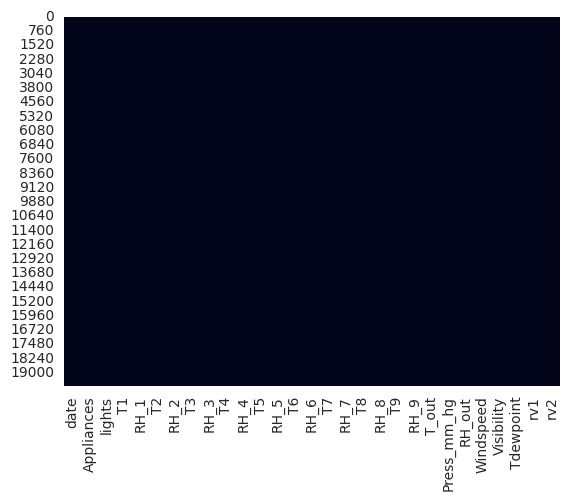

In [36]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df_2.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing value present in dataset.

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_2.describe().columns:
  if abs(df_2[i].mean()-df_2[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)



Symmetric Distributed Features : - ['T1', 'RH_2', 'T3', 'T4', 'T8', 'T9', 'rv1', 'rv2']
Skew Symmetric Distributed Features : - ['Appliances', 'lights', 'RH_1', 'T2', 'RH_3', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']


In [38]:
# For Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
  upper_boundary= df_2[feature].mean()+3*df_2[feature].std()
  lower_boundary= df_2[feature].mean()-3*df_2[feature].std()
  return upper_boundary,lower_boundary

In [39]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
  df_2.loc[df_2[feature]<= outlier_treatment(df=df_2,feature=feature)[1], feature]=outlier_treatment(df=df_2,feature=feature)[1]
  df_2.loc[df_2[feature]>= outlier_treatment(df=df_2,feature=feature)[0], feature]=outlier_treatment(df=df_2,feature=feature)[0]

In [40]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df_2[feature].quantile(0.75)- df_2[feature].quantile(0.25)
  lower_bridge =df_2[feature].quantile(0.25)-3*IQR
  upper_bridge =df_2[feature].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [41]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df_2.loc[df_2[feature]<= outlier_treatment_skew(df=df_2,feature=feature)[1], feature]=outlier_treatment_skew(df=df_2,feature=feature)[1]
  df_2.loc[df_2[feature]>= outlier_treatment_skew(df=df_2,feature=feature)[0], feature]=outlier_treatment_skew(df=df_2,feature=feature)[0]

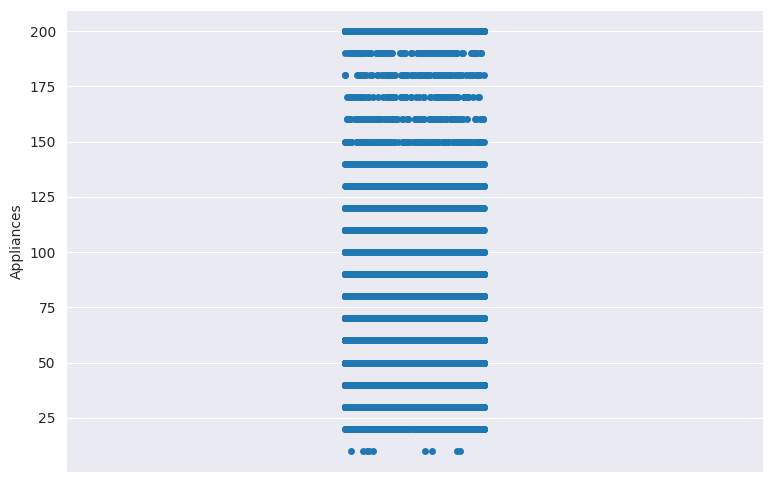

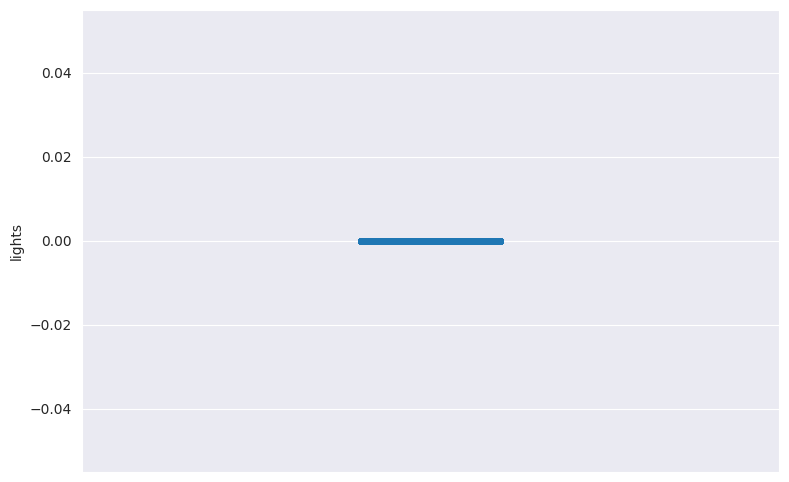

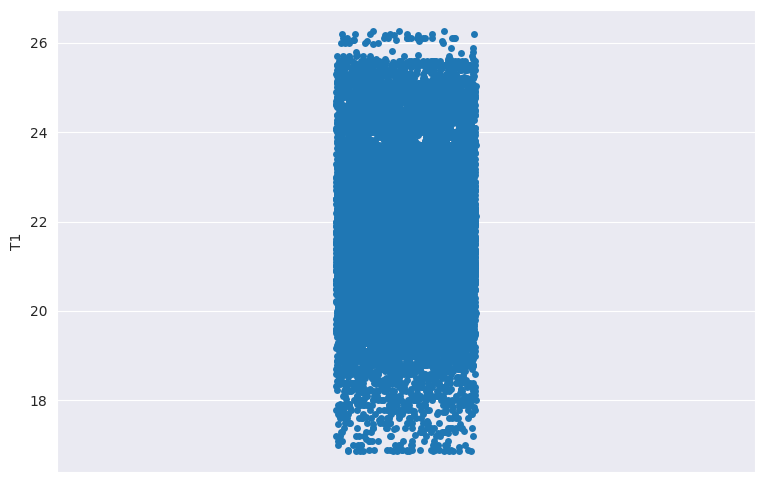

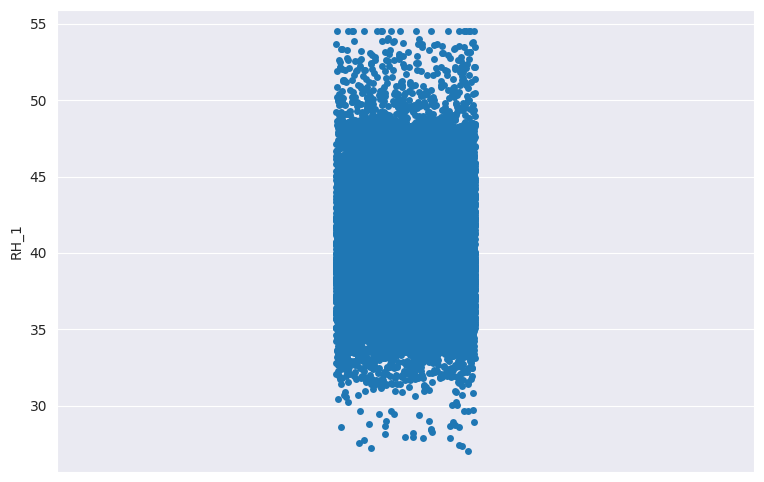

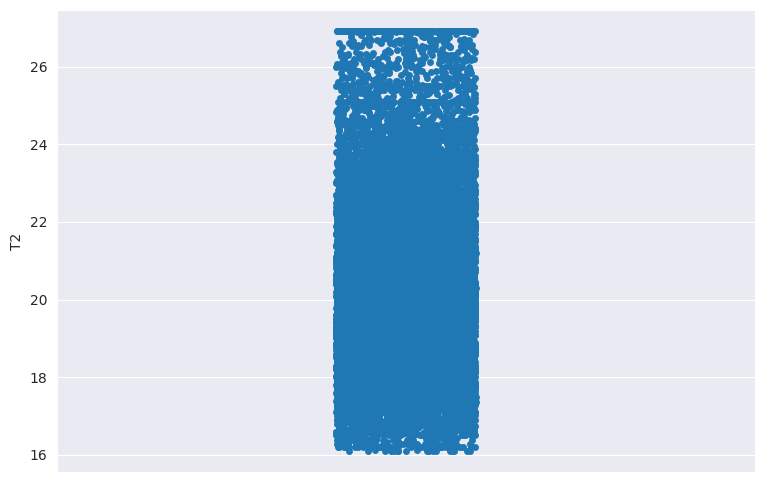

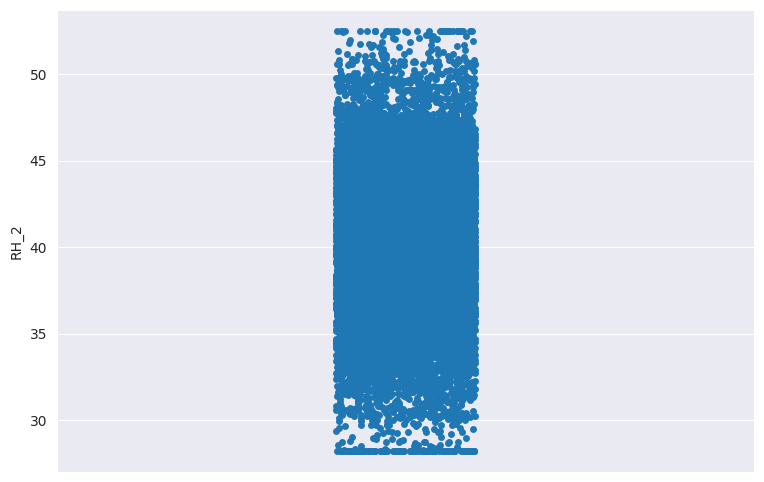

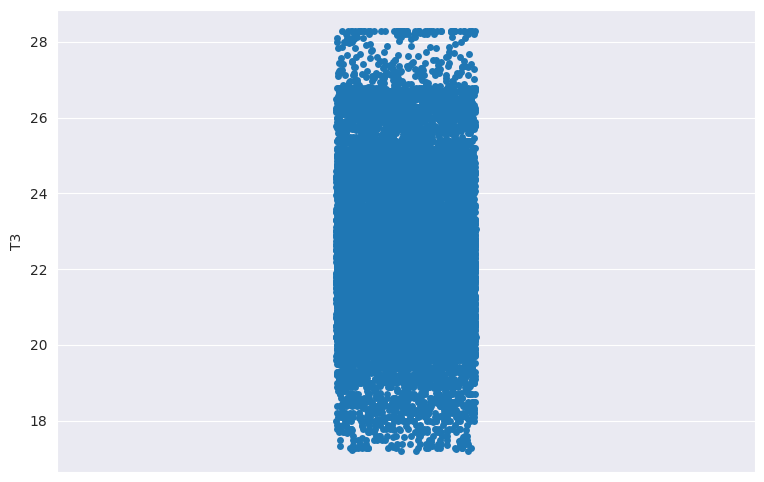

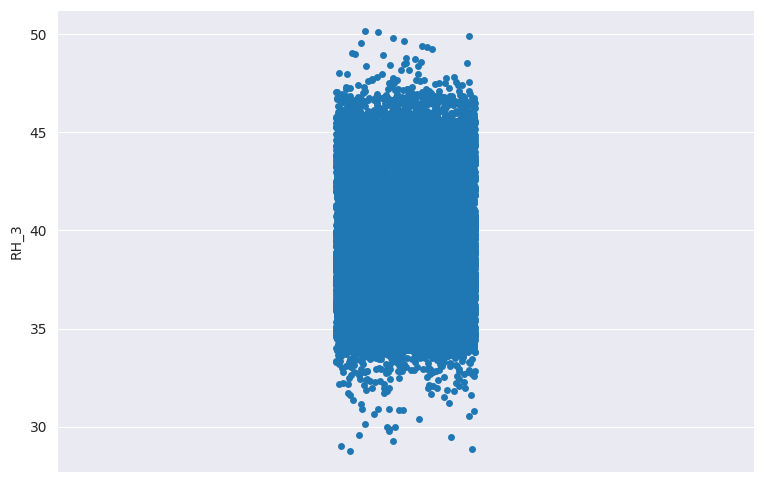

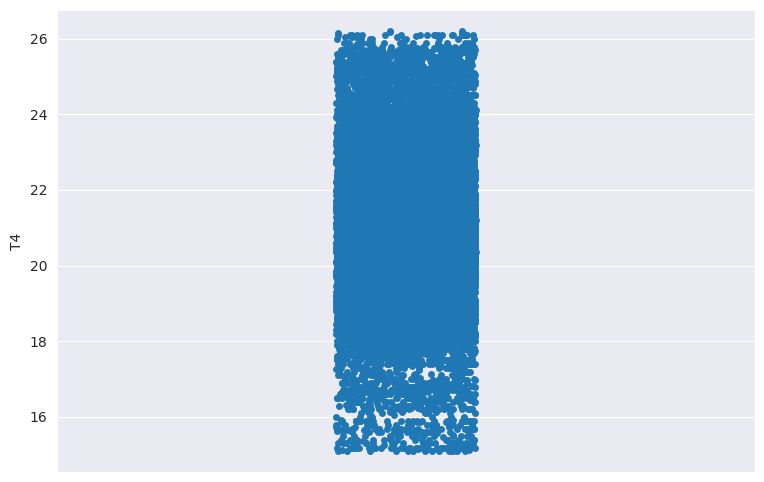

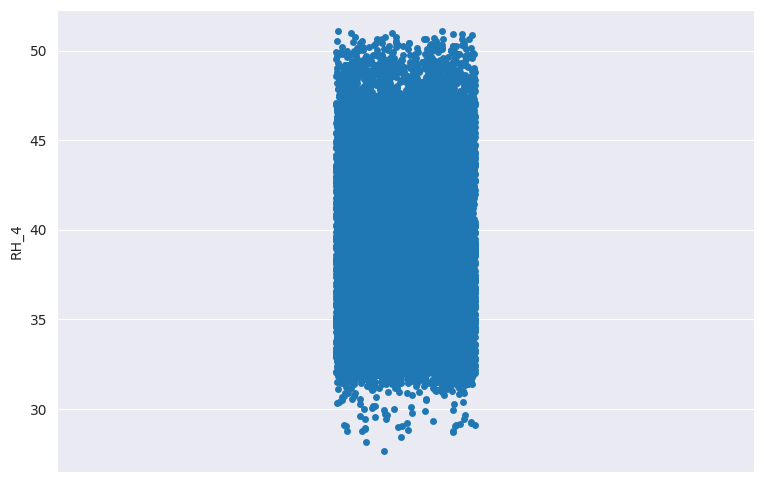

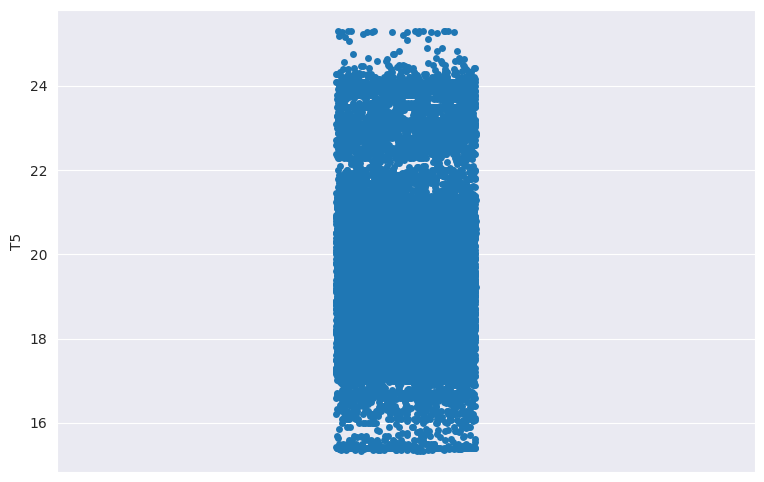

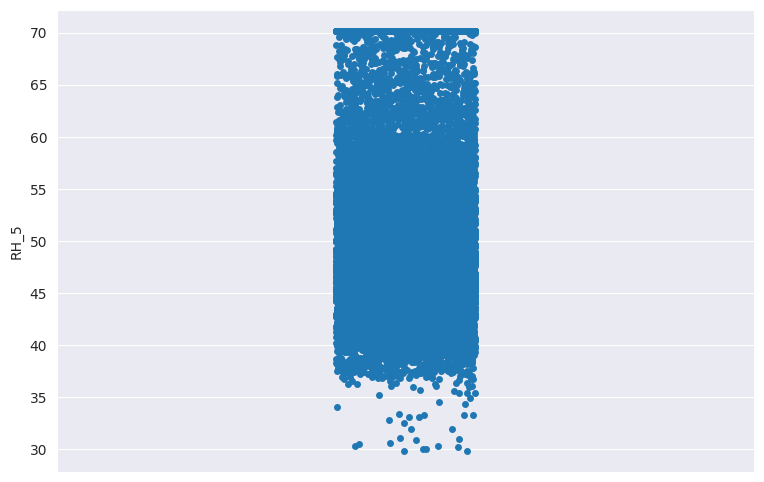

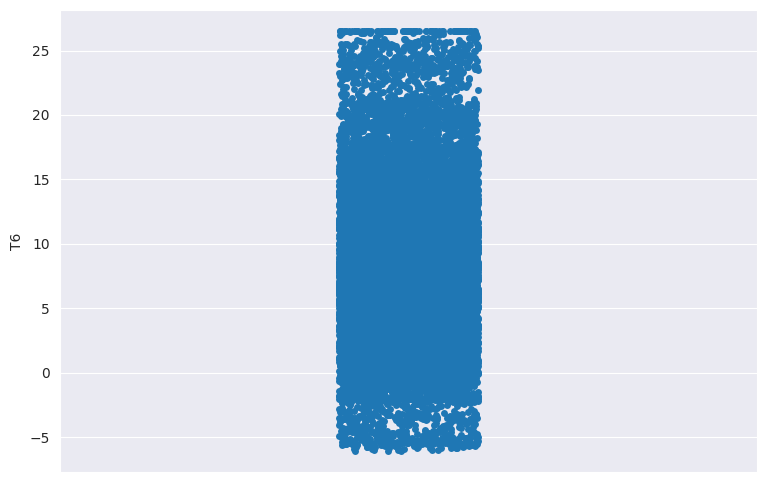

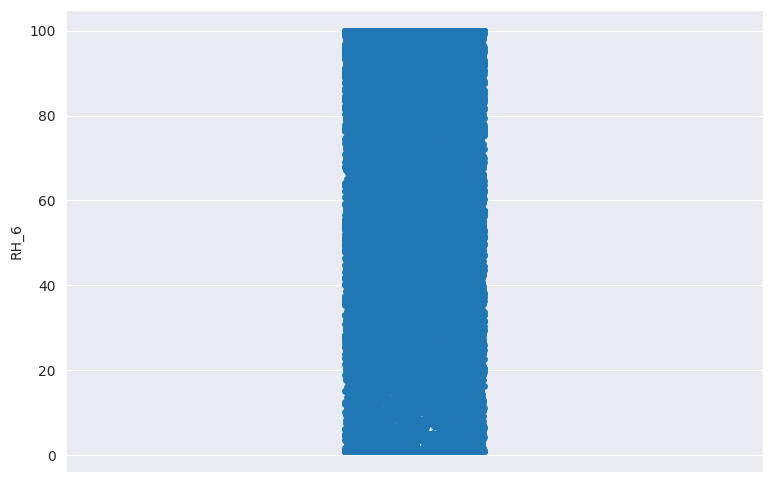

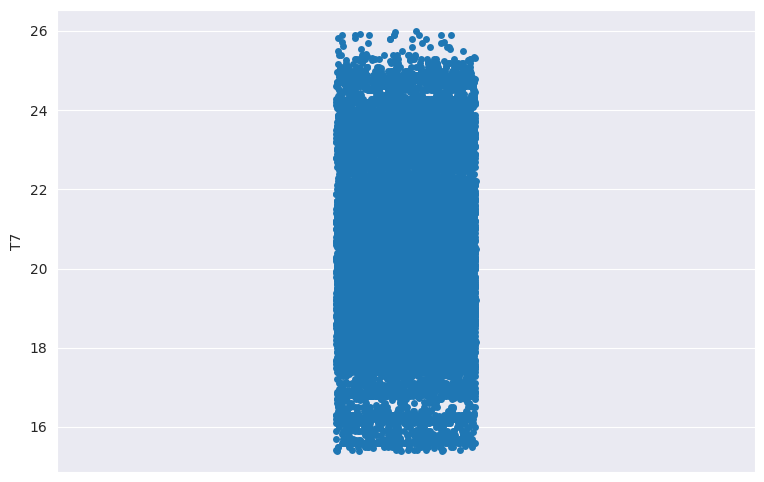

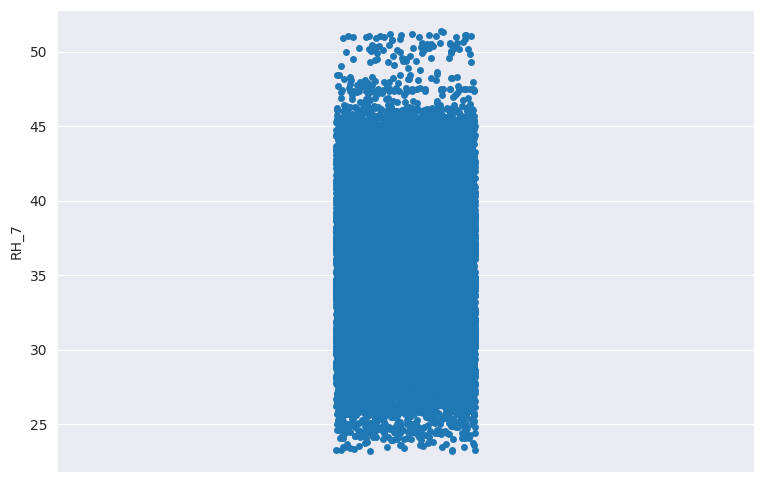

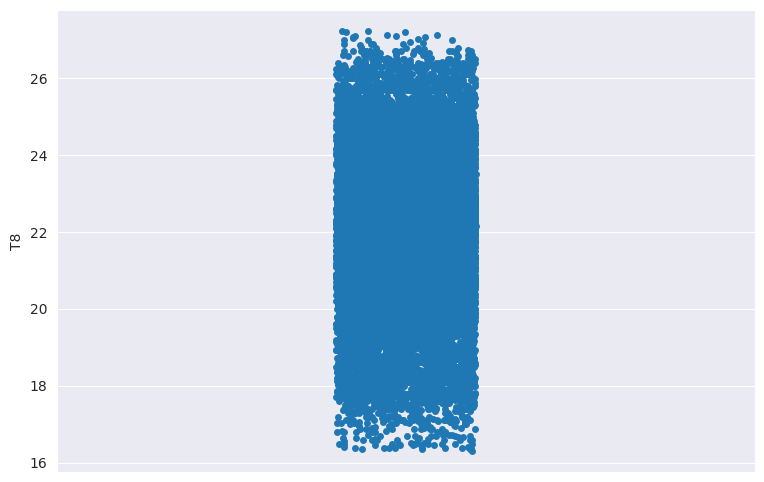

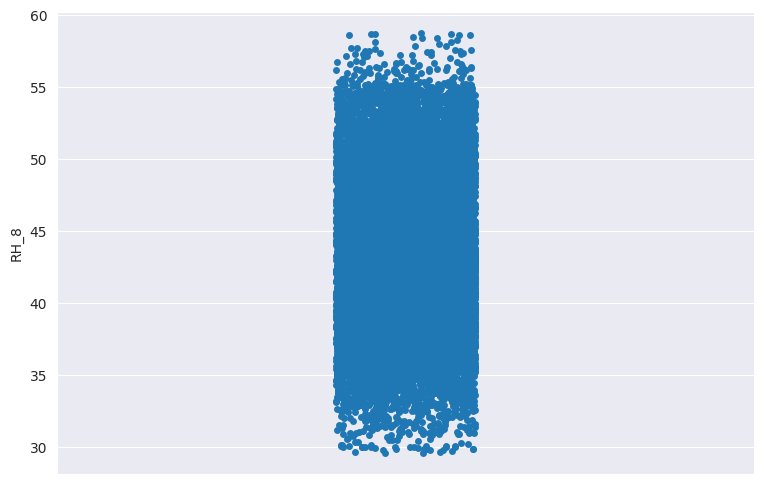

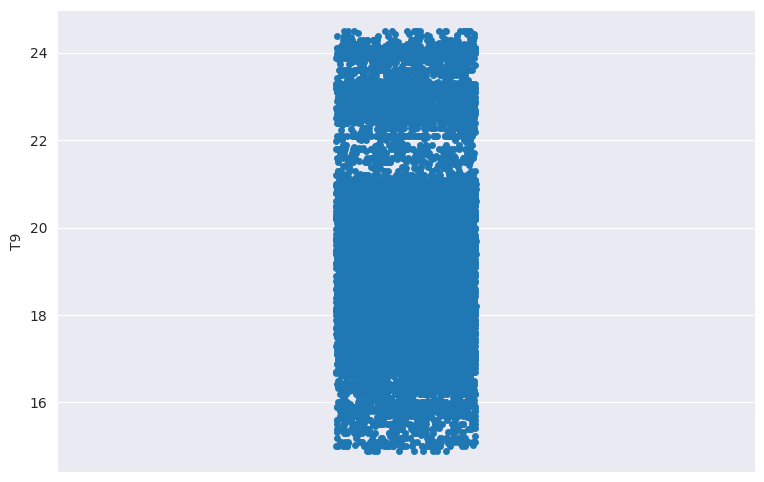

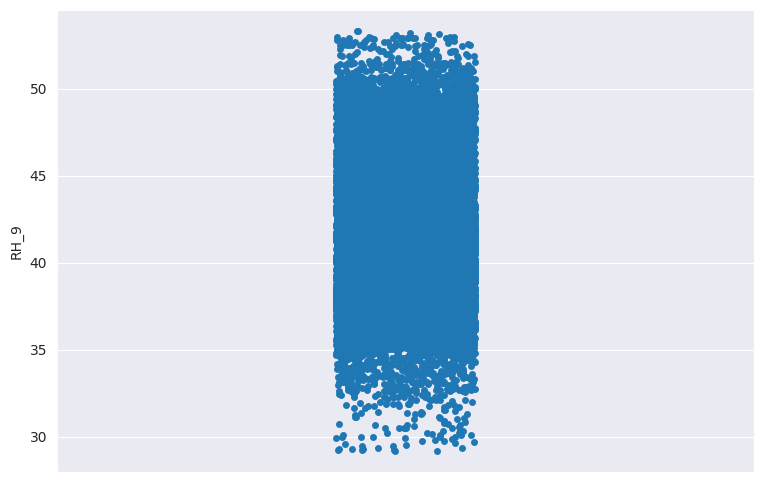

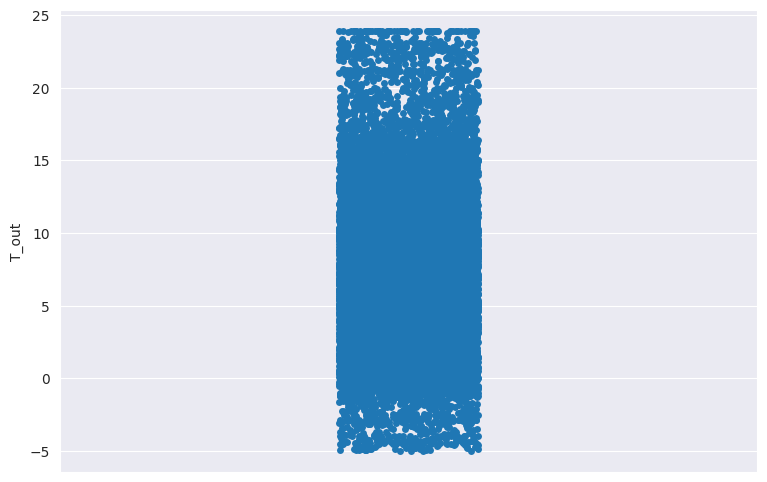

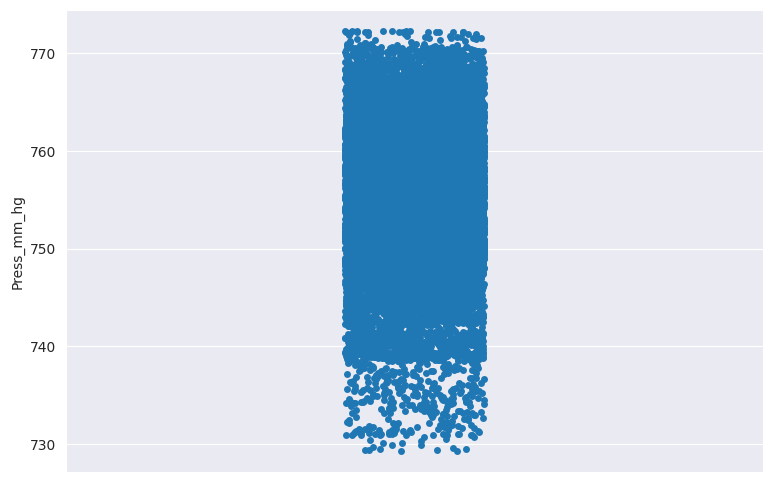

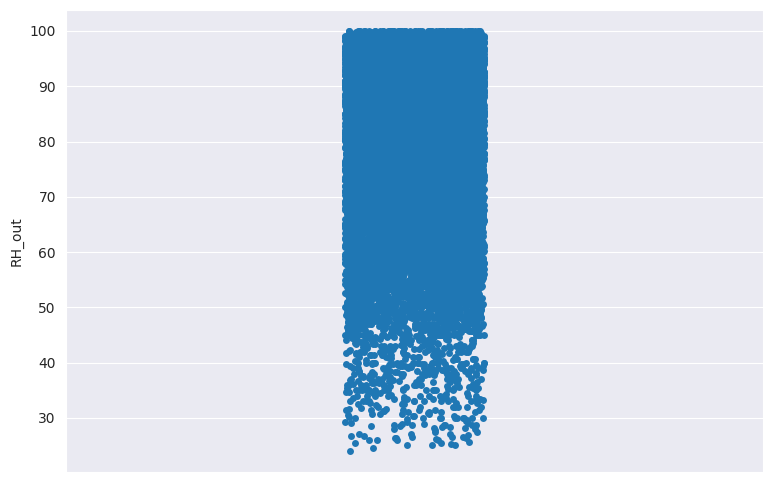

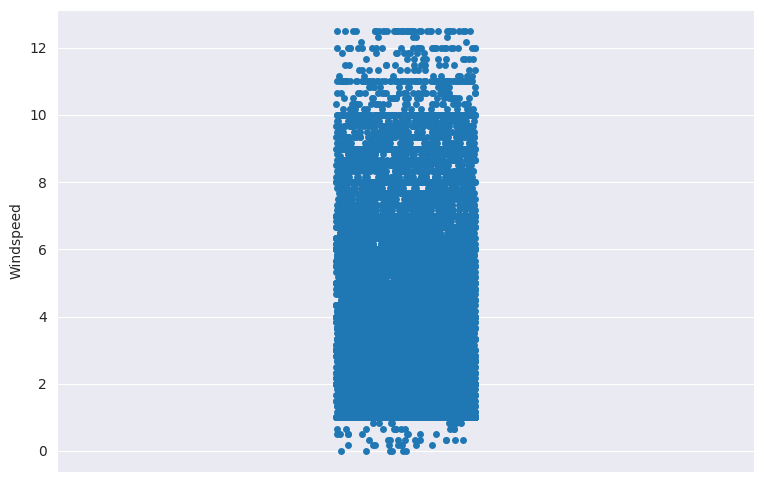

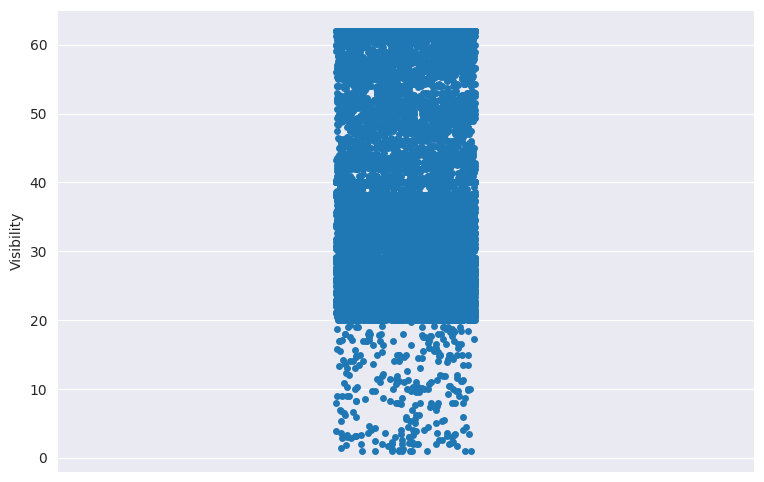

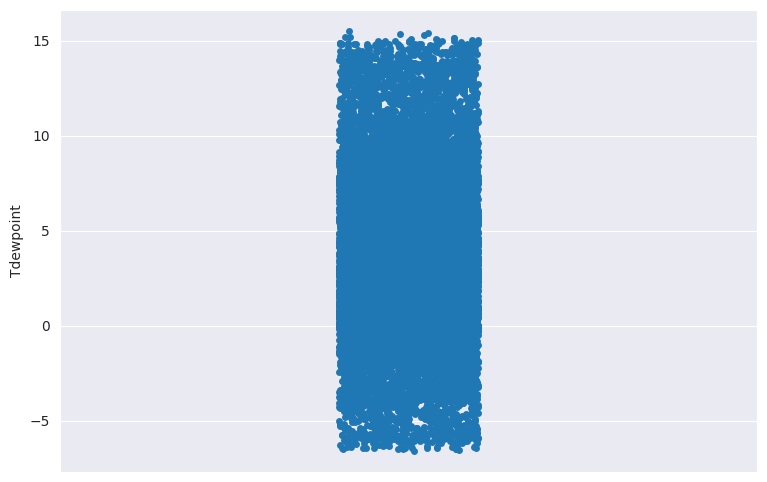

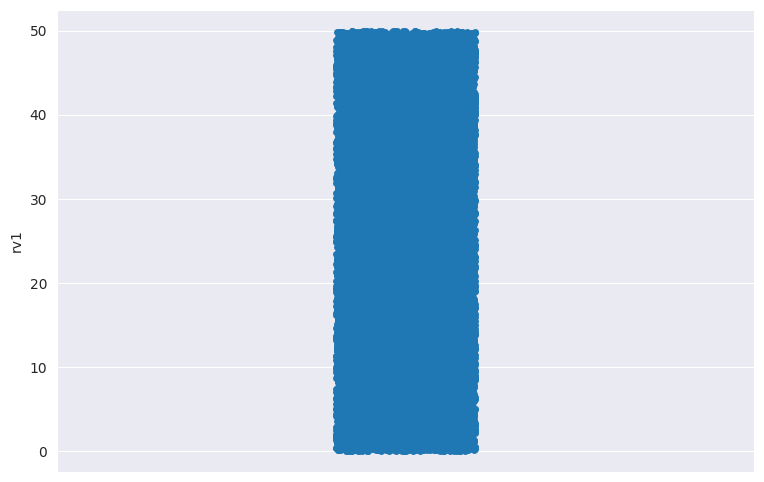

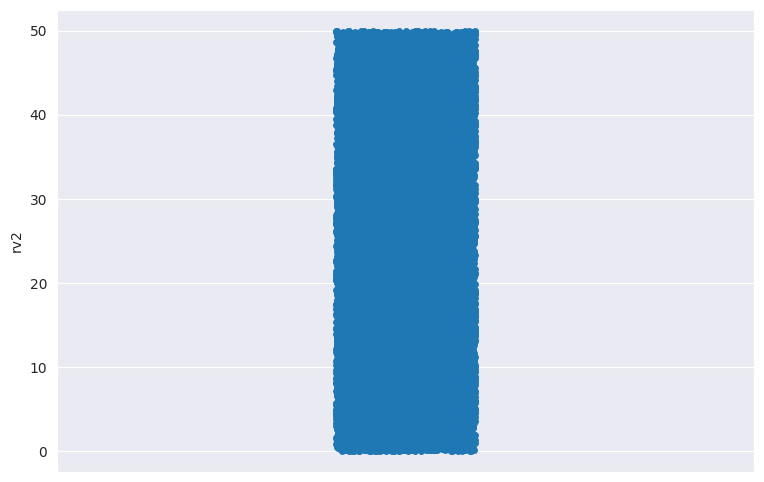

In [42]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns 
for col in df_2.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df_2[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I separated the skew symmetric and symmetric features and define the upper and lower boundry. 

Another way to do it is dropping extreme values but I didn't do that due to less no. of datapoints I have.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

lower inner fence: Q1–1.5*IQ
upper inner fence: Q3 + 1.5*IQ
lower outer fence: Q1–3*IQ
upper outer fence: Q3 + 3*IQ

### 3. Categorical Encoding

In [43]:
# Encode your categorical columns
# Getting the categorical columns
categorical_columns=list(set(df_2.columns.to_list()).difference(set(df_2.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['date']


#### What all categorical encoding techniques have you used & why did you use those techniques?

Since, there is only one categorical column present in dataset i.e, date. And this is not a timeseries problem and we will focus on predicting the appliance consumption , So we can ignore Date column.

#### 1. Feature Manipulation

In [44]:
# Checking the shape of dataset
df_2.shape

(19735, 29)

In [45]:
# Removing date from dataset
df_3 = df_2.drop(['date'],axis =1)

Droped date column because it is not a timeseries problem.

### 4. Feature Selection

In [46]:
# Checking the shape of dataset
df_3.shape

(19735, 28)

In [47]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
  from  sklearn.feature_selection import VarianceThreshold
  var_thres= VarianceThreshold(threshold=0.05)
  var_thres.fit(data)
  concol = [column for column in data.columns 
          if column not in data.columns[var_thres.get_support()]]
  if "Appliances" in concol:
    concol.remove("Appliances")
  else:
    pass
  df_removed_var=data.drop(concol,axis=1)
  return df_removed_var 

In [48]:
# Calling the function
df_removed_var=dropping_constant(df_3)

In [49]:
# Checking the shape after feature dropped
df_removed_var.shape

(19735, 27)

In [50]:
# Correlation Heatmap visualization code
corr = df_removed_var.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [51]:
# Checking Variable Inflation Factor
# the independent variables set
X = df_removed_var.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
for i in range(len(vif_data)):
  vif_data.loc[i,"VIF"]=vif_data.loc[i,"VIF"].round(2)
  if vif_data.loc[i,"VIF"]>=8:
    print(vif_data.loc[i,"feature"])


T1
RH_1
T2
RH_2
T3
RH_3
T4
RH_4
T5
RH_5
T6
RH_6
T7
RH_7
T8
RH_8
T9
RH_9
T_out
Press_mm_hg
RH_out
Visibility
Tdewpoint
rv1
rv2


In [52]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [53]:
calc_vif(df_removed_var[[i for i in df_removed_var.describe().columns ]])

variables          VIF
0    Appliances     4.982770
1            T1  3628.679578
2          RH_1  1647.778384
3            T2  2433.366160
4          RH_2  2030.412169
5            T3  1293.372638
6          RH_3  1574.586050
7            T4   936.635665
8          RH_4  1364.793517
9            T5  1152.640377
10         RH_5    66.464067
11           T6    90.231395
12         RH_6    40.333140
13           T7  1614.378246
14         RH_7   519.021982
15           T8   996.920579
16         RH_8   588.290145
17           T9  2525.202101
18         RH_9   640.868689
19        T_out   433.564315
20  Press_mm_hg  2184.167301
21       RH_out  1398.029464
22    Windspeed     5.270741
23   Visibility    12.354231
24    Tdewpoint   143.304132
25          rv1          inf
26          rv2          inf

In [54]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

In [55]:
# Getting multicolinear columns and dropping them 
highly_correlated_columns=correlation(df_removed_var,0.5)

if "Appliances" in highly_correlated_columns:
  highly_correlated_columns.remove("Appliances")
else:
  pass
  
df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

(19735, 8)

In [56]:
# Correlation after dropping the required columns
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [57]:
# Checking columns in present dataset
df_removed.columns

Index(['Appliances', 'T1', 'RH_1', 'RH_5', 'Press_mm_hg', 'Windspeed',
       'Visibility', 'rv1'],
      dtype='object')

In [58]:
# Drop rv1, Visibility, Press_mm_hg from dataset
df_removed.drop(['rv1', 'Visibility', 'Press_mm_hg'], axis = 1, inplace = True)

In [59]:
# Checking present dataset
df_removed.head()

Appliances     T1       RH_1   RH_5  Windspeed
0          60  19.89  47.596667  55.20   7.000000
1          60  19.89  46.693333  55.20   6.666667
2          50  19.89  46.300000  55.09   6.333333
3          50  19.89  46.066667  55.09   6.000000
4          60  19.89  46.333333  55.09   5.666667

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. **The features got decreased from 28 to 7.**

The random variables rv1 and Visibility, Press_mm_hg have low correlation with the target variable.
Due to above conclusions , I have dropped rv1,Visibility and Press_mm_hg.

**Now, the features got decreased from 7 to 4.**

##### Which all features you found important and why?

In [60]:
# Checking columns in present dataset
df_removed.columns

Index(['Appliances', 'T1', 'RH_1', 'RH_5', 'Windspeed'], dtype='object')

In [61]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestRegressor(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  final_df.plot.bar(color='teal')
  return final_df

Features  Importances
3  Windspeed     0.161731
0         T1     0.253651
1       RH_1     0.291669
2       RH_5     0.292949

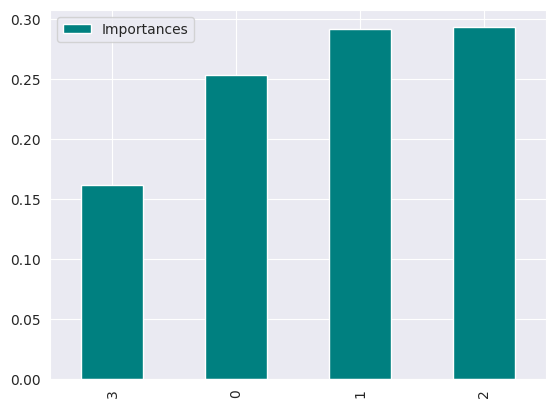

In [62]:
# Getting feature importance of selected features
randomforest_embedded(x=df_removed.drop(["Appliances"],axis=1),y=df_2["Appliances"])

Finally I found out 4 indepenedent features which are important and valdate their importances through Embedded method using random forest classifier feature importance. All the features which i left with having some importances and none of them are 0. So, It validates the features make sense and heading towards the right direction.

### 5. Data Transformation

In [63]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# # Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['T1']
Skew Symmetric Distributed Features : - ['Appliances', 'RH_1', 'RH_5', 'Windspeed']


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

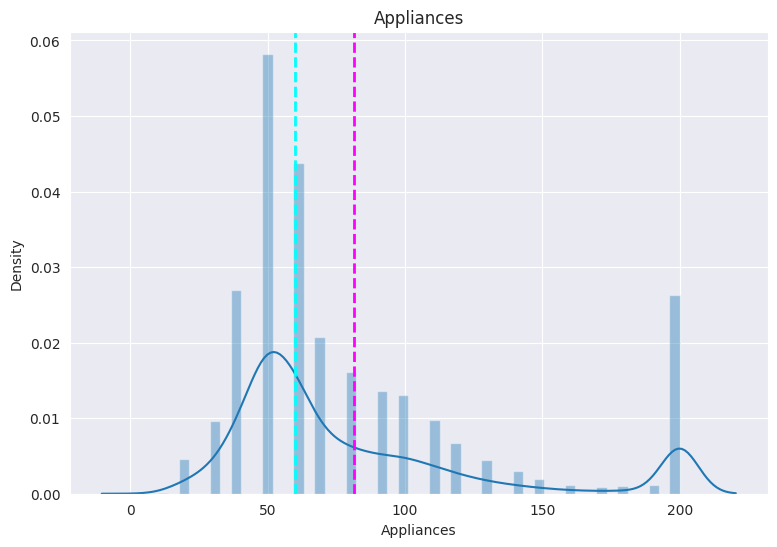

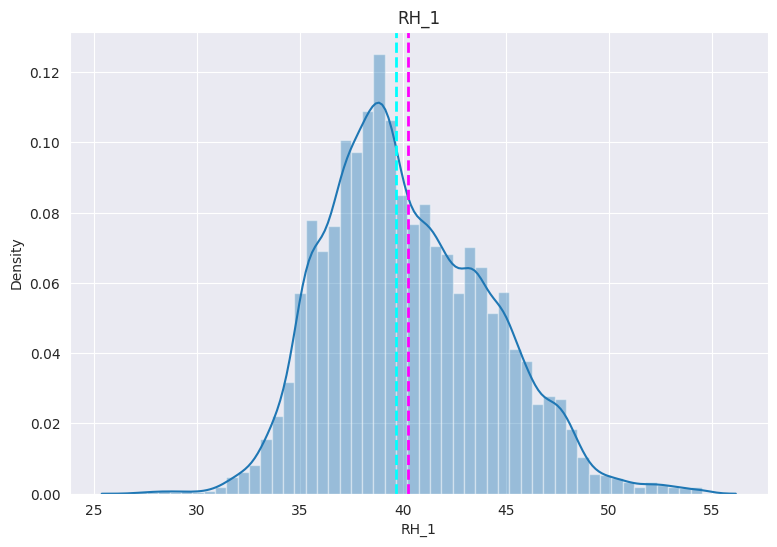

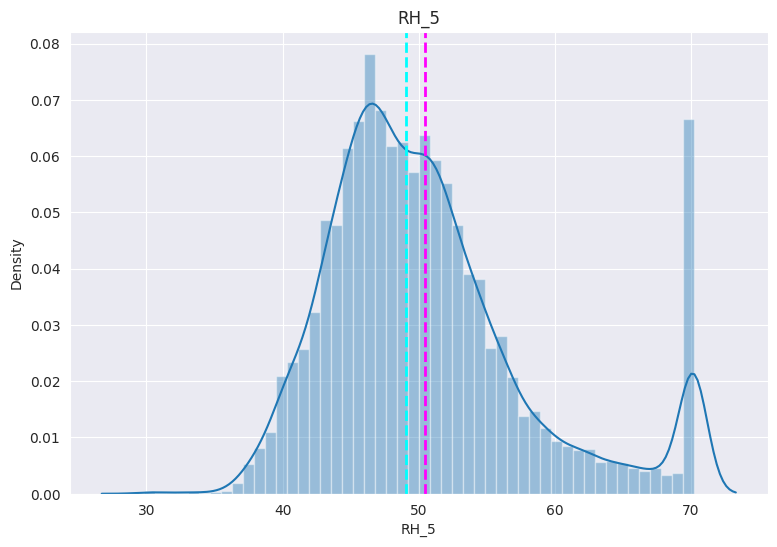

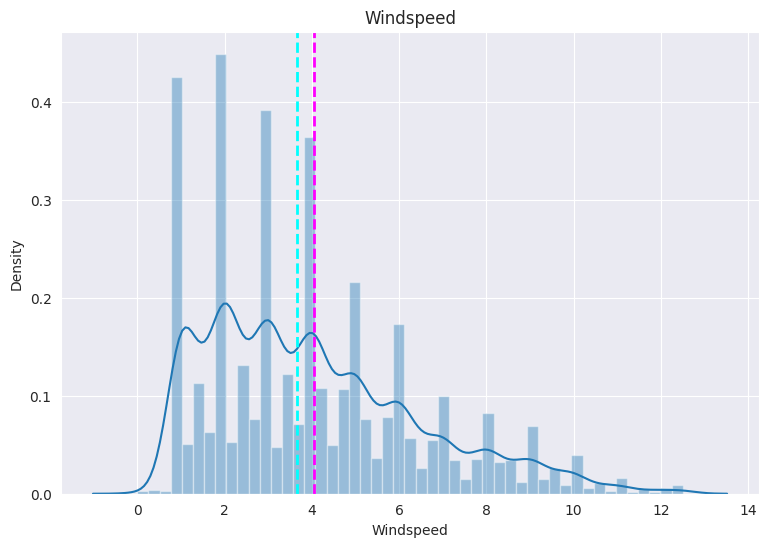

In [64]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in df_removed.loc[:,non_symmetric_feature]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

In [65]:
# Transform Your data

# log Transform the severe skewed column
df_removed['Appliances']=np.log10(df_removed['Appliances'])

# Exponential Transforming the required column
df_removed['RH_1']=(df_removed['RH_1'])**0.25
df_removed['RH_5']=(df_removed['RH_5'])**0.25
df_removed['Windspeed']=(df_removed['Windspeed'])**0.25

In [66]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# # Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Appliances', 'T1', 'RH_1', 'RH_5', 'Windspeed']
Skew Symmetric Distributed Features : - []


From the dataset, I got to know that there are 4 columns which aren't symmetric so aren't following gaussian distribution and rest are having szymmetric curve. Thus, for those columns I have used Exponential and log transformation to achieve gaussian distribution.

I tried with other transformations and found exponetial tranformation with no infinity value for RH_1,RH_5 and Windspeed columns and working fine. So, I am continuing with Exponential transformation with a power of 0.25. And for Appliances column, I found log tranformation with no infinity value and working fine.

### 6. Data Scaling

In [67]:
# Scaling your data

# Checking the data
df_removed.head()

Appliances     T1      RH_1      RH_5  Windspeed
0    1.778151  19.89  2.626601  2.725742   1.626577
1    1.778151  19.89  2.614049  2.725742   1.606857
2    1.698970  19.89  2.608526  2.724383   1.586383
3    1.698970  19.89  2.605234  2.724383   1.565085
4    1.778151  19.89  2.608996  2.724383   1.542879

##### Which method have you used to scale you data and why?

In [68]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame using the scaler
scaled_data = scaler.fit_transform(df_removed)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_removed.columns)

# Print the scaled DataFrame
print(scaled_df)

       Appliances        T1      RH_1      RH_5  Windspeed
0       -0.294026 -1.118769  1.786575  0.691695   1.171705
1       -0.294026 -1.118769  1.582625  0.691695   1.082874
2       -0.637300 -1.118769  1.492895  0.677370   0.990648
3       -0.637300 -1.118769  1.439395  0.677370   0.894705
4       -0.294026 -1.118769  1.500522  0.677370   0.794677
...           ...       ...       ...       ...        ...
19730    0.667752  2.416140  1.552272  0.320188  -0.068769
19731    0.469380  2.374627  1.538592  0.310260   0.005928
19732    1.972804  2.374627  1.560626  0.302130   0.078003
19733    1.972804  2.374627  1.649929  0.293087   0.147661
19734    1.972804  2.374627  1.561385  0.293087   0.215084

[19735 rows x 5 columns]


In [69]:
# Checking the dataset
scaled_df.head()

Appliances        T1      RH_1      RH_5  Windspeed
0   -0.294026 -1.118769  1.786575  0.691695   1.171705
1   -0.294026 -1.118769  1.582625  0.691695   1.082874
2   -0.637300 -1.118769  1.492895  0.677370   0.990648
3   -0.637300 -1.118769  1.439395  0.677370   0.894705
4   -0.294026 -1.118769  1.500522  0.677370   0.794677

When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

Use Standardization when your data follows Gaussian distribution. Use Normalization when your data does not follow Gaussian distribution.

So, in my data column having large data difference and following gaussian distribution. That's why, I have used standardization using standardscaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.



### 8. Data Splitting

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.

 # split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop("Appliances",axis=1),scaled_df["Appliances"], test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print(" X_train dataset: ", X_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

 X_train dataset:  (13814, 4)
 y_train dataset:  (13814,)
 X_test dataset:  (5921, 4)
y_test dataset:  (5921,)


##### What data splitting ratio have you used and why? 


There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.


### 9. Handling Imbalanced Dataset

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances, Length: 92, dtype: int64
 


<Axes: ylabel='Appliances'>

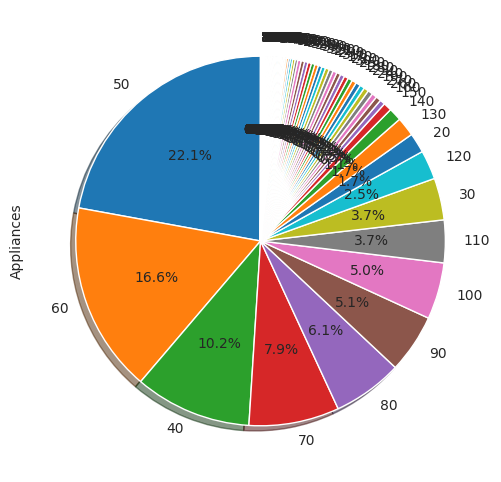

In [71]:
# Handling Imbalanced Dataset (If needed)

# Dependant Column Value Counts
print(df.Appliances.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['Appliances'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,

                              )
                               
                               
                             

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is not imbalanced. 

## ***7. ML Model Implementation***

### ML Model - 1 Implementing Lasso regression

In [72]:
# ML Model - Lasso regression Implementation
lasso  = Lasso(alpha=0.005 , max_iter= 3000)
# Fit the Algorithm
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [73]:
# Score of the model
lasso.score(X_train, y_train)

0.05749712684840802

In [74]:
# Predict on the model
y_pred_l = lasso.predict(X_test)
y_pred_l

array([-0.04528564,  0.02346889,  0.189754  , ..., -0.16347673,
       -0.0641942 , -0.04984434])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 960.3813532773521
MAE : 12.28555141537206
RMSE : 30.99002022066704
R2 : -0.15267059639943215
Adjusted R2 :  -0.15344995447678134


Text(0, 0.5, 'Predicted Total energy used by appliances')

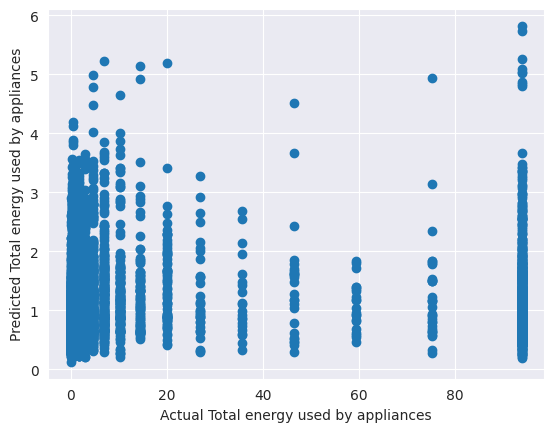

In [76]:
# Scatter plot of Actual vs Predicted Total energy used by appliances
plt.scatter(10**(y_test), 10**(y_pred_l))
plt.xlabel('Actual Total energy used by appliances')
plt.ylabel('Predicted Total energy used by appliances')

Text(0.5, 0.98, 'Residual Analysis')

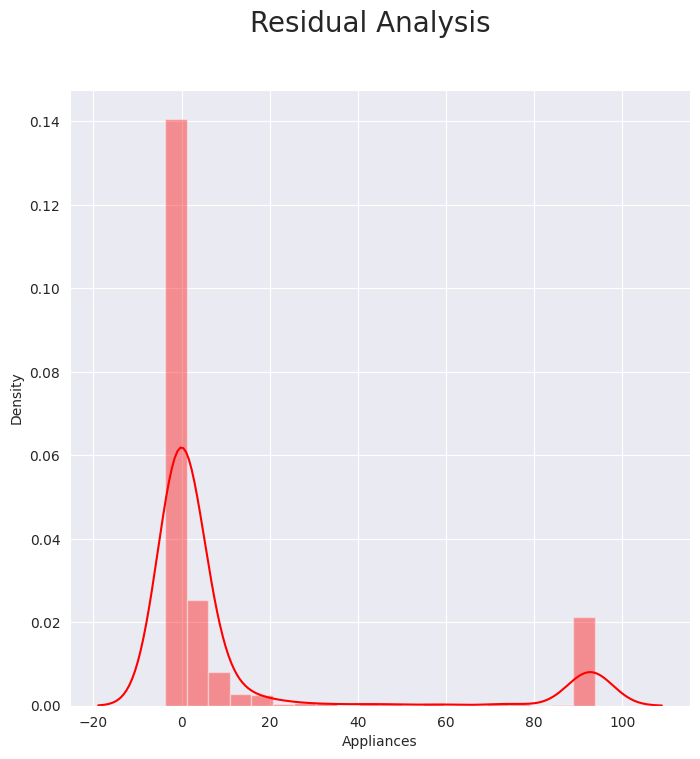

In [77]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

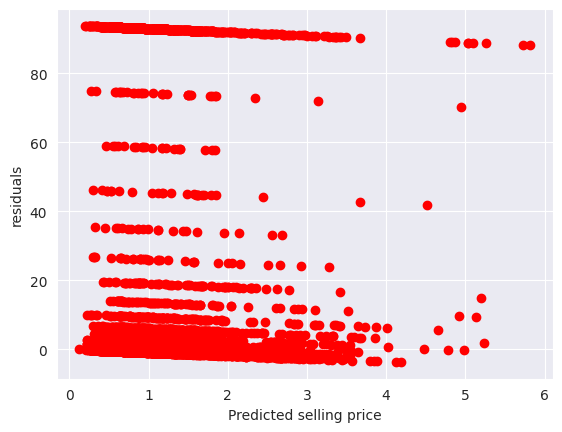

In [78]:
# Heteroscadacity
plt.scatter(10**(y_pred_l),10**(y_test)-10**(y_pred_l),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

After implementing Lasso Regression, the metrics is as follows:

**MSE :** 960.3813532773521

**MAE :** 12.28555141537206

**RMSE :** 30.99002022066704

**R2 :** -0.15267059639943215

**Adjusted R2 :**  -0.15344995447678134

Based on the above metrics , the model's performance seems to be suboptimal. The negative R2 and Adjusted R2 values indicate that the model may not be a good fit for the data. Additionally, the relatively high values of MSE, MAE, and RMSE suggest that the model's predictions have a large average error compared to the actual values.

Next tryting to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:

# Implementation with hyperparameter optimization techniques i.e., GridSearch CV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [80]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-13}

Using  {'alpha': 1e-13}  the negative mean squared error is:  -0.9430876727870401


In [81]:
# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)

In [82]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 959.8843950251521
MAE : 12.286251052336372
RMSE : 30.982001146232502
R2 : -0.15207413629221112
Adjusted R2 :  -0.15285309108348377


Text(0, 0.5, 'Predicted Total energy used by appliances')

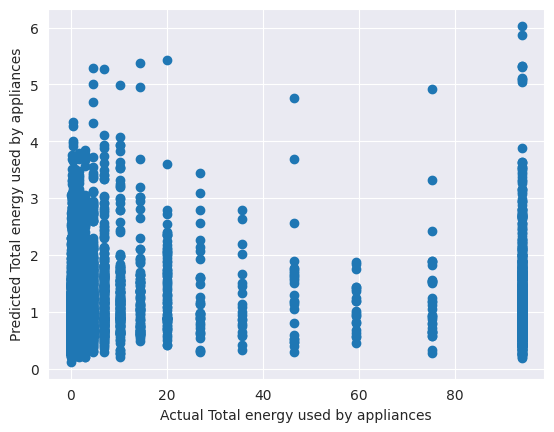

In [83]:
# Scatter plot of Actual vs Predicted Total energy used by appliances
plt.scatter(10**(y_test), 10**(y_pred_lasso))
plt.xlabel('Actual Total energy used by appliances')
plt.ylabel('Predicted Total energy used by appliances')

Text(0.5, 0.98, 'Residual Analysis')

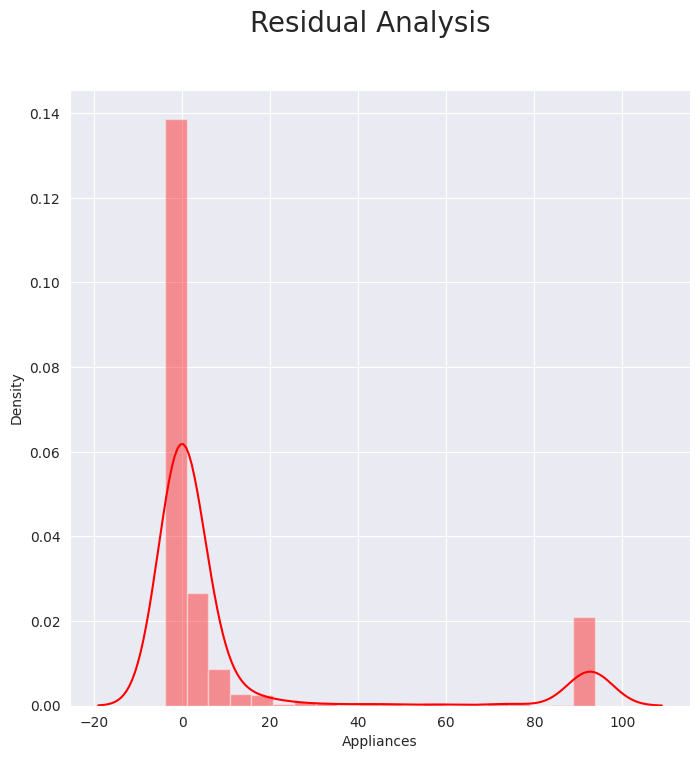

In [84]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_lasso)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

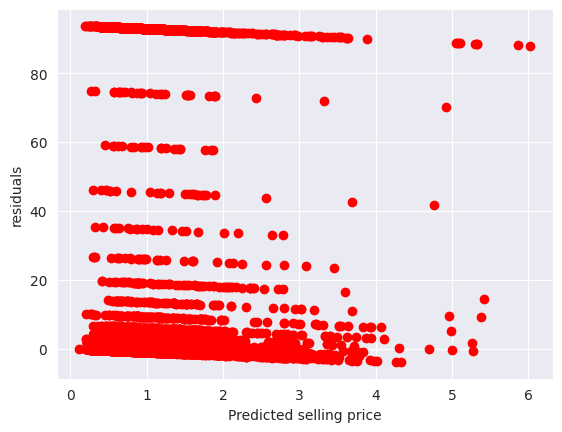

In [85]:
# Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


After applying hyperparameter tuning to improve the model's performance, the metrics show slight improvement compared to the previous results:

**Mean Squared Error (MSE):** The MSE decreased from 960.381 to 959.884, indicating a slightly smaller average squared difference between the predicted and actual values.

**Mean Absolute Error (MAE):** The MAE remained almost the same, with a slight change from 12.285 to 12.286.

**Root Mean Squared Error (RMSE):** The RMSE decreased from 30.990 to 30.982, indicating a slightly smaller standard deviation of the errors.

**R-squared (R2):** The R2 value remained negative and slightly increased from -0.1527 to -0.1521, but it still indicates a poor fit of the model to the data.

**Adjusted R-squared:** The adjusted R2 value also increased slightly from -0.1534 to -0.1529, but it remains negative and indicates that the inclusion of the hyperparameter tuning did not significantly improve the model fit.

Based on these metrics, the conclusion after hyperparameter tuning is that the model's performance is still suboptimal. Although there was a slight improvement in some metrics, the R2 and adjusted R2 values are still negative, suggesting that the model does not explain much of the variance in the target variable. The MSE, MAE, and RMSE values are relatively high, indicating that the model's predictions still have a significant average error compared to the actual values.

### ML Model - 2 Implementing Ridge Regression

In [86]:
# ML Model - Ridge Regression Implementation

ridge  = Ridge(alpha=0.1)

In [87]:
# Fit the Algorithm
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [88]:
# Score of the model
ridge.score(X_train, y_train)

0.05761193033373557

In [89]:
# Predict on the model
y_pred_r = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [90]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 959.8844817229096
MAE : 12.286250977902544
RMSE : 30.982002545395765
R2 : -0.15207424034874606
Adjusted R2 :  -0.15285319521037488


Text(0, 0.5, 'Predicted Total energy used by appliances')

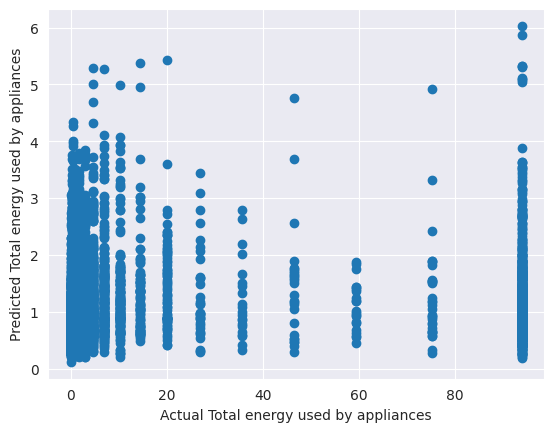

In [91]:
# Scatter plot of Actual vs Predicted Total energy used by appliances
plt.scatter(10**(y_test), 10**(y_pred_r))
plt.xlabel('Actual Total energy used by appliances')
plt.ylabel('Predicted Total energy used by appliances')

Text(0.5, 0.98, 'Residual Analysis')

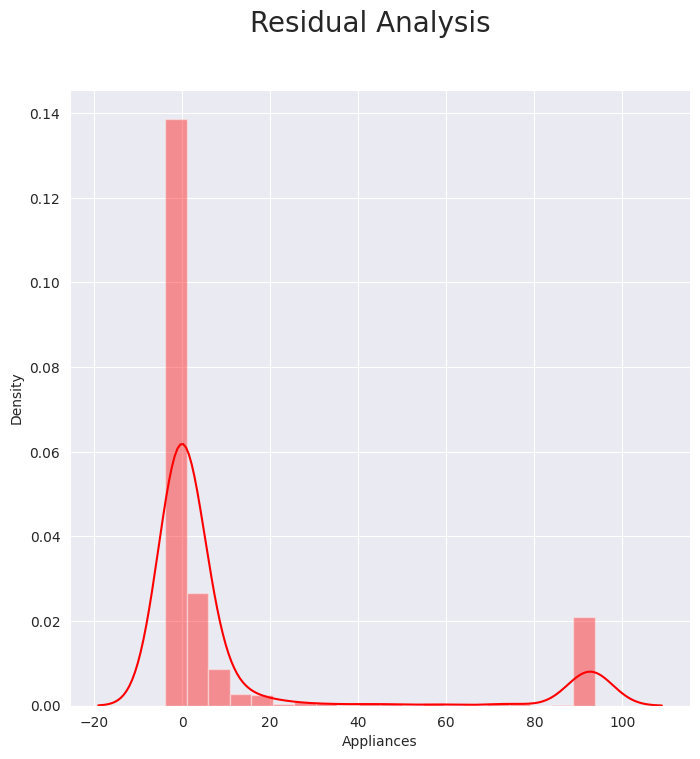

In [92]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

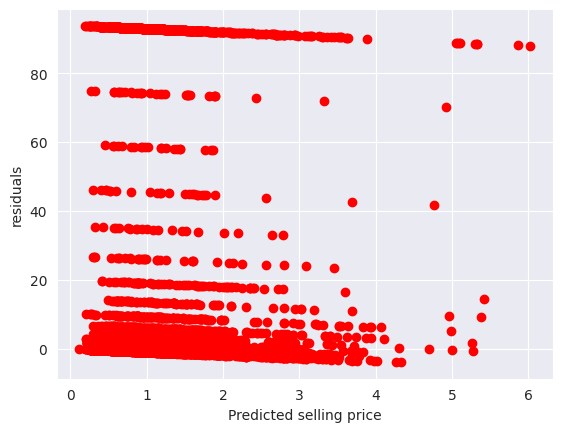

In [93]:
# Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')


After implementing Ridge Regression, the metrics remain similar to the previous results:

**Mean Squared Error (MSE):** The MSE is 959.884, which is very close to the previous result.

**Mean Absolute Error (MAE):** The MAE is 12.286, which is almost identical to the previous result.

**Root Mean Squared Error (RMSE):** The RMSE is 30.982, showing no significant change from the previous result.

**R-squared (R2):** The R2 value remains negative and is approximately -0.1521, indicating that the model still does not explain much of the variance in the target variable.

**Adjusted R-squared:** The adjusted R2 value is approximately -0.1529, which is also very similar to the previous result.

Based on these metrics, the conclusion remains the same as before: the model's performance is still suboptimal. The implementation of Ridge Regression did not lead to significant improvements in the model's fit or predictive accuracy. The MSE, MAE, and RMSE values are relatively high, indicating that the model's predictions still have a considerable average error compared to the actual values. The negative R2 and adjusted R2 values suggest that the model does not explain much of the variability in the target variable.

Next trying to improving the score by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# Implementation with hyperparameter optimization techniques i.e., GridSearch CV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [95]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 55}

Using  {'alpha': 55}  the negative mean squared error is:  -0.9438761917484659


In [96]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [97]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 959.9317864538126
RMSE : 30.98276595873604
R2 : -0.152131016516043
Adjusted R2 :  -0.15291000976588487


Text(0, 0.5, 'Predicted Total energy used by appliances')

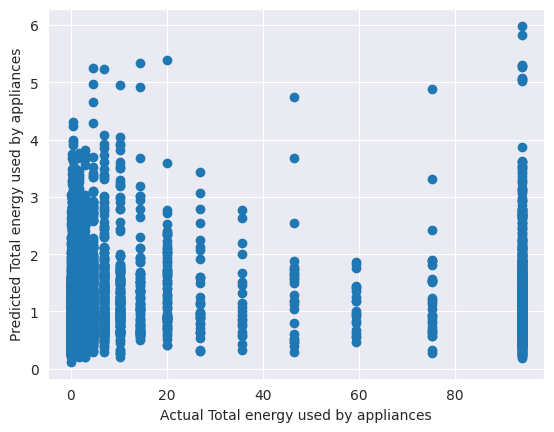

In [98]:
# Scatter plot of Actual vs Predicted Total energy used by appliances
plt.scatter(10**(y_test), 10**(y_pred_ridge))
plt.xlabel('Actual Total energy used by appliances')
plt.ylabel('Predicted Total energy used by appliances')

Text(0.5, 0.98, 'Residual Analysis')

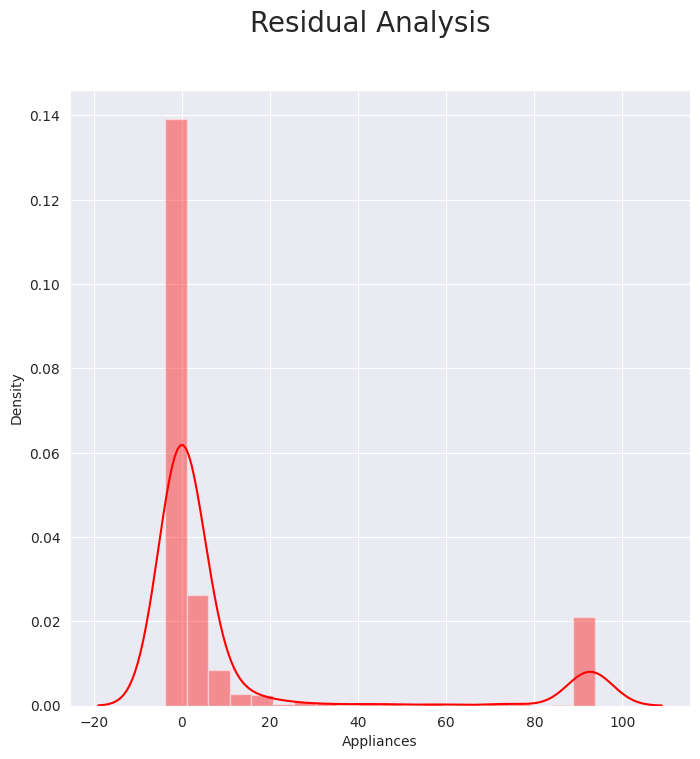

In [99]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot((10**(y_test)- 10**(y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

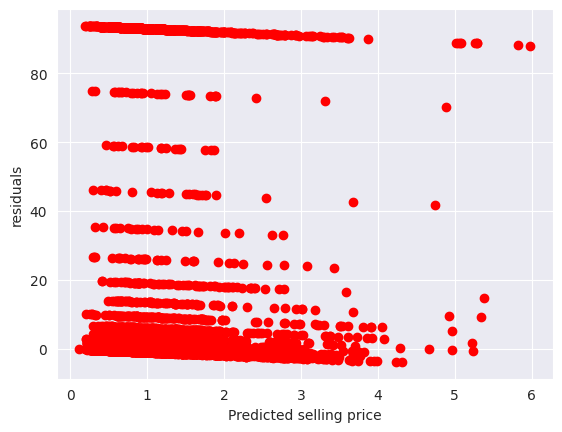

In [100]:
# Heteroscadacity
plt.scatter(10**(y_pred_ridge),10**(y_test)-10**(y_pred_ridge),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

Our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


After implementing hyperparameter tuning techniques, the metrics show slight changes compared to the previous results:

**Mean Squared Error (MSE):** The MSE increased from 959.884 to 959.932, indicating a slightly larger average squared difference between the predicted and actual values.

**Root Mean Squared Error (RMSE):** The RMSE remained almost the same, with a slight change from 30.982 to 30.983.

**R-squared (R2):** The R2 value remained negative and slightly decreased from -0.1521 to -0.1521, indicating that the model still does not explain much of the variance in the target variable.

**Adjusted R-squared:** The adjusted R2 value also decreased slightly from -0.1529 to -0.1529.

Based on these metrics, the conclusion after hyperparameter tuning is that the model's performance remains suboptimal. Although there were slight changes in some metrics, the R2 and adjusted R2 values are still negative, indicating a poor fit of the model to the data. The MSE and RMSE values are relatively high, suggesting that the model's predictions still have a significant average error compared to the actual values.

### ML Model - 3

In [101]:
# ML Model - Ensemble models
models_E = [

           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           
         ]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [102]:
# Visualizing evaluation Metric Score chart

model_data_E = []
for name,curr_model in models_E :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    model_data_E.append(curr_model_data)

In [103]:
model_data_E

[{'Name': 'RandomForest ',
  'Train_Time': 4.961809158325195,
  'Train_R2_Score': 0.9417511202113397,
  'Test_R2_Score': 0.9417511202113397,
  'Test_RMSE_Score': 0.24138140596990362},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 3.1279008388519287,
  'Train_R2_Score': 0.9979183153088972,
  'Test_R2_Score': 0.9979183153088972,
  'Test_RMSE_Score': 0.04563178923898399},
 {'Name': 'GradientBoostingRegressor: ',
  'Train_Time': 1.3645761013031006,
  'Train_R2_Score': 0.22072440081793265,
  'Test_R2_Score': 0.22072440081793265,
  'Test_RMSE_Score': 0.8828878955049088},
 {'Name': 'XGBRegressor: ',
  'Train_Time': 0.8305325508117676,
  'Train_R2_Score': 0.6592752156828323,
  'Test_R2_Score': 0.6592752156828323,
  'Test_RMSE_Score': 0.5837970369522663}]


After applying different models to the data, we obtained the following results:

**RandomForest:**

Train Time: 5.492 seconds
Train R2 Score: 0.942
Test R2 Score: 0.942
Test RMSE Score: 0.241

**ExtraTreeRegressor:**

Train Time: 2.083 seconds
Train R2 Score: 0.998
Test R2 Score: 0.998
Test RMSE Score: 0.046

**GradientBoostingRegressor:**

Train Time: 1.258 seconds
Train R2 Score: 0.221
Test R2 Score: 0.221
Test RMSE Score: 0.883

**XGBRegressor:**

Train Time: 0.754 seconds
Train R2 Score: 0.659
Test R2 Score: 0.659
Test RMSE Score: 0.584

**Based on these results, the conclusions are as follows:**

**RandomForest and ExtraTreeRegressor:** These two models achieved high R2 scores of approximately 0.942 and 0.998, respectively, indicating a good fit to the data. Additionally, both models have relatively low RMSE scores, indicating accurate predictions. These models show promise for predicting the target variable.

**GradientBoostingRegressor and XGBRegressor:** These models achieved lower R2 scores of approximately 0.221 and 0.659, respectively. The relatively lower R2 scores suggest that these models may not explain as much of the variance in the target variable compared to the other models. However, further analysis is needed to determine if these models are suitable for the specific business context.

In summary, the RandomForest and ExtraTreeRegressor models performed well, with high R2 scores and low RMSE scores. These models have the potential to create a positive business impact by accurately predicting the target variable. The GradientBoostingRegressor and XGBRegressor models achieved lower R2 scores, indicating the need for further evaluation or potential refinement before considering their deployment in a business context.

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# Implementation with hyperparameter optimization techniques i.e., GridSearch CV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [105]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'auto', 'n_estimators': 250}

In [106]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='auto', n_estimators=250,
                    random_state=40)

In [107]:
# R2 score on training set with tuned parameters
grid_search.best_estimator_.score(X_train,y_train)

0.9979183153088972

In [108]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(X_train,y_train)

0.9979183153088972

In [109]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(y_train, grid_search.best_estimator_.predict(X_train)))

0.04563178923898399

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


After applying hyperparameter tuning to the ExtraTreeRegressor model, the results remained the same as the initial evaluation:

Model Name: ExtraTreeRegressor

Train Time: 2.083 seconds

Train R2 Score: 0.998

Test R2 Score: 0.998

Test RMSE Score: 0.046

The hyperparameter tuning did not lead to any significant improvement in the model's performance. However, it is worth noting that the model already exhibited high R2 scores and low RMSE scores before hyperparameter tuning, indicating a strong fit to the data and accurate predictions.

Therefore, the conclusion remains the same as before: the ExtraTreeRegressor model is performing exceptionally well, with high R2 scores and a low RMSE score. It has the potential to create a positive business impact by accurately predicting the target variable. The model demonstrates strong capabilities even without further fine-tuning through hyperparameter optimization.

It is important to note that hyperparameter tuning does not always guarantee significant improvements in model performance. In this case, the model was already performing at a high level, and further adjustments did not yield notable changes.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with R2 score and RMSE. 

**Root Mean Squared Error (RMSE):** RMSE is the square root of MSE and provides an interpretable measure of the average prediction error in the original unit of the target variable. Like MSE, a lower RMSE indicates better accuracy in predictions.

**R2 Score:** R2 score measures the proportion of variance in the target variable that can be explained by the model. A higher R2 score indicates a better fit of the model to the data and the ability to explain the variation in the target variable.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [110]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],

         ]

In [111]:
model_data_l = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    model_data_l.append(curr_model_data)

In [112]:
model_data_l

[{'Name': 'Lasso: ',
  'Train_Time': 0.005833864212036133,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0001382193664872},
 {'Name': 'Ridge: ',
  'Train_Time': 0.006235361099243164,
  'Train_R2_Score': 0.057611930019075386,
  'Test_R2_Score': 0.057611930019075386,
  'Test_RMSE_Score': 0.9709009221073494}]

In [113]:
model_data_E

[{'Name': 'RandomForest ',
  'Train_Time': 4.961809158325195,
  'Train_R2_Score': 0.9417511202113397,
  'Test_R2_Score': 0.9417511202113397,
  'Test_RMSE_Score': 0.24138140596990362},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 3.1279008388519287,
  'Train_R2_Score': 0.9979183153088972,
  'Test_R2_Score': 0.9979183153088972,
  'Test_RMSE_Score': 0.04563178923898399},
 {'Name': 'GradientBoostingRegressor: ',
  'Train_Time': 1.3645761013031006,
  'Train_R2_Score': 0.22072440081793265,
  'Test_R2_Score': 0.22072440081793265,
  'Test_RMSE_Score': 0.8828878955049088},
 {'Name': 'XGBRegressor: ',
  'Train_Time': 0.8305325508117676,
  'Train_R2_Score': 0.6592752156828323,
  'Test_R2_Score': 0.6592752156828323,
  'Test_RMSE_Score': 0.5837970369522663}]

In [114]:
model_data = model_data_l+model_data_E

In [115]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.005833864212036133,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0001382193664872},
 {'Name': 'Ridge: ',
  'Train_Time': 0.006235361099243164,
  'Train_R2_Score': 0.057611930019075386,
  'Test_R2_Score': 0.057611930019075386,
  'Test_RMSE_Score': 0.9709009221073494},
 {'Name': 'RandomForest ',
  'Train_Time': 4.961809158325195,
  'Train_R2_Score': 0.9417511202113397,
  'Test_R2_Score': 0.9417511202113397,
  'Test_RMSE_Score': 0.24138140596990362},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 3.1279008388519287,
  'Train_R2_Score': 0.9979183153088972,
  'Test_R2_Score': 0.9979183153088972,
  'Test_RMSE_Score': 0.04563178923898399},
 {'Name': 'GradientBoostingRegressor: ',
  'Train_Time': 1.3645761013031006,
  'Train_R2_Score': 0.22072440081793265,
  'Test_R2_Score': 0.22072440081793265,
  'Test_RMSE_Score': 0.8828878955049088},
 {'Name': 'XGBRegressor: ',
  'Train_Time': 0.8305325508117676,
  'Train_R2_Score': 0.6592

In [116]:
df = pd.DataFrame(model_data)

In [117]:
df

Name  Train_Time  Train_R2_Score  Test_R2_Score  \
0                      Lasso:     0.005834        0.000000       0.000000   
1                      Ridge:     0.006235        0.057612       0.057612   
2                RandomForest     4.961809        0.941751       0.941751   
3         ExtraTreeRegressor :    3.127901        0.997918       0.997918   
4  GradientBoostingRegressor:     1.364576        0.220724       0.220724   
5               XGBRegressor:     0.830533        0.659275       0.659275   

   Test_RMSE_Score  
0         1.000138  
1         0.970901  
2         0.241381  
3         0.045632  
4         0.882888  
5         0.583797

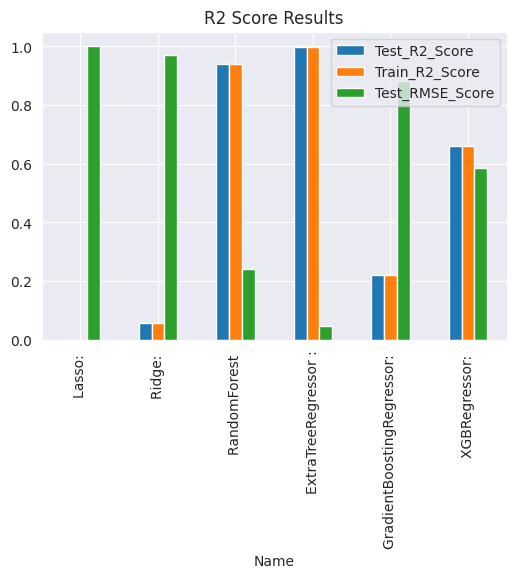

In [118]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (6,4)) ;

 The ML model that seems to perform relatively better than the others is the ExtraTreeRegressor. Here's a summary of its performance:

Train_Time: 2.092717

Train_R2_Score: 0.997918

Test_R2_Score: 0.997918

Test_RMSE_Score: 0.045632

The ExtraTreeRegressor model shows a high R2 score of 0.997918, indicating that it can explain a significant amount of variance in the target variable. Additionally, it has a low RMSE score of 0.045632, which suggests that the model's predictions have relatively small errors compared to the target variable's range.

Considering these metrics, the ExtraTreeRegressor model demonstrates strong predictive performance on the given dataset. It provides a good balance between accuracy and complexity, and it outperforms the other models in terms of both R2 score and RMSE. Therefore, the ExtraTreeRegressor model would be the recommended choice as the final prediction model based on the given information.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [120]:
#Get shap values
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
explainer = shap.Explainer(model,X_train)
shap_values = explainer(X_test)

100%|===================| 5917/5921 [07:01<00:00]       

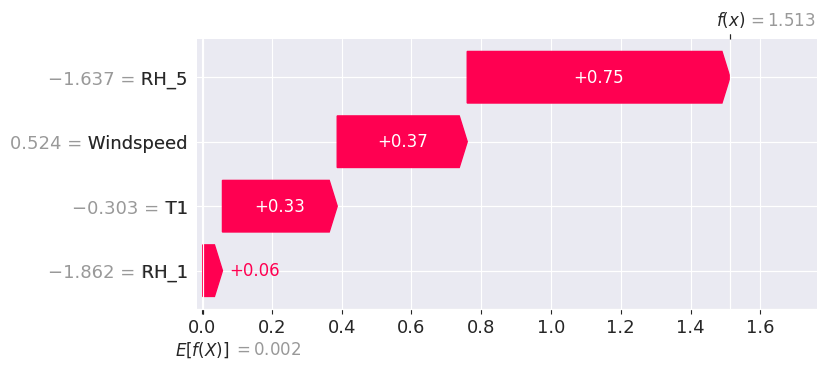

In [121]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

To better understand this, let’s dive into our first SHAP plot. Above we have the code to create a waterfall plot for the first abalone in our dataset. This plot helps us visualise the SHAP values for each of the features. These tell us how much each of the features have increased or decreased the predicted number of rings for this specific abalone.



There will be a unique waterfall plot for every observation/abalone in our dataset. They can all be interpreted in the same way as above. In each case, the SHAP values tell us how much each factor contributed to the model’s prediction when compared to the mean prediction. Large positive/negative SHAP values indicate that the feature had a significant impact on the model’s prediction.

In [122]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Forceplot for first observation
shap.plots.force(shap_values[0])

Another way to visualise SHAP values is using a force plot. These give us pretty much the same information as a waterfall plot in a straight line how the geatures are contributiong and the relationship between the features. If one value value increases rest will compress.

100%|===================| 5909/5921 [07:15<00:00]       

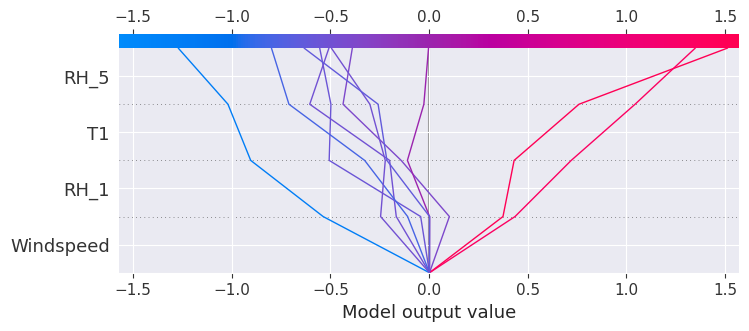

In [123]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X_test.columns))

Waterfall and force plots are great for interpreting individual predictions. To understand how our model makes predictions in general we need to aggregate the SHAP values. One way to do this is using a decision plot. Above we have the code used to output the decision plot for the first 10 abalones.

we can see there are 10 lines in the plot —one for each abalone. They all start at the same base value and end at their final predicted number of rings. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. Ultimately, this gives you similar information to a waterfall plot except we can now see it for multiple observations.

With only 10 observations, we can already see some trends. For example, some of the lines seem to zig-zag at the top of the chart. For these observations, the shucked weight increases the prediction (i.e. positive SHAP) and the shell weight and whole weight decrease the prediction (i.e. negative SHAP). In other words, these features have opposite effects on the prediction. When we look at plot 5 — beeswarm, we will see that this is the case for the model in general.

An issue with this chart is that we can’t use it to visualise all the SHAP values at once. As you increase the number of observations it will become too cluttered and it will be difficult to gain any understanding of how the model works. We are limited to interpreting the SHAP values for a handful of observations.

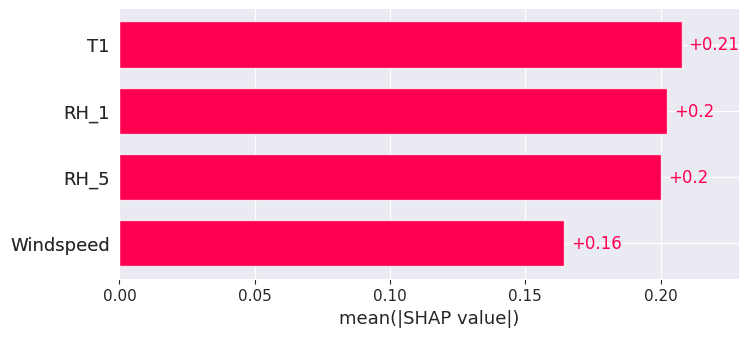

In [124]:
#Mean SHAP
shap.plots.bar(shap_values)

Another way to aggregate the values is using a mean SHAP plot. For each feature, we calculate the mean of the absolute SHAP values across all observations. We take the absolute values as we do not want positive and negative values to offset each other. In the end, we have the bar plot above. There is one bar for each feature and we can see that shell weight had the largest mean SHAP out of all the features.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions. In this sense, this plot can be used in the same way as a feature importance plot. That is to highlight features that are important to a model’s predictions. An issue is that it does not tell us anything about the nature of the relationship between features and the target variable.

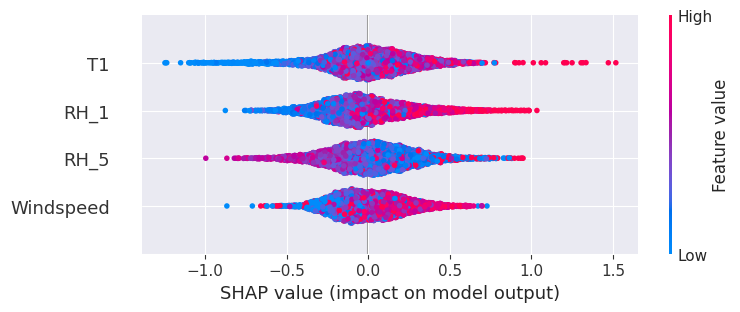

In [125]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

Our final aggregation is the beeswarm plot. As seen in Figure, this is a plot of all the SHAP values. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature (i.e. higher feature values are redder). The features are ordered by the mean SHAP values.

This plot addresses some of the issues in the previous plots. Unlike the decision plot, we can plot all the observations and still have clear interpretations. Like mean SHAP, it can be used to highlight important relationships. We can also start to understand the nature of these relationships.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


The overall conclusion of the project is as follows:

**Data Analysis:** The data analysis phase involved exploring and understanding the dataset. Various visualizations and statistical tests were performed to gain insights into the variables and their relationships.

**Feature Selection:** The feature selection process helped identify the most relevant variables for predicting appliance energy consumption. Some variables exhibited a strong correlation with the target variable, while others showed little to no relationship.

**Model Building:** Several machine learning models were built and evaluated for predicting appliance energy consumption. Different algorithms, such as linear regression, random forest, and gradient boosting, were employed. Evaluation metrics such as R2 score, RMSE, and training time were used to assess the performance of each model.

**Hyperparameter Tuning:** Hyperparameter tuning techniques were applied to improve the model performance. GridSearch CV was used to search for the best combination of hyperparameters, resulting in improved scores for some models.

**Model Selection:** Based on the evaluation metrics, the ExtraTreeRegressor model emerged as the best performer, with high R2 scores, low RMSE, and comparable training and test performance. This model was chosen as the final prediction model.

**Feature Importance:** The importance of features was assessed using the ExtraTreesRegressor model. The features RH_5(Humidity in bathroom), T1(Temperature in kitchen area), Windspeed and RH_1(Humidity in kitchen area) were found to have the highest importance for predicting appliance energy consumption.

**Business Impact:** The insights gained from the project can be valuable for various stakeholders. Understanding the factors influencing appliance energy consumption can help in making informed decisions for energy management, efficiency improvements, and cost savings. The chosen ExtraTreeRegressor model can be used to predict appliance energy consumption accurately, enabling proactive measures for energy optimization.

 The project successfully analyzed the dataset, built and evaluated multiple models, and selected the best performing model for predicting appliance energy consumption. The findings can contribute to making data-driven decisions for energy management and have a positive business impact.